<a href="https://colab.research.google.com/github/Justus-coded/Competitions/blob/master/DSN%20AI%20Bootcamp%20Qualification%20Hackathon/DSN_AI_Bootcamp_Qualification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#train = pd.read_csv("/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Train.csv")
#test = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Test.csv')
#submission = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/submission.csv')
train = pd.read_csv("../input/dsn-ai-bootcamp-data/Train.csv")
test = pd.read_csv('../input/dsn-ai-bootcamp-data/Test.csv')
submission = pd.read_csv('../input/dsn-ai-bootcamp-data/SampleSubmission.csv')

In [ ]:
#train.info()

In [ ]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [ ]:
#train.isnull().sum()/len(train) * 100

In [ ]:
new_train = train.drop(columns=['form_field31','form_field40','form_field41'])
#new_train = train
#print(new_train.head())

In [ ]:
#test.isnull().sum()/len(test) * 100

In [ ]:
new_test = test.drop(columns=['form_field31','form_field40','form_field41'])
#new_test = test

# Training Catboost Algorithm with less preprocessing and feature engineering

## Feature Engineering

In [ ]:
new_train.fillna(-999, inplace=True)

In [ ]:
new_test.fillna(-999, inplace=True)

**Added new features**

In [ ]:
#new_train['form_field1*form_field2'] = new_train.form_field1 * new_train.form_field2
#new_test['form_field1*form_field2'] = new_test.form_field1 * new_test.form_field2

Adding more Features

In [ ]:
new_train['form_field1*formfield2'] = new_train['form_field1'] * new_train['form_field2']
new_train['form_field1/formfield2'] = new_train['form_field1'] / new_train['form_field2']

new_train['form_field1*formfield3'] = new_train['form_field1'] * new_train.form_field3
new_train['form_field1*formfield4'] = new_train.form_field1 * new_train.form_field4
new_train['form_field1*formfield5'] = new_train.form_field1 * new_train.form_field5

#new_train['form_field30*formfield41'] = new_train['form_field30'] * new_train['form_field41']
##new_train['form_field31*formfield40'] = new_train['form_field31'] * new_train['form_field40']

new_train['form_field6+field7'] =  (new_train.form_field6 + new_train.form_field8)/2
new_train['form_field13/field14'] = (new_train.form_field13 / new_train.form_field14)*100
new_train['form_field32/field33'] = (new_train['form_field32']+ new_train['form_field33'])/2
new_train['form_field36/field38'] = new_train['form_field36'] / new_train['form_field38']
new_train['form_field36/field39'] = new_train['form_field36'] / new_train['form_field39']
new_train['form_field36/field18'] = new_train['form_field36'] / new_train['form_field18']
new_train['form_field36/field20'] = new_train['form_field36'] / new_train['form_field20']
new_train['form_field44*field50'] = new_train['form_field44'] * new_train['form_field50']

In [ ]:
new_test['form_field1*formfield2'] = new_test['form_field1'] * new_test['form_field2']
new_test['form_field1/formfield2'] = new_test['form_field1'] / new_test['form_field2']

new_test['form_field1*formfield3'] = new_test['form_field1'] * new_test.form_field3
new_test['form_field1*formfield4'] = new_test.form_field1 * new_test.form_field4
new_test['form_field1*formfield5'] = new_test.form_field1 * new_test.form_field5

#new_train['form_field30*formfield41'] = new_train['form_field30'] * new_train['form_field41']
##new_train['form_field31*formfield40'] = new_train['form_field31'] * new_train['form_field40']

new_test['form_field6+field7'] =  (new_test.form_field6 + new_test.form_field8)/2
new_test['form_field13/field14'] = (new_test.form_field13 / new_test.form_field14)*100
new_test['form_field32/field33'] = (new_test['form_field32']+ new_test['form_field33'])/2
new_test['form_field36/field38'] = new_test['form_field36'] / new_test['form_field38']
new_test['form_field36/field39'] = new_test['form_field36'] / new_test['form_field39']
new_test['form_field36/field18'] = new_test['form_field36'] / new_test['form_field18']
new_test['form_field36/field20'] = new_test['form_field36'] / new_test['form_field20']
new_test['form_field44*field50'] = new_test['form_field44'] * new_test['form_field50']




## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
num_cols = new_train.select_dtypes(include=np.number).columns

In [ ]:
#for col in num_cols:
 # new_train[col] = np.sqrt(new_train[col])
  #new_test[col] = np.sqrt(new_test[col])

In [ ]:
pip install --quiet catboost

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
X = new_train.drop(['default_status','Applicant_ID'], axis=1)
y =new_train.default_status

In [ ]:
le = LabelEncoder()

In [ ]:
X.form_field47.value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [ ]:
X.form_field47 = le.fit_transform(X.form_field47)
new_test.form_field47 = le.fit_transform(new_test.form_field47)


In [ ]:
#X_ = (X)
test_ = (new_test.drop('Applicant_ID', axis=1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [ ]:
#X = min_max.fit_transform(X)
#test_ = min_max.fit_transform(test_)

In [ ]:
X.shape, y.shape, test_.shape

((56000, 60), (56000,), (24000, 60))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size= 0.2, random_state=42)

## Prediction

In [ ]:
from catboost import CatBoostClassifier


In [ ]:
#cat.fit(X_train, y_train , verbose=0)

In [ ]:
y_pred = cat.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

In [ ]:
pred = cat.predict_proba(test_)
submission['default_status']= pred
submission.to_csv('sub12.csv', index=False)

### CatBoost Classifier with 0.008 LR and 4000 n_estimator with new feature

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
cat = CatBoostClassifier(task_type='GPU', n_estimators=5000, learning_rate=0.008, early_stopping_rounds=200)

In [ ]:
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = cat.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

0:	learn: 0.6878908	total: 71.4ms	remaining: 5m 56s
1:	learn: 0.6825735	total: 132ms	remaining: 5m 28s
2:	learn: 0.6774316	total: 191ms	remaining: 5m 18s
3:	learn: 0.6724841	total: 258ms	remaining: 5m 22s
4:	learn: 0.6678876	total: 316ms	remaining: 5m 15s
5:	learn: 0.6631243	total: 375ms	remaining: 5m 12s
6:	learn: 0.6582800	total: 431ms	remaining: 5m 7s
7:	learn: 0.6536599	total: 487ms	remaining: 5m 3s
8:	learn: 0.6490632	total: 544ms	remaining: 5m 1s
9:	learn: 0.6447314	total: 600ms	remaining: 4m 59s
10:	learn: 0.6405929	total: 655ms	remaining: 4m 57s
11:	learn: 0.6365044	total: 711ms	remaining: 4m 55s
12:	learn: 0.6324229	total: 769ms	remaining: 4m 54s
13:	learn: 0.6283360	total: 824ms	remaining: 4m 53s
14:	learn: 0.6243663	total: 880ms	remaining: 4m 52s
15:	learn: 0.6205084	total: 935ms	remaining: 4m 51s
16:	learn: 0.6170842	total: 977ms	remaining: 4m 46s
17:	learn: 0.6136523	total: 1.03s	remaining: 4m 45s
18:	learn: 0.6099439	total: 1.09s	remaining: 4m 45s
19:	learn: 0.6067443	tot

160:	learn: 0.4402667	total: 9.32s	remaining: 4m 40s
161:	learn: 0.4399484	total: 9.38s	remaining: 4m 40s
162:	learn: 0.4396519	total: 9.43s	remaining: 4m 39s
163:	learn: 0.4393092	total: 9.49s	remaining: 4m 39s
164:	learn: 0.4389778	total: 9.54s	remaining: 4m 39s
165:	learn: 0.4387124	total: 9.6s	remaining: 4m 39s
166:	learn: 0.4383833	total: 9.65s	remaining: 4m 39s
167:	learn: 0.4380506	total: 9.71s	remaining: 4m 39s
168:	learn: 0.4377584	total: 9.77s	remaining: 4m 39s
169:	learn: 0.4374584	total: 9.82s	remaining: 4m 39s
170:	learn: 0.4371901	total: 9.88s	remaining: 4m 38s
171:	learn: 0.4369104	total: 9.93s	remaining: 4m 38s
172:	learn: 0.4366243	total: 9.99s	remaining: 4m 38s
173:	learn: 0.4363531	total: 10s	remaining: 4m 38s
174:	learn: 0.4360432	total: 10.1s	remaining: 4m 38s
175:	learn: 0.4358041	total: 10.1s	remaining: 4m 37s
176:	learn: 0.4356170	total: 10.2s	remaining: 4m 37s
177:	learn: 0.4353244	total: 10.3s	remaining: 4m 37s
178:	learn: 0.4350617	total: 10.3s	remaining: 4m 

317:	learn: 0.4169718	total: 18.3s	remaining: 4m 29s
318:	learn: 0.4168855	total: 18.4s	remaining: 4m 29s
319:	learn: 0.4168135	total: 18.4s	remaining: 4m 29s
320:	learn: 0.4167659	total: 18.5s	remaining: 4m 29s
321:	learn: 0.4166937	total: 18.5s	remaining: 4m 29s
322:	learn: 0.4166256	total: 18.6s	remaining: 4m 29s
323:	learn: 0.4165602	total: 18.6s	remaining: 4m 29s
324:	learn: 0.4164862	total: 18.7s	remaining: 4m 28s
325:	learn: 0.4164163	total: 18.8s	remaining: 4m 28s
326:	learn: 0.4163502	total: 18.8s	remaining: 4m 28s
327:	learn: 0.4162779	total: 18.9s	remaining: 4m 28s
328:	learn: 0.4162167	total: 18.9s	remaining: 4m 28s
329:	learn: 0.4161505	total: 19s	remaining: 4m 28s
330:	learn: 0.4160782	total: 19s	remaining: 4m 28s
331:	learn: 0.4160104	total: 19.1s	remaining: 4m 28s
332:	learn: 0.4159468	total: 19.1s	remaining: 4m 28s
333:	learn: 0.4158864	total: 19.2s	remaining: 4m 28s
334:	learn: 0.4158191	total: 19.2s	remaining: 4m 28s
335:	learn: 0.4157564	total: 19.3s	remaining: 4m 2

476:	learn: 0.4098955	total: 27.3s	remaining: 4m 18s
477:	learn: 0.4098690	total: 27.3s	remaining: 4m 18s
478:	learn: 0.4098291	total: 27.4s	remaining: 4m 18s
479:	learn: 0.4097836	total: 27.4s	remaining: 4m 18s
480:	learn: 0.4097489	total: 27.5s	remaining: 4m 18s
481:	learn: 0.4097289	total: 27.5s	remaining: 4m 18s
482:	learn: 0.4097062	total: 27.6s	remaining: 4m 18s
483:	learn: 0.4096789	total: 27.6s	remaining: 4m 17s
484:	learn: 0.4096491	total: 27.7s	remaining: 4m 17s
485:	learn: 0.4096110	total: 27.8s	remaining: 4m 17s
486:	learn: 0.4095841	total: 27.8s	remaining: 4m 17s
487:	learn: 0.4095422	total: 27.9s	remaining: 4m 17s
488:	learn: 0.4095076	total: 27.9s	remaining: 4m 17s
489:	learn: 0.4094673	total: 28s	remaining: 4m 17s
490:	learn: 0.4094343	total: 28s	remaining: 4m 17s
491:	learn: 0.4094121	total: 28.1s	remaining: 4m 17s
492:	learn: 0.4093864	total: 28.1s	remaining: 4m 17s
493:	learn: 0.4093596	total: 28.2s	remaining: 4m 17s
494:	learn: 0.4093307	total: 28.3s	remaining: 4m 1

632:	learn: 0.4061594	total: 35.9s	remaining: 4m 7s
633:	learn: 0.4061422	total: 35.9s	remaining: 4m 7s
634:	learn: 0.4061324	total: 36s	remaining: 4m 7s
635:	learn: 0.4061111	total: 36s	remaining: 4m 7s
636:	learn: 0.4060815	total: 36.1s	remaining: 4m 7s
637:	learn: 0.4060675	total: 36.1s	remaining: 4m 7s
638:	learn: 0.4060459	total: 36.2s	remaining: 4m 7s
639:	learn: 0.4060389	total: 36.2s	remaining: 4m 6s
640:	learn: 0.4060187	total: 36.3s	remaining: 4m 6s
641:	learn: 0.4059950	total: 36.5s	remaining: 4m 7s
642:	learn: 0.4059768	total: 36.8s	remaining: 4m 9s
643:	learn: 0.4059612	total: 37.1s	remaining: 4m 10s
644:	learn: 0.4059341	total: 37.4s	remaining: 4m 12s
645:	learn: 0.4059161	total: 37.5s	remaining: 4m 12s
646:	learn: 0.4058948	total: 37.6s	remaining: 4m 12s
647:	learn: 0.4058718	total: 37.6s	remaining: 4m 12s
648:	learn: 0.4058554	total: 37.7s	remaining: 4m 12s
649:	learn: 0.4058386	total: 37.8s	remaining: 4m 12s
650:	learn: 0.4058319	total: 37.8s	remaining: 4m 12s
651:	lea

789:	learn: 0.4035358	total: 46.2s	remaining: 4m 6s
790:	learn: 0.4035312	total: 46.2s	remaining: 4m 6s
791:	learn: 0.4035143	total: 46.3s	remaining: 4m 5s
792:	learn: 0.4034986	total: 46.4s	remaining: 4m 5s
793:	learn: 0.4034869	total: 46.4s	remaining: 4m 5s
794:	learn: 0.4034643	total: 46.5s	remaining: 4m 5s
795:	learn: 0.4034522	total: 46.5s	remaining: 4m 5s
796:	learn: 0.4034359	total: 46.6s	remaining: 4m 5s
797:	learn: 0.4034215	total: 46.7s	remaining: 4m 5s
798:	learn: 0.4034070	total: 46.7s	remaining: 4m 5s
799:	learn: 0.4034058	total: 46.8s	remaining: 4m 5s
800:	learn: 0.4033923	total: 46.8s	remaining: 4m 5s
801:	learn: 0.4033839	total: 46.9s	remaining: 4m 5s
802:	learn: 0.4033680	total: 46.9s	remaining: 4m 5s
803:	learn: 0.4033547	total: 47s	remaining: 4m 5s
804:	learn: 0.4033466	total: 47s	remaining: 4m 5s
805:	learn: 0.4033296	total: 47.1s	remaining: 4m 5s
806:	learn: 0.4033158	total: 47.2s	remaining: 4m 5s
807:	learn: 0.4033056	total: 47.2s	remaining: 4m 4s
808:	learn: 0.40

947:	learn: 0.4015264	total: 55.1s	remaining: 3m 55s
948:	learn: 0.4015151	total: 55.2s	remaining: 3m 55s
949:	learn: 0.4015041	total: 55.2s	remaining: 3m 55s
950:	learn: 0.4014991	total: 55.3s	remaining: 3m 55s
951:	learn: 0.4014915	total: 55.3s	remaining: 3m 55s
952:	learn: 0.4014865	total: 55.4s	remaining: 3m 55s
953:	learn: 0.4014671	total: 55.4s	remaining: 3m 55s
954:	learn: 0.4014562	total: 55.5s	remaining: 3m 55s
955:	learn: 0.4014522	total: 55.5s	remaining: 3m 54s
956:	learn: 0.4014418	total: 55.6s	remaining: 3m 54s
957:	learn: 0.4014293	total: 55.7s	remaining: 3m 54s
958:	learn: 0.4014063	total: 55.7s	remaining: 3m 54s
959:	learn: 0.4013923	total: 55.8s	remaining: 3m 54s
960:	learn: 0.4013803	total: 55.8s	remaining: 3m 54s
961:	learn: 0.4013714	total: 55.9s	remaining: 3m 54s
962:	learn: 0.4013584	total: 55.9s	remaining: 3m 54s
963:	learn: 0.4013518	total: 56s	remaining: 3m 54s
964:	learn: 0.4013428	total: 56s	remaining: 3m 54s
965:	learn: 0.4013294	total: 56.1s	remaining: 3m 5

1103:	learn: 0.3997952	total: 1m 3s	remaining: 3m 45s
1104:	learn: 0.3997920	total: 1m 3s	remaining: 3m 45s
1105:	learn: 0.3997777	total: 1m 3s	remaining: 3m 45s
1106:	learn: 0.3997638	total: 1m 4s	remaining: 3m 45s
1107:	learn: 0.3997556	total: 1m 4s	remaining: 3m 44s
1108:	learn: 0.3997487	total: 1m 4s	remaining: 3m 44s
1109:	learn: 0.3997381	total: 1m 4s	remaining: 3m 44s
1110:	learn: 0.3997297	total: 1m 4s	remaining: 3m 44s
1111:	learn: 0.3997277	total: 1m 4s	remaining: 3m 44s
1112:	learn: 0.3997189	total: 1m 4s	remaining: 3m 44s
1113:	learn: 0.3996880	total: 1m 4s	remaining: 3m 44s
1114:	learn: 0.3996848	total: 1m 4s	remaining: 3m 44s
1115:	learn: 0.3996806	total: 1m 4s	remaining: 3m 44s
1116:	learn: 0.3996696	total: 1m 4s	remaining: 3m 44s
1117:	learn: 0.3996650	total: 1m 4s	remaining: 3m 44s
1118:	learn: 0.3996509	total: 1m 4s	remaining: 3m 44s
1119:	learn: 0.3996399	total: 1m 4s	remaining: 3m 44s
1120:	learn: 0.3996352	total: 1m 4s	remaining: 3m 43s
1121:	learn: 0.3996235	total

1257:	learn: 0.3982236	total: 1m 12s	remaining: 3m 36s
1258:	learn: 0.3982218	total: 1m 12s	remaining: 3m 36s
1259:	learn: 0.3982071	total: 1m 12s	remaining: 3m 36s
1260:	learn: 0.3981948	total: 1m 12s	remaining: 3m 35s
1261:	learn: 0.3981914	total: 1m 12s	remaining: 3m 35s
1262:	learn: 0.3981856	total: 1m 12s	remaining: 3m 35s
1263:	learn: 0.3981764	total: 1m 12s	remaining: 3m 35s
1264:	learn: 0.3981658	total: 1m 13s	remaining: 3m 35s
1265:	learn: 0.3981617	total: 1m 13s	remaining: 3m 35s
1266:	learn: 0.3981536	total: 1m 13s	remaining: 3m 35s
1267:	learn: 0.3981480	total: 1m 13s	remaining: 3m 35s
1268:	learn: 0.3981393	total: 1m 13s	remaining: 3m 35s
1269:	learn: 0.3981376	total: 1m 13s	remaining: 3m 35s
1270:	learn: 0.3981283	total: 1m 13s	remaining: 3m 35s
1271:	learn: 0.3981154	total: 1m 13s	remaining: 3m 35s
1272:	learn: 0.3981049	total: 1m 13s	remaining: 3m 35s
1273:	learn: 0.3980957	total: 1m 13s	remaining: 3m 35s
1274:	learn: 0.3980897	total: 1m 13s	remaining: 3m 35s
1275:	lear

1409:	learn: 0.3967503	total: 1m 21s	remaining: 3m 26s
1410:	learn: 0.3967439	total: 1m 21s	remaining: 3m 26s
1411:	learn: 0.3967377	total: 1m 21s	remaining: 3m 26s
1412:	learn: 0.3967289	total: 1m 21s	remaining: 3m 26s
1413:	learn: 0.3967188	total: 1m 21s	remaining: 3m 26s
1414:	learn: 0.3967096	total: 1m 21s	remaining: 3m 26s
1415:	learn: 0.3967048	total: 1m 21s	remaining: 3m 26s
1416:	learn: 0.3966915	total: 1m 21s	remaining: 3m 26s
1417:	learn: 0.3966734	total: 1m 21s	remaining: 3m 26s
1418:	learn: 0.3966711	total: 1m 21s	remaining: 3m 26s
1419:	learn: 0.3966684	total: 1m 21s	remaining: 3m 26s
1420:	learn: 0.3966599	total: 1m 21s	remaining: 3m 25s
1421:	learn: 0.3966454	total: 1m 21s	remaining: 3m 25s
1422:	learn: 0.3966323	total: 1m 21s	remaining: 3m 25s
1423:	learn: 0.3966197	total: 1m 21s	remaining: 3m 25s
1424:	learn: 0.3966058	total: 1m 22s	remaining: 3m 25s
1425:	learn: 0.3965829	total: 1m 22s	remaining: 3m 25s
1426:	learn: 0.3965750	total: 1m 22s	remaining: 3m 25s
1427:	lear

1561:	learn: 0.3951919	total: 1m 29s	remaining: 3m 17s
1562:	learn: 0.3951849	total: 1m 29s	remaining: 3m 17s
1563:	learn: 0.3951797	total: 1m 29s	remaining: 3m 17s
1564:	learn: 0.3951755	total: 1m 29s	remaining: 3m 17s
1565:	learn: 0.3951601	total: 1m 29s	remaining: 3m 17s
1566:	learn: 0.3951539	total: 1m 29s	remaining: 3m 16s
1567:	learn: 0.3951470	total: 1m 29s	remaining: 3m 16s
1568:	learn: 0.3951365	total: 1m 30s	remaining: 3m 16s
1569:	learn: 0.3951230	total: 1m 30s	remaining: 3m 16s
1570:	learn: 0.3951201	total: 1m 30s	remaining: 3m 16s
1571:	learn: 0.3951130	total: 1m 30s	remaining: 3m 16s
1572:	learn: 0.3950990	total: 1m 30s	remaining: 3m 16s
1573:	learn: 0.3950919	total: 1m 30s	remaining: 3m 16s
1574:	learn: 0.3950806	total: 1m 30s	remaining: 3m 16s
1575:	learn: 0.3950720	total: 1m 30s	remaining: 3m 16s
1576:	learn: 0.3950594	total: 1m 30s	remaining: 3m 16s
1577:	learn: 0.3950489	total: 1m 30s	remaining: 3m 16s
1578:	learn: 0.3950374	total: 1m 30s	remaining: 3m 16s
1579:	lear

1711:	learn: 0.3936891	total: 1m 38s	remaining: 3m 9s
1712:	learn: 0.3936789	total: 1m 38s	remaining: 3m 9s
1713:	learn: 0.3936593	total: 1m 38s	remaining: 3m 9s
1714:	learn: 0.3936581	total: 1m 38s	remaining: 3m 9s
1715:	learn: 0.3936458	total: 1m 38s	remaining: 3m 9s
1716:	learn: 0.3936313	total: 1m 39s	remaining: 3m 9s
1717:	learn: 0.3936222	total: 1m 39s	remaining: 3m 9s
1718:	learn: 0.3936153	total: 1m 39s	remaining: 3m 9s
1719:	learn: 0.3936128	total: 1m 39s	remaining: 3m 9s
1720:	learn: 0.3935960	total: 1m 39s	remaining: 3m 9s
1721:	learn: 0.3935869	total: 1m 39s	remaining: 3m 9s
1722:	learn: 0.3935766	total: 1m 39s	remaining: 3m 9s
1723:	learn: 0.3935716	total: 1m 39s	remaining: 3m 9s
1724:	learn: 0.3935649	total: 1m 39s	remaining: 3m 9s
1725:	learn: 0.3935569	total: 1m 39s	remaining: 3m 8s
1726:	learn: 0.3935515	total: 1m 39s	remaining: 3m 8s
1727:	learn: 0.3935375	total: 1m 39s	remaining: 3m 8s
1728:	learn: 0.3935253	total: 1m 39s	remaining: 3m 8s
1729:	learn: 0.3935242	total

1864:	learn: 0.3922750	total: 1m 48s	remaining: 3m 2s
1865:	learn: 0.3922635	total: 1m 48s	remaining: 3m 2s
1866:	learn: 0.3922510	total: 1m 48s	remaining: 3m 1s
1867:	learn: 0.3922450	total: 1m 48s	remaining: 3m 1s
1868:	learn: 0.3922299	total: 1m 48s	remaining: 3m 1s
1869:	learn: 0.3922232	total: 1m 48s	remaining: 3m 1s
1870:	learn: 0.3922095	total: 1m 48s	remaining: 3m 1s
1871:	learn: 0.3921959	total: 1m 48s	remaining: 3m 1s
1872:	learn: 0.3921927	total: 1m 48s	remaining: 3m 1s
1873:	learn: 0.3921916	total: 1m 48s	remaining: 3m 1s
1874:	learn: 0.3921778	total: 1m 48s	remaining: 3m 1s
1875:	learn: 0.3921682	total: 1m 48s	remaining: 3m 1s
1876:	learn: 0.3921610	total: 1m 48s	remaining: 3m 1s
1877:	learn: 0.3921541	total: 1m 49s	remaining: 3m 1s
1878:	learn: 0.3921463	total: 1m 49s	remaining: 3m 1s
1879:	learn: 0.3921403	total: 1m 49s	remaining: 3m 1s
1880:	learn: 0.3921214	total: 1m 49s	remaining: 3m 1s
1881:	learn: 0.3921150	total: 1m 49s	remaining: 3m 1s
1882:	learn: 0.3921051	total

2016:	learn: 0.3908718	total: 1m 57s	remaining: 2m 53s
2017:	learn: 0.3908592	total: 1m 57s	remaining: 2m 53s
2018:	learn: 0.3908453	total: 1m 57s	remaining: 2m 52s
2019:	learn: 0.3908344	total: 1m 57s	remaining: 2m 52s
2020:	learn: 0.3908253	total: 1m 57s	remaining: 2m 52s
2021:	learn: 0.3908204	total: 1m 57s	remaining: 2m 52s
2022:	learn: 0.3908146	total: 1m 57s	remaining: 2m 52s
2023:	learn: 0.3908126	total: 1m 57s	remaining: 2m 52s
2024:	learn: 0.3908020	total: 1m 57s	remaining: 2m 52s
2025:	learn: 0.3907917	total: 1m 57s	remaining: 2m 52s
2026:	learn: 0.3907814	total: 1m 57s	remaining: 2m 52s
2027:	learn: 0.3907718	total: 1m 57s	remaining: 2m 52s
2028:	learn: 0.3907636	total: 1m 57s	remaining: 2m 52s
2029:	learn: 0.3907526	total: 1m 57s	remaining: 2m 52s
2030:	learn: 0.3907462	total: 1m 57s	remaining: 2m 52s
2031:	learn: 0.3907332	total: 1m 57s	remaining: 2m 52s
2032:	learn: 0.3907227	total: 1m 57s	remaining: 2m 52s
2033:	learn: 0.3907078	total: 1m 57s	remaining: 2m 52s
2034:	lear

2168:	learn: 0.3895733	total: 2m 5s	remaining: 2m 44s
2169:	learn: 0.3895633	total: 2m 5s	remaining: 2m 43s
2170:	learn: 0.3895528	total: 2m 5s	remaining: 2m 43s
2171:	learn: 0.3895447	total: 2m 5s	remaining: 2m 43s
2172:	learn: 0.3895373	total: 2m 5s	remaining: 2m 43s
2173:	learn: 0.3895272	total: 2m 5s	remaining: 2m 43s
2174:	learn: 0.3895155	total: 2m 6s	remaining: 2m 43s
2175:	learn: 0.3895124	total: 2m 6s	remaining: 2m 43s
2176:	learn: 0.3895112	total: 2m 6s	remaining: 2m 43s
2177:	learn: 0.3894994	total: 2m 6s	remaining: 2m 43s
2178:	learn: 0.3894958	total: 2m 6s	remaining: 2m 43s
2179:	learn: 0.3894900	total: 2m 6s	remaining: 2m 43s
2180:	learn: 0.3894825	total: 2m 6s	remaining: 2m 43s
2181:	learn: 0.3894741	total: 2m 6s	remaining: 2m 43s
2182:	learn: 0.3894731	total: 2m 6s	remaining: 2m 43s
2183:	learn: 0.3894671	total: 2m 6s	remaining: 2m 43s
2184:	learn: 0.3894622	total: 2m 6s	remaining: 2m 43s
2185:	learn: 0.3894473	total: 2m 6s	remaining: 2m 42s
2186:	learn: 0.3894375	total

2321:	learn: 0.3883935	total: 2m 14s	remaining: 2m 34s
2322:	learn: 0.3883837	total: 2m 14s	remaining: 2m 34s
2323:	learn: 0.3883760	total: 2m 14s	remaining: 2m 34s
2324:	learn: 0.3883656	total: 2m 14s	remaining: 2m 34s
2325:	learn: 0.3883610	total: 2m 14s	remaining: 2m 34s
2326:	learn: 0.3883415	total: 2m 14s	remaining: 2m 34s
2327:	learn: 0.3883258	total: 2m 14s	remaining: 2m 34s
2328:	learn: 0.3883158	total: 2m 14s	remaining: 2m 34s
2329:	learn: 0.3883127	total: 2m 14s	remaining: 2m 34s
2330:	learn: 0.3883066	total: 2m 14s	remaining: 2m 34s
2331:	learn: 0.3882956	total: 2m 14s	remaining: 2m 34s
2332:	learn: 0.3882873	total: 2m 14s	remaining: 2m 34s
2333:	learn: 0.3882826	total: 2m 14s	remaining: 2m 34s
2334:	learn: 0.3882764	total: 2m 15s	remaining: 2m 34s
2335:	learn: 0.3882752	total: 2m 15s	remaining: 2m 34s
2336:	learn: 0.3882743	total: 2m 15s	remaining: 2m 34s
2337:	learn: 0.3882728	total: 2m 15s	remaining: 2m 34s
2338:	learn: 0.3882658	total: 2m 15s	remaining: 2m 34s
2339:	lear

2472:	learn: 0.3872154	total: 2m 23s	remaining: 2m 26s
2473:	learn: 0.3872032	total: 2m 23s	remaining: 2m 26s
2474:	learn: 0.3871940	total: 2m 23s	remaining: 2m 26s
2475:	learn: 0.3871891	total: 2m 23s	remaining: 2m 26s
2476:	learn: 0.3871802	total: 2m 23s	remaining: 2m 26s
2477:	learn: 0.3871734	total: 2m 23s	remaining: 2m 26s
2478:	learn: 0.3871613	total: 2m 23s	remaining: 2m 25s
2479:	learn: 0.3871587	total: 2m 23s	remaining: 2m 25s
2480:	learn: 0.3871474	total: 2m 23s	remaining: 2m 25s
2481:	learn: 0.3871361	total: 2m 23s	remaining: 2m 25s
2482:	learn: 0.3871232	total: 2m 23s	remaining: 2m 25s
2483:	learn: 0.3871208	total: 2m 23s	remaining: 2m 25s
2484:	learn: 0.3871098	total: 2m 23s	remaining: 2m 25s
2485:	learn: 0.3870964	total: 2m 23s	remaining: 2m 25s
2486:	learn: 0.3870924	total: 2m 23s	remaining: 2m 25s
2487:	learn: 0.3870751	total: 2m 24s	remaining: 2m 25s
2488:	learn: 0.3870667	total: 2m 24s	remaining: 2m 25s
2489:	learn: 0.3870506	total: 2m 24s	remaining: 2m 25s
2490:	lear

2623:	learn: 0.3860253	total: 2m 31s	remaining: 2m 17s
2624:	learn: 0.3860144	total: 2m 32s	remaining: 2m 17s
2625:	learn: 0.3860076	total: 2m 32s	remaining: 2m 17s
2626:	learn: 0.3859923	total: 2m 32s	remaining: 2m 17s
2627:	learn: 0.3859825	total: 2m 32s	remaining: 2m 17s
2628:	learn: 0.3859803	total: 2m 32s	remaining: 2m 17s
2629:	learn: 0.3859704	total: 2m 32s	remaining: 2m 17s
2630:	learn: 0.3859625	total: 2m 32s	remaining: 2m 17s
2631:	learn: 0.3859575	total: 2m 32s	remaining: 2m 17s
2632:	learn: 0.3859518	total: 2m 32s	remaining: 2m 17s
2633:	learn: 0.3859478	total: 2m 32s	remaining: 2m 17s
2634:	learn: 0.3859461	total: 2m 32s	remaining: 2m 16s
2635:	learn: 0.3859351	total: 2m 32s	remaining: 2m 16s
2636:	learn: 0.3859304	total: 2m 32s	remaining: 2m 16s
2637:	learn: 0.3859270	total: 2m 32s	remaining: 2m 16s
2638:	learn: 0.3859228	total: 2m 32s	remaining: 2m 16s
2639:	learn: 0.3859118	total: 2m 32s	remaining: 2m 16s
2640:	learn: 0.3859040	total: 2m 32s	remaining: 2m 16s
2641:	lear

2776:	learn: 0.3849303	total: 2m 41s	remaining: 2m 9s
2777:	learn: 0.3849243	total: 2m 41s	remaining: 2m 9s
2778:	learn: 0.3849160	total: 2m 41s	remaining: 2m 9s
2779:	learn: 0.3849135	total: 2m 41s	remaining: 2m 8s
2780:	learn: 0.3849075	total: 2m 41s	remaining: 2m 8s
2781:	learn: 0.3849030	total: 2m 41s	remaining: 2m 8s
2782:	learn: 0.3848934	total: 2m 41s	remaining: 2m 8s
2783:	learn: 0.3848857	total: 2m 41s	remaining: 2m 8s
2784:	learn: 0.3848761	total: 2m 41s	remaining: 2m 8s
2785:	learn: 0.3848691	total: 2m 41s	remaining: 2m 8s
2786:	learn: 0.3848642	total: 2m 41s	remaining: 2m 8s
2787:	learn: 0.3848603	total: 2m 41s	remaining: 2m 8s
2788:	learn: 0.3848516	total: 2m 42s	remaining: 2m 8s
2789:	learn: 0.3848490	total: 2m 42s	remaining: 2m 8s
2790:	learn: 0.3848431	total: 2m 42s	remaining: 2m 8s
2791:	learn: 0.3848305	total: 2m 42s	remaining: 2m 8s
2792:	learn: 0.3848195	total: 2m 42s	remaining: 2m 8s
2793:	learn: 0.3848118	total: 2m 42s	remaining: 2m 8s
2794:	learn: 0.3848002	total

2931:	learn: 0.3837568	total: 2m 50s	remaining: 2m
2932:	learn: 0.3837556	total: 2m 50s	remaining: 2m
2933:	learn: 0.3837462	total: 2m 50s	remaining: 2m
2934:	learn: 0.3837424	total: 2m 50s	remaining: 2m
2935:	learn: 0.3837348	total: 2m 50s	remaining: 2m
2936:	learn: 0.3837283	total: 2m 50s	remaining: 1m 59s
2937:	learn: 0.3837264	total: 2m 50s	remaining: 1m 59s
2938:	learn: 0.3837206	total: 2m 50s	remaining: 1m 59s
2939:	learn: 0.3837114	total: 2m 50s	remaining: 1m 59s
2940:	learn: 0.3837027	total: 2m 51s	remaining: 1m 59s
2941:	learn: 0.3837014	total: 2m 51s	remaining: 1m 59s
2942:	learn: 0.3836847	total: 2m 51s	remaining: 1m 59s
2943:	learn: 0.3836809	total: 2m 51s	remaining: 1m 59s
2944:	learn: 0.3836756	total: 2m 51s	remaining: 1m 59s
2945:	learn: 0.3836646	total: 2m 51s	remaining: 1m 59s
2946:	learn: 0.3836610	total: 2m 51s	remaining: 1m 59s
2947:	learn: 0.3836604	total: 2m 51s	remaining: 1m 59s
2948:	learn: 0.3836522	total: 2m 51s	remaining: 1m 59s
2949:	learn: 0.3836445	total: 

3083:	learn: 0.3827746	total: 2m 58s	remaining: 1m 51s
3084:	learn: 0.3827668	total: 2m 59s	remaining: 1m 51s
3085:	learn: 0.3827596	total: 2m 59s	remaining: 1m 51s
3086:	learn: 0.3827555	total: 2m 59s	remaining: 1m 51s
3087:	learn: 0.3827479	total: 2m 59s	remaining: 1m 50s
3088:	learn: 0.3827461	total: 2m 59s	remaining: 1m 50s
3089:	learn: 0.3827365	total: 2m 59s	remaining: 1m 50s
3090:	learn: 0.3827262	total: 2m 59s	remaining: 1m 50s
3091:	learn: 0.3827236	total: 2m 59s	remaining: 1m 50s
3092:	learn: 0.3827225	total: 2m 59s	remaining: 1m 50s
3093:	learn: 0.3827164	total: 2m 59s	remaining: 1m 50s
3094:	learn: 0.3827091	total: 2m 59s	remaining: 1m 50s
3095:	learn: 0.3827056	total: 2m 59s	remaining: 1m 50s
3096:	learn: 0.3827010	total: 2m 59s	remaining: 1m 50s
3097:	learn: 0.3826928	total: 2m 59s	remaining: 1m 50s
3098:	learn: 0.3826868	total: 2m 59s	remaining: 1m 50s
3099:	learn: 0.3826736	total: 2m 59s	remaining: 1m 50s
3100:	learn: 0.3826673	total: 3m	remaining: 1m 50s
3101:	learn: 0

3237:	learn: 0.3818084	total: 3m 7s	remaining: 1m 42s
3238:	learn: 0.3818029	total: 3m 7s	remaining: 1m 42s
3239:	learn: 0.3817993	total: 3m 7s	remaining: 1m 41s
3240:	learn: 0.3817936	total: 3m 7s	remaining: 1m 41s
3241:	learn: 0.3817909	total: 3m 7s	remaining: 1m 41s
3242:	learn: 0.3817879	total: 3m 7s	remaining: 1m 41s
3243:	learn: 0.3817788	total: 3m 7s	remaining: 1m 41s
3244:	learn: 0.3817757	total: 3m 7s	remaining: 1m 41s
3245:	learn: 0.3817697	total: 3m 8s	remaining: 1m 41s
3246:	learn: 0.3817606	total: 3m 8s	remaining: 1m 41s
3247:	learn: 0.3817509	total: 3m 8s	remaining: 1m 41s
3248:	learn: 0.3817446	total: 3m 8s	remaining: 1m 41s
3249:	learn: 0.3817385	total: 3m 8s	remaining: 1m 41s
3250:	learn: 0.3817283	total: 3m 8s	remaining: 1m 41s
3251:	learn: 0.3817212	total: 3m 8s	remaining: 1m 41s
3252:	learn: 0.3817205	total: 3m 8s	remaining: 1m 41s
3253:	learn: 0.3817200	total: 3m 8s	remaining: 1m 41s
3254:	learn: 0.3817157	total: 3m 8s	remaining: 1m 41s
3255:	learn: 0.3817149	total

3389:	learn: 0.3808798	total: 3m 16s	remaining: 1m 33s
3390:	learn: 0.3808740	total: 3m 16s	remaining: 1m 33s
3391:	learn: 0.3808698	total: 3m 16s	remaining: 1m 33s
3392:	learn: 0.3808609	total: 3m 16s	remaining: 1m 33s
3393:	learn: 0.3808555	total: 3m 17s	remaining: 1m 33s
3394:	learn: 0.3808482	total: 3m 17s	remaining: 1m 33s
3395:	learn: 0.3808401	total: 3m 17s	remaining: 1m 33s
3396:	learn: 0.3808362	total: 3m 17s	remaining: 1m 33s
3397:	learn: 0.3808271	total: 3m 17s	remaining: 1m 32s
3398:	learn: 0.3808225	total: 3m 17s	remaining: 1m 32s
3399:	learn: 0.3808144	total: 3m 17s	remaining: 1m 32s
3400:	learn: 0.3808115	total: 3m 17s	remaining: 1m 32s
3401:	learn: 0.3808100	total: 3m 17s	remaining: 1m 32s
3402:	learn: 0.3808015	total: 3m 17s	remaining: 1m 32s
3403:	learn: 0.3807886	total: 3m 17s	remaining: 1m 32s
3404:	learn: 0.3807877	total: 3m 17s	remaining: 1m 32s
3405:	learn: 0.3807866	total: 3m 17s	remaining: 1m 32s
3406:	learn: 0.3807823	total: 3m 17s	remaining: 1m 32s
3407:	lear

3539:	learn: 0.3799278	total: 3m 25s	remaining: 1m 24s
3540:	learn: 0.3799232	total: 3m 25s	remaining: 1m 24s
3541:	learn: 0.3799222	total: 3m 25s	remaining: 1m 24s
3542:	learn: 0.3799115	total: 3m 25s	remaining: 1m 24s
3543:	learn: 0.3799056	total: 3m 25s	remaining: 1m 24s
3544:	learn: 0.3798949	total: 3m 25s	remaining: 1m 24s
3545:	learn: 0.3798882	total: 3m 25s	remaining: 1m 24s
3546:	learn: 0.3798806	total: 3m 25s	remaining: 1m 24s
3547:	learn: 0.3798730	total: 3m 25s	remaining: 1m 24s
3548:	learn: 0.3798607	total: 3m 25s	remaining: 1m 24s
3549:	learn: 0.3798537	total: 3m 25s	remaining: 1m 24s
3550:	learn: 0.3798507	total: 3m 25s	remaining: 1m 24s
3551:	learn: 0.3798411	total: 3m 26s	remaining: 1m 23s
3552:	learn: 0.3798326	total: 3m 26s	remaining: 1m 23s
3553:	learn: 0.3798233	total: 3m 26s	remaining: 1m 23s
3554:	learn: 0.3798207	total: 3m 26s	remaining: 1m 23s
3555:	learn: 0.3798178	total: 3m 26s	remaining: 1m 23s
3556:	learn: 0.3798107	total: 3m 26s	remaining: 1m 23s
3557:	lear

3690:	learn: 0.3789986	total: 3m 34s	remaining: 1m 15s
3691:	learn: 0.3789961	total: 3m 34s	remaining: 1m 15s
3692:	learn: 0.3789898	total: 3m 34s	remaining: 1m 15s
3693:	learn: 0.3789858	total: 3m 34s	remaining: 1m 15s
3694:	learn: 0.3789846	total: 3m 34s	remaining: 1m 15s
3695:	learn: 0.3789777	total: 3m 34s	remaining: 1m 15s
3696:	learn: 0.3789758	total: 3m 34s	remaining: 1m 15s
3697:	learn: 0.3789704	total: 3m 34s	remaining: 1m 15s
3698:	learn: 0.3789660	total: 3m 34s	remaining: 1m 15s
3699:	learn: 0.3789624	total: 3m 34s	remaining: 1m 15s
3700:	learn: 0.3789508	total: 3m 34s	remaining: 1m 15s
3701:	learn: 0.3789489	total: 3m 34s	remaining: 1m 15s
3702:	learn: 0.3789368	total: 3m 34s	remaining: 1m 15s
3703:	learn: 0.3789302	total: 3m 34s	remaining: 1m 15s
3704:	learn: 0.3789235	total: 3m 34s	remaining: 1m 15s
3705:	learn: 0.3789169	total: 3m 34s	remaining: 1m 15s
3706:	learn: 0.3789081	total: 3m 34s	remaining: 1m 14s
3707:	learn: 0.3789076	total: 3m 35s	remaining: 1m 14s
3708:	lear

3840:	learn: 0.3780598	total: 3m 43s	remaining: 1m 7s
3841:	learn: 0.3780463	total: 3m 43s	remaining: 1m 7s
3842:	learn: 0.3780416	total: 3m 43s	remaining: 1m 7s
3843:	learn: 0.3780380	total: 3m 43s	remaining: 1m 7s
3844:	learn: 0.3780289	total: 3m 43s	remaining: 1m 7s
3845:	learn: 0.3780211	total: 3m 43s	remaining: 1m 7s
3846:	learn: 0.3780171	total: 3m 43s	remaining: 1m 7s
3847:	learn: 0.3780084	total: 3m 44s	remaining: 1m 7s
3848:	learn: 0.3779990	total: 3m 44s	remaining: 1m 7s
3849:	learn: 0.3779963	total: 3m 44s	remaining: 1m 6s
3850:	learn: 0.3779807	total: 3m 44s	remaining: 1m 6s
3851:	learn: 0.3779804	total: 3m 44s	remaining: 1m 6s
3852:	learn: 0.3779789	total: 3m 44s	remaining: 1m 6s
3853:	learn: 0.3779768	total: 3m 44s	remaining: 1m 6s
3854:	learn: 0.3779765	total: 3m 44s	remaining: 1m 6s
3855:	learn: 0.3779736	total: 3m 44s	remaining: 1m 6s
3856:	learn: 0.3779673	total: 3m 44s	remaining: 1m 6s
3857:	learn: 0.3779617	total: 3m 44s	remaining: 1m 6s
3858:	learn: 0.3779510	total

3994:	learn: 0.3771784	total: 3m 52s	remaining: 58.5s
3995:	learn: 0.3771768	total: 3m 52s	remaining: 58.4s
3996:	learn: 0.3771705	total: 3m 52s	remaining: 58.3s
3997:	learn: 0.3771644	total: 3m 52s	remaining: 58.3s
3998:	learn: 0.3771548	total: 3m 52s	remaining: 58.2s
3999:	learn: 0.3771497	total: 3m 52s	remaining: 58.2s
4000:	learn: 0.3771381	total: 3m 52s	remaining: 58.1s
4001:	learn: 0.3771337	total: 3m 52s	remaining: 58s
4002:	learn: 0.3771266	total: 3m 52s	remaining: 58s
4003:	learn: 0.3771226	total: 3m 52s	remaining: 57.9s
4004:	learn: 0.3771147	total: 3m 52s	remaining: 57.9s
4005:	learn: 0.3771038	total: 3m 52s	remaining: 57.8s
4006:	learn: 0.3770943	total: 3m 53s	remaining: 57.7s
4007:	learn: 0.3770870	total: 3m 53s	remaining: 57.7s
4008:	learn: 0.3770799	total: 3m 53s	remaining: 57.6s
4009:	learn: 0.3770741	total: 3m 53s	remaining: 57.6s
4010:	learn: 0.3770735	total: 3m 53s	remaining: 57.5s
4011:	learn: 0.3770680	total: 3m 53s	remaining: 57.5s
4012:	learn: 0.3770595	total: 3m

4150:	learn: 0.3763188	total: 4m 1s	remaining: 49.3s
4151:	learn: 0.3763139	total: 4m 1s	remaining: 49.3s
4152:	learn: 0.3763117	total: 4m 1s	remaining: 49.2s
4153:	learn: 0.3763066	total: 4m 1s	remaining: 49.2s
4154:	learn: 0.3763050	total: 4m 1s	remaining: 49.1s
4155:	learn: 0.3763010	total: 4m 1s	remaining: 49s
4156:	learn: 0.3762963	total: 4m 1s	remaining: 49s
4157:	learn: 0.3762930	total: 4m 1s	remaining: 48.9s
4158:	learn: 0.3762883	total: 4m 1s	remaining: 48.9s
4159:	learn: 0.3762857	total: 4m 1s	remaining: 48.8s
4160:	learn: 0.3762735	total: 4m 1s	remaining: 48.8s
4161:	learn: 0.3762656	total: 4m 1s	remaining: 48.7s
4162:	learn: 0.3762571	total: 4m 1s	remaining: 48.6s
4163:	learn: 0.3762522	total: 4m 1s	remaining: 48.6s
4164:	learn: 0.3762446	total: 4m 2s	remaining: 48.5s
4165:	learn: 0.3762424	total: 4m 2s	remaining: 48.5s
4166:	learn: 0.3762417	total: 4m 2s	remaining: 48.4s
4167:	learn: 0.3762375	total: 4m 2s	remaining: 48.3s
4168:	learn: 0.3762278	total: 4m 2s	remaining: 48.

4306:	learn: 0.3755243	total: 4m 10s	remaining: 40.2s
4307:	learn: 0.3755176	total: 4m 10s	remaining: 40.2s
4308:	learn: 0.3755110	total: 4m 10s	remaining: 40.1s
4309:	learn: 0.3755011	total: 4m 10s	remaining: 40.1s
4310:	learn: 0.3754978	total: 4m 10s	remaining: 40s
4311:	learn: 0.3754941	total: 4m 10s	remaining: 39.9s
4312:	learn: 0.3754910	total: 4m 10s	remaining: 39.9s
4313:	learn: 0.3754888	total: 4m 10s	remaining: 39.8s
4314:	learn: 0.3754882	total: 4m 10s	remaining: 39.8s
4315:	learn: 0.3754865	total: 4m 10s	remaining: 39.7s
4316:	learn: 0.3754770	total: 4m 10s	remaining: 39.6s
4317:	learn: 0.3754736	total: 4m 10s	remaining: 39.6s
4318:	learn: 0.3754606	total: 4m 10s	remaining: 39.5s
4319:	learn: 0.3754556	total: 4m 10s	remaining: 39.5s
4320:	learn: 0.3754428	total: 4m 10s	remaining: 39.4s
4321:	learn: 0.3754337	total: 4m 10s	remaining: 39.4s
4322:	learn: 0.3754313	total: 4m 10s	remaining: 39.3s
4323:	learn: 0.3754248	total: 4m 10s	remaining: 39.2s
4324:	learn: 0.3754236	total: 

4459:	learn: 0.3746531	total: 4m 19s	remaining: 31.4s
4460:	learn: 0.3746524	total: 4m 19s	remaining: 31.3s
4461:	learn: 0.3746456	total: 4m 19s	remaining: 31.3s
4462:	learn: 0.3746330	total: 4m 19s	remaining: 31.2s
4463:	learn: 0.3746309	total: 4m 19s	remaining: 31.1s
4464:	learn: 0.3746307	total: 4m 19s	remaining: 31.1s
4465:	learn: 0.3746208	total: 4m 19s	remaining: 31s
4466:	learn: 0.3746198	total: 4m 19s	remaining: 31s
4467:	learn: 0.3746195	total: 4m 19s	remaining: 30.9s
4468:	learn: 0.3746102	total: 4m 19s	remaining: 30.8s
4469:	learn: 0.3746076	total: 4m 19s	remaining: 30.8s
4470:	learn: 0.3745983	total: 4m 19s	remaining: 30.7s
4471:	learn: 0.3745877	total: 4m 19s	remaining: 30.7s
4472:	learn: 0.3745867	total: 4m 19s	remaining: 30.6s
4473:	learn: 0.3745802	total: 4m 19s	remaining: 30.5s
4474:	learn: 0.3745690	total: 4m 19s	remaining: 30.5s
4475:	learn: 0.3745618	total: 4m 19s	remaining: 30.4s
4476:	learn: 0.3745569	total: 4m 20s	remaining: 30.4s
4477:	learn: 0.3745482	total: 4m

4614:	learn: 0.3738582	total: 4m 27s	remaining: 22.4s
4615:	learn: 0.3738571	total: 4m 27s	remaining: 22.3s
4616:	learn: 0.3738499	total: 4m 28s	remaining: 22.2s
4617:	learn: 0.3738413	total: 4m 28s	remaining: 22.2s
4618:	learn: 0.3738327	total: 4m 28s	remaining: 22.1s
4619:	learn: 0.3738298	total: 4m 28s	remaining: 22.1s
4620:	learn: 0.3738232	total: 4m 28s	remaining: 22s
4621:	learn: 0.3738184	total: 4m 28s	remaining: 21.9s
4622:	learn: 0.3738174	total: 4m 28s	remaining: 21.9s
4623:	learn: 0.3738168	total: 4m 28s	remaining: 21.8s
4624:	learn: 0.3738077	total: 4m 28s	remaining: 21.8s
4625:	learn: 0.3737965	total: 4m 28s	remaining: 21.7s
4626:	learn: 0.3737881	total: 4m 28s	remaining: 21.7s
4627:	learn: 0.3737817	total: 4m 28s	remaining: 21.6s
4628:	learn: 0.3737781	total: 4m 28s	remaining: 21.5s
4629:	learn: 0.3737742	total: 4m 28s	remaining: 21.5s
4630:	learn: 0.3737674	total: 4m 28s	remaining: 21.4s
4631:	learn: 0.3737649	total: 4m 28s	remaining: 21.4s
4632:	learn: 0.3737618	total: 

4769:	learn: 0.3730958	total: 4m 37s	remaining: 13.4s
4770:	learn: 0.3730950	total: 4m 37s	remaining: 13.3s
4771:	learn: 0.3730820	total: 4m 37s	remaining: 13.2s
4772:	learn: 0.3730730	total: 4m 37s	remaining: 13.2s
4773:	learn: 0.3730712	total: 4m 37s	remaining: 13.1s
4774:	learn: 0.3730608	total: 4m 37s	remaining: 13.1s
4775:	learn: 0.3730566	total: 4m 37s	remaining: 13s
4776:	learn: 0.3730545	total: 4m 37s	remaining: 13s
4777:	learn: 0.3730465	total: 4m 37s	remaining: 12.9s
4778:	learn: 0.3730458	total: 4m 37s	remaining: 12.8s
4779:	learn: 0.3730400	total: 4m 37s	remaining: 12.8s
4780:	learn: 0.3730387	total: 4m 37s	remaining: 12.7s
4781:	learn: 0.3730271	total: 4m 37s	remaining: 12.7s
4782:	learn: 0.3730218	total: 4m 37s	remaining: 12.6s
4783:	learn: 0.3730090	total: 4m 37s	remaining: 12.5s
4784:	learn: 0.3730041	total: 4m 37s	remaining: 12.5s
4785:	learn: 0.3729985	total: 4m 38s	remaining: 12.4s
4786:	learn: 0.3729851	total: 4m 38s	remaining: 12.4s
4787:	learn: 0.3729799	total: 4m

4923:	learn: 0.3723444	total: 4m 46s	remaining: 4.42s
4924:	learn: 0.3723387	total: 4m 46s	remaining: 4.36s
4925:	learn: 0.3723271	total: 4m 46s	remaining: 4.3s
4926:	learn: 0.3723176	total: 4m 46s	remaining: 4.24s
4927:	learn: 0.3723144	total: 4m 46s	remaining: 4.19s
4928:	learn: 0.3723137	total: 4m 46s	remaining: 4.13s
4929:	learn: 0.3723064	total: 4m 46s	remaining: 4.07s
4930:	learn: 0.3722957	total: 4m 46s	remaining: 4.01s
4931:	learn: 0.3722907	total: 4m 46s	remaining: 3.95s
4932:	learn: 0.3722862	total: 4m 46s	remaining: 3.9s
4933:	learn: 0.3722860	total: 4m 46s	remaining: 3.84s
4934:	learn: 0.3722809	total: 4m 46s	remaining: 3.78s
4935:	learn: 0.3722764	total: 4m 46s	remaining: 3.72s
4936:	learn: 0.3722719	total: 4m 47s	remaining: 3.66s
4937:	learn: 0.3722662	total: 4m 47s	remaining: 3.6s
4938:	learn: 0.3722616	total: 4m 47s	remaining: 3.55s
4939:	learn: 0.3722569	total: 4m 47s	remaining: 3.49s
4940:	learn: 0.3722518	total: 4m 47s	remaining: 3.43s
4941:	learn: 0.3722410	total: 4

82:	learn: 0.4823940	total: 4.59s	remaining: 4m 31s
83:	learn: 0.4813651	total: 4.65s	remaining: 4m 31s
84:	learn: 0.4803993	total: 4.7s	remaining: 4m 31s
85:	learn: 0.4793920	total: 4.76s	remaining: 4m 31s
86:	learn: 0.4784116	total: 4.81s	remaining: 4m 31s
87:	learn: 0.4774620	total: 4.87s	remaining: 4m 31s
88:	learn: 0.4765137	total: 4.93s	remaining: 4m 31s
89:	learn: 0.4756212	total: 4.98s	remaining: 4m 31s
90:	learn: 0.4747468	total: 5.04s	remaining: 4m 31s
91:	learn: 0.4739106	total: 5.1s	remaining: 4m 31s
92:	learn: 0.4730335	total: 5.15s	remaining: 4m 31s
93:	learn: 0.4720808	total: 5.21s	remaining: 4m 31s
94:	learn: 0.4713554	total: 5.27s	remaining: 4m 31s
95:	learn: 0.4706485	total: 5.32s	remaining: 4m 31s
96:	learn: 0.4698522	total: 5.38s	remaining: 4m 31s
97:	learn: 0.4690320	total: 5.43s	remaining: 4m 31s
98:	learn: 0.4682354	total: 5.49s	remaining: 4m 31s
99:	learn: 0.4675214	total: 5.54s	remaining: 4m 31s
100:	learn: 0.4667885	total: 5.6s	remaining: 4m 31s
101:	learn: 0.

239:	learn: 0.4220599	total: 13.7s	remaining: 4m 31s
240:	learn: 0.4219426	total: 13.7s	remaining: 4m 31s
241:	learn: 0.4218192	total: 13.8s	remaining: 4m 31s
242:	learn: 0.4216549	total: 13.9s	remaining: 4m 31s
243:	learn: 0.4215189	total: 13.9s	remaining: 4m 31s
244:	learn: 0.4213819	total: 14s	remaining: 4m 31s
245:	learn: 0.4212248	total: 14s	remaining: 4m 31s
246:	learn: 0.4211052	total: 14.1s	remaining: 4m 30s
247:	learn: 0.4209734	total: 14.1s	remaining: 4m 30s
248:	learn: 0.4208443	total: 14.2s	remaining: 4m 30s
249:	learn: 0.4207295	total: 14.2s	remaining: 4m 30s
250:	learn: 0.4206184	total: 14.3s	remaining: 4m 30s
251:	learn: 0.4205026	total: 14.4s	remaining: 4m 30s
252:	learn: 0.4204064	total: 14.4s	remaining: 4m 30s
253:	learn: 0.4202445	total: 14.5s	remaining: 4m 30s
254:	learn: 0.4201295	total: 14.5s	remaining: 4m 30s
255:	learn: 0.4200214	total: 14.6s	remaining: 4m 30s
256:	learn: 0.4199069	total: 14.6s	remaining: 4m 30s
257:	learn: 0.4198269	total: 14.7s	remaining: 4m 2

396:	learn: 0.4104025	total: 22.6s	remaining: 4m 21s
397:	learn: 0.4103450	total: 22.6s	remaining: 4m 21s
398:	learn: 0.4103172	total: 22.7s	remaining: 4m 21s
399:	learn: 0.4102630	total: 22.7s	remaining: 4m 21s
400:	learn: 0.4102272	total: 22.8s	remaining: 4m 21s
401:	learn: 0.4102023	total: 22.8s	remaining: 4m 20s
402:	learn: 0.4101508	total: 22.9s	remaining: 4m 20s
403:	learn: 0.4101050	total: 22.9s	remaining: 4m 20s
404:	learn: 0.4100581	total: 23s	remaining: 4m 20s
405:	learn: 0.4100153	total: 23s	remaining: 4m 20s
406:	learn: 0.4099606	total: 23.1s	remaining: 4m 20s
407:	learn: 0.4099235	total: 23.2s	remaining: 4m 20s
408:	learn: 0.4099026	total: 23.2s	remaining: 4m 20s
409:	learn: 0.4098553	total: 23.3s	remaining: 4m 20s
410:	learn: 0.4098177	total: 23.3s	remaining: 4m 20s
411:	learn: 0.4097792	total: 23.4s	remaining: 4m 20s
412:	learn: 0.4097351	total: 23.4s	remaining: 4m 20s
413:	learn: 0.4096944	total: 23.5s	remaining: 4m 20s
414:	learn: 0.4096644	total: 23.5s	remaining: 4m 2

555:	learn: 0.4052867	total: 31.6s	remaining: 4m 12s
556:	learn: 0.4052601	total: 31.7s	remaining: 4m 12s
557:	learn: 0.4052484	total: 31.7s	remaining: 4m 12s
558:	learn: 0.4052187	total: 31.8s	remaining: 4m 12s
559:	learn: 0.4051971	total: 31.8s	remaining: 4m 12s
560:	learn: 0.4051848	total: 31.9s	remaining: 4m 12s
561:	learn: 0.4051438	total: 31.9s	remaining: 4m 12s
562:	learn: 0.4051127	total: 32s	remaining: 4m 12s
563:	learn: 0.4050894	total: 32.1s	remaining: 4m 12s
564:	learn: 0.4050693	total: 32.1s	remaining: 4m 12s
565:	learn: 0.4050411	total: 32.2s	remaining: 4m 12s
566:	learn: 0.4050279	total: 32.2s	remaining: 4m 11s
567:	learn: 0.4049908	total: 32.3s	remaining: 4m 11s
568:	learn: 0.4049834	total: 32.3s	remaining: 4m 11s
569:	learn: 0.4049565	total: 32.4s	remaining: 4m 11s
570:	learn: 0.4049425	total: 32.4s	remaining: 4m 11s
571:	learn: 0.4049255	total: 32.5s	remaining: 4m 11s
572:	learn: 0.4049011	total: 32.5s	remaining: 4m 11s
573:	learn: 0.4048833	total: 32.6s	remaining: 4m

713:	learn: 0.4020863	total: 40.4s	remaining: 4m 2s
714:	learn: 0.4020635	total: 40.5s	remaining: 4m 2s
715:	learn: 0.4020508	total: 40.6s	remaining: 4m 3s
716:	learn: 0.4020481	total: 40.7s	remaining: 4m 3s
717:	learn: 0.4020322	total: 40.8s	remaining: 4m 3s
718:	learn: 0.4020068	total: 40.9s	remaining: 4m 3s
719:	learn: 0.4019877	total: 40.9s	remaining: 4m 3s
720:	learn: 0.4019677	total: 41s	remaining: 4m 3s
721:	learn: 0.4019585	total: 41s	remaining: 4m 3s
722:	learn: 0.4019456	total: 41.1s	remaining: 4m 3s
723:	learn: 0.4019282	total: 41.1s	remaining: 4m 3s
724:	learn: 0.4019152	total: 41.2s	remaining: 4m 2s
725:	learn: 0.4018996	total: 41.2s	remaining: 4m 2s
726:	learn: 0.4018891	total: 41.3s	remaining: 4m 2s
727:	learn: 0.4018642	total: 41.4s	remaining: 4m 2s
728:	learn: 0.4018458	total: 41.4s	remaining: 4m 2s
729:	learn: 0.4018332	total: 41.5s	remaining: 4m 2s
730:	learn: 0.4018270	total: 41.5s	remaining: 4m 2s
731:	learn: 0.4018129	total: 41.6s	remaining: 4m 2s
732:	learn: 0.40

875:	learn: 0.3997314	total: 50.3s	remaining: 3m 56s
876:	learn: 0.3997146	total: 50.4s	remaining: 3m 56s
877:	learn: 0.3996937	total: 50.5s	remaining: 3m 56s
878:	learn: 0.3996808	total: 50.5s	remaining: 3m 56s
879:	learn: 0.3996793	total: 50.6s	remaining: 3m 56s
880:	learn: 0.3996708	total: 50.6s	remaining: 3m 56s
881:	learn: 0.3996534	total: 50.7s	remaining: 3m 56s
882:	learn: 0.3996431	total: 50.7s	remaining: 3m 56s
883:	learn: 0.3996400	total: 50.8s	remaining: 3m 56s
884:	learn: 0.3996305	total: 50.8s	remaining: 3m 56s
885:	learn: 0.3996101	total: 50.9s	remaining: 3m 56s
886:	learn: 0.3995960	total: 50.9s	remaining: 3m 56s
887:	learn: 0.3995954	total: 51s	remaining: 3m 56s
888:	learn: 0.3995807	total: 51s	remaining: 3m 55s
889:	learn: 0.3995683	total: 51.1s	remaining: 3m 55s
890:	learn: 0.3995459	total: 51.2s	remaining: 3m 56s
891:	learn: 0.3995313	total: 51.2s	remaining: 3m 55s
892:	learn: 0.3995238	total: 51.4s	remaining: 3m 56s
893:	learn: 0.3995156	total: 51.5s	remaining: 3m 5

1032:	learn: 0.3977311	total: 59.5s	remaining: 3m 48s
1033:	learn: 0.3977124	total: 59.6s	remaining: 3m 48s
1034:	learn: 0.3976973	total: 59.6s	remaining: 3m 48s
1035:	learn: 0.3976891	total: 59.7s	remaining: 3m 48s
1036:	learn: 0.3976721	total: 59.7s	remaining: 3m 48s
1037:	learn: 0.3976549	total: 59.8s	remaining: 3m 48s
1038:	learn: 0.3976448	total: 59.8s	remaining: 3m 48s
1039:	learn: 0.3976364	total: 59.9s	remaining: 3m 48s
1040:	learn: 0.3976253	total: 60s	remaining: 3m 48s
1041:	learn: 0.3976190	total: 1m	remaining: 3m 47s
1042:	learn: 0.3976025	total: 1m	remaining: 3m 47s
1043:	learn: 0.3975927	total: 1m	remaining: 3m 47s
1044:	learn: 0.3975783	total: 1m	remaining: 3m 47s
1045:	learn: 0.3975661	total: 1m	remaining: 3m 47s
1046:	learn: 0.3975570	total: 1m	remaining: 3m 47s
1047:	learn: 0.3975540	total: 1m	remaining: 3m 47s
1048:	learn: 0.3975331	total: 1m	remaining: 3m 47s
1049:	learn: 0.3975175	total: 1m	remaining: 3m 47s
1050:	learn: 0.3975109	total: 1m	remaining: 3m 47s
1051:	

1185:	learn: 0.3960811	total: 1m 7s	remaining: 3m 38s
1186:	learn: 0.3960682	total: 1m 8s	remaining: 3m 38s
1187:	learn: 0.3960562	total: 1m 8s	remaining: 3m 38s
1188:	learn: 0.3960452	total: 1m 8s	remaining: 3m 38s
1189:	learn: 0.3960351	total: 1m 8s	remaining: 3m 38s
1190:	learn: 0.3960262	total: 1m 8s	remaining: 3m 38s
1191:	learn: 0.3960119	total: 1m 8s	remaining: 3m 38s
1192:	learn: 0.3960082	total: 1m 8s	remaining: 3m 38s
1193:	learn: 0.3960044	total: 1m 8s	remaining: 3m 38s
1194:	learn: 0.3959995	total: 1m 8s	remaining: 3m 38s
1195:	learn: 0.3959939	total: 1m 8s	remaining: 3m 37s
1196:	learn: 0.3959815	total: 1m 8s	remaining: 3m 37s
1197:	learn: 0.3959688	total: 1m 8s	remaining: 3m 37s
1198:	learn: 0.3959524	total: 1m 8s	remaining: 3m 37s
1199:	learn: 0.3959505	total: 1m 8s	remaining: 3m 37s
1200:	learn: 0.3959361	total: 1m 8s	remaining: 3m 37s
1201:	learn: 0.3959263	total: 1m 8s	remaining: 3m 37s
1202:	learn: 0.3959112	total: 1m 8s	remaining: 3m 37s
1203:	learn: 0.3959011	total

1338:	learn: 0.3944853	total: 1m 16s	remaining: 3m 29s
1339:	learn: 0.3944774	total: 1m 16s	remaining: 3m 29s
1340:	learn: 0.3944617	total: 1m 16s	remaining: 3m 29s
1341:	learn: 0.3944527	total: 1m 16s	remaining: 3m 29s
1342:	learn: 0.3944343	total: 1m 16s	remaining: 3m 29s
1343:	learn: 0.3944223	total: 1m 17s	remaining: 3m 29s
1344:	learn: 0.3944107	total: 1m 17s	remaining: 3m 29s
1345:	learn: 0.3943953	total: 1m 17s	remaining: 3m 29s
1346:	learn: 0.3943817	total: 1m 17s	remaining: 3m 29s
1347:	learn: 0.3943626	total: 1m 17s	remaining: 3m 29s
1348:	learn: 0.3943497	total: 1m 17s	remaining: 3m 29s
1349:	learn: 0.3943374	total: 1m 17s	remaining: 3m 29s
1350:	learn: 0.3943276	total: 1m 17s	remaining: 3m 29s
1351:	learn: 0.3943160	total: 1m 17s	remaining: 3m 28s
1352:	learn: 0.3943105	total: 1m 17s	remaining: 3m 28s
1353:	learn: 0.3943005	total: 1m 17s	remaining: 3m 28s
1354:	learn: 0.3942888	total: 1m 17s	remaining: 3m 28s
1355:	learn: 0.3942804	total: 1m 17s	remaining: 3m 28s
1356:	lear

1488:	learn: 0.3927510	total: 1m 25s	remaining: 3m 20s
1489:	learn: 0.3927454	total: 1m 25s	remaining: 3m 20s
1490:	learn: 0.3927348	total: 1m 25s	remaining: 3m 20s
1491:	learn: 0.3927173	total: 1m 25s	remaining: 3m 20s
1492:	learn: 0.3927022	total: 1m 25s	remaining: 3m 20s
1493:	learn: 0.3926902	total: 1m 25s	remaining: 3m 20s
1494:	learn: 0.3926780	total: 1m 25s	remaining: 3m 20s
1495:	learn: 0.3926585	total: 1m 25s	remaining: 3m 20s
1496:	learn: 0.3926498	total: 1m 25s	remaining: 3m 20s
1497:	learn: 0.3926374	total: 1m 25s	remaining: 3m 20s
1498:	learn: 0.3926315	total: 1m 25s	remaining: 3m 20s
1499:	learn: 0.3926198	total: 1m 25s	remaining: 3m 20s
1500:	learn: 0.3926082	total: 1m 25s	remaining: 3m 20s
1501:	learn: 0.3926020	total: 1m 25s	remaining: 3m 20s
1502:	learn: 0.3925892	total: 1m 26s	remaining: 3m 20s
1503:	learn: 0.3925703	total: 1m 26s	remaining: 3m 20s
1504:	learn: 0.3925581	total: 1m 26s	remaining: 3m 20s
1505:	learn: 0.3925465	total: 1m 26s	remaining: 3m 19s
1506:	lear

1637:	learn: 0.3910842	total: 1m 33s	remaining: 3m 12s
1638:	learn: 0.3910672	total: 1m 33s	remaining: 3m 12s
1639:	learn: 0.3910526	total: 1m 33s	remaining: 3m 12s
1640:	learn: 0.3910432	total: 1m 34s	remaining: 3m 12s
1641:	learn: 0.3910303	total: 1m 34s	remaining: 3m 12s
1642:	learn: 0.3910167	total: 1m 34s	remaining: 3m 12s
1643:	learn: 0.3910067	total: 1m 34s	remaining: 3m 12s
1644:	learn: 0.3909949	total: 1m 34s	remaining: 3m 12s
1645:	learn: 0.3909802	total: 1m 34s	remaining: 3m 12s
1646:	learn: 0.3909723	total: 1m 34s	remaining: 3m 12s
1647:	learn: 0.3909613	total: 1m 34s	remaining: 3m 11s
1648:	learn: 0.3909478	total: 1m 34s	remaining: 3m 11s
1649:	learn: 0.3909257	total: 1m 34s	remaining: 3m 11s
1650:	learn: 0.3909175	total: 1m 34s	remaining: 3m 11s
1651:	learn: 0.3909070	total: 1m 34s	remaining: 3m 11s
1652:	learn: 0.3908909	total: 1m 34s	remaining: 3m 11s
1653:	learn: 0.3908838	total: 1m 34s	remaining: 3m 11s
1654:	learn: 0.3908776	total: 1m 34s	remaining: 3m 11s
1655:	lear

1791:	learn: 0.3895127	total: 1m 42s	remaining: 3m 3s
1792:	learn: 0.3895038	total: 1m 42s	remaining: 3m 3s
1793:	learn: 0.3894918	total: 1m 42s	remaining: 3m 3s
1794:	learn: 0.3894863	total: 1m 42s	remaining: 3m 3s
1795:	learn: 0.3894764	total: 1m 43s	remaining: 3m 3s
1796:	learn: 0.3894673	total: 1m 43s	remaining: 3m 4s
1797:	learn: 0.3894581	total: 1m 43s	remaining: 3m 3s
1798:	learn: 0.3894485	total: 1m 43s	remaining: 3m 3s
1799:	learn: 0.3894355	total: 1m 43s	remaining: 3m 3s
1800:	learn: 0.3894257	total: 1m 43s	remaining: 3m 3s
1801:	learn: 0.3894191	total: 1m 43s	remaining: 3m 3s
1802:	learn: 0.3893975	total: 1m 43s	remaining: 3m 3s
1803:	learn: 0.3893826	total: 1m 43s	remaining: 3m 3s
1804:	learn: 0.3893811	total: 1m 43s	remaining: 3m 3s
1805:	learn: 0.3893734	total: 1m 43s	remaining: 3m 3s
1806:	learn: 0.3893630	total: 1m 43s	remaining: 3m 3s
1807:	learn: 0.3893558	total: 1m 43s	remaining: 3m 3s
1808:	learn: 0.3893435	total: 1m 43s	remaining: 3m 3s
1809:	learn: 0.3893363	total

1944:	learn: 0.3880316	total: 1m 52s	remaining: 2m 56s
1945:	learn: 0.3880241	total: 1m 52s	remaining: 2m 56s
1946:	learn: 0.3880072	total: 1m 52s	remaining: 2m 56s
1947:	learn: 0.3880005	total: 1m 52s	remaining: 2m 56s
1948:	learn: 0.3879909	total: 1m 52s	remaining: 2m 56s
1949:	learn: 0.3879860	total: 1m 52s	remaining: 2m 56s
1950:	learn: 0.3879812	total: 1m 52s	remaining: 2m 56s
1951:	learn: 0.3879673	total: 1m 52s	remaining: 2m 56s
1952:	learn: 0.3879568	total: 1m 52s	remaining: 2m 55s
1953:	learn: 0.3879470	total: 1m 52s	remaining: 2m 55s
1954:	learn: 0.3879300	total: 1m 52s	remaining: 2m 55s
1955:	learn: 0.3879158	total: 1m 52s	remaining: 2m 55s
1956:	learn: 0.3879005	total: 1m 53s	remaining: 2m 55s
1957:	learn: 0.3878922	total: 1m 53s	remaining: 2m 55s
1958:	learn: 0.3878867	total: 1m 53s	remaining: 2m 55s
1959:	learn: 0.3878758	total: 1m 53s	remaining: 2m 55s
1960:	learn: 0.3878627	total: 1m 53s	remaining: 2m 55s
1961:	learn: 0.3878503	total: 1m 53s	remaining: 2m 55s
1962:	lear

2095:	learn: 0.3866528	total: 2m 1s	remaining: 2m 47s
2096:	learn: 0.3866484	total: 2m 1s	remaining: 2m 47s
2097:	learn: 0.3866285	total: 2m 1s	remaining: 2m 47s
2098:	learn: 0.3866176	total: 2m 1s	remaining: 2m 47s
2099:	learn: 0.3866099	total: 2m 1s	remaining: 2m 47s
2100:	learn: 0.3866015	total: 2m 1s	remaining: 2m 47s
2101:	learn: 0.3865941	total: 2m 1s	remaining: 2m 47s
2102:	learn: 0.3865817	total: 2m 1s	remaining: 2m 47s
2103:	learn: 0.3865676	total: 2m 1s	remaining: 2m 47s
2104:	learn: 0.3865662	total: 2m 1s	remaining: 2m 47s
2105:	learn: 0.3865577	total: 2m 1s	remaining: 2m 47s
2106:	learn: 0.3865428	total: 2m 1s	remaining: 2m 47s
2107:	learn: 0.3865322	total: 2m 1s	remaining: 2m 47s
2108:	learn: 0.3865256	total: 2m 1s	remaining: 2m 47s
2109:	learn: 0.3865166	total: 2m 2s	remaining: 2m 47s
2110:	learn: 0.3865101	total: 2m 2s	remaining: 2m 47s
2111:	learn: 0.3865044	total: 2m 2s	remaining: 2m 47s
2112:	learn: 0.3864985	total: 2m 2s	remaining: 2m 46s
2113:	learn: 0.3864969	total

2250:	learn: 0.3853000	total: 2m 10s	remaining: 2m 38s
2251:	learn: 0.3852922	total: 2m 10s	remaining: 2m 38s
2252:	learn: 0.3852813	total: 2m 10s	remaining: 2m 38s
2253:	learn: 0.3852716	total: 2m 10s	remaining: 2m 38s
2254:	learn: 0.3852668	total: 2m 10s	remaining: 2m 38s
2255:	learn: 0.3852562	total: 2m 10s	remaining: 2m 38s
2256:	learn: 0.3852519	total: 2m 10s	remaining: 2m 38s
2257:	learn: 0.3852450	total: 2m 10s	remaining: 2m 38s
2258:	learn: 0.3852371	total: 2m 10s	remaining: 2m 38s
2259:	learn: 0.3852256	total: 2m 10s	remaining: 2m 38s
2260:	learn: 0.3852235	total: 2m 10s	remaining: 2m 38s
2261:	learn: 0.3852125	total: 2m 10s	remaining: 2m 38s
2262:	learn: 0.3852064	total: 2m 10s	remaining: 2m 38s
2263:	learn: 0.3851917	total: 2m 10s	remaining: 2m 38s
2264:	learn: 0.3851822	total: 2m 10s	remaining: 2m 38s
2265:	learn: 0.3851726	total: 2m 11s	remaining: 2m 38s
2266:	learn: 0.3851715	total: 2m 11s	remaining: 2m 38s
2267:	learn: 0.3851637	total: 2m 11s	remaining: 2m 37s
2268:	lear

2402:	learn: 0.3840944	total: 2m 18s	remaining: 2m 29s
2403:	learn: 0.3840829	total: 2m 18s	remaining: 2m 29s
2404:	learn: 0.3840789	total: 2m 18s	remaining: 2m 29s
2405:	learn: 0.3840753	total: 2m 18s	remaining: 2m 29s
2406:	learn: 0.3840728	total: 2m 18s	remaining: 2m 29s
2407:	learn: 0.3840654	total: 2m 19s	remaining: 2m 29s
2408:	learn: 0.3840629	total: 2m 19s	remaining: 2m 29s
2409:	learn: 0.3840542	total: 2m 19s	remaining: 2m 29s
2410:	learn: 0.3840492	total: 2m 19s	remaining: 2m 29s
2411:	learn: 0.3840399	total: 2m 19s	remaining: 2m 29s
2412:	learn: 0.3840380	total: 2m 19s	remaining: 2m 29s
2413:	learn: 0.3840332	total: 2m 19s	remaining: 2m 29s
2414:	learn: 0.3840143	total: 2m 19s	remaining: 2m 29s
2415:	learn: 0.3840016	total: 2m 19s	remaining: 2m 29s
2416:	learn: 0.3839867	total: 2m 19s	remaining: 2m 29s
2417:	learn: 0.3839803	total: 2m 19s	remaining: 2m 29s
2418:	learn: 0.3839731	total: 2m 19s	remaining: 2m 29s
2419:	learn: 0.3839562	total: 2m 20s	remaining: 2m 29s
2420:	lear

2554:	learn: 0.3828705	total: 2m 27s	remaining: 2m 21s
2555:	learn: 0.3828607	total: 2m 27s	remaining: 2m 21s
2556:	learn: 0.3828568	total: 2m 27s	remaining: 2m 21s
2557:	learn: 0.3828562	total: 2m 27s	remaining: 2m 20s
2558:	learn: 0.3828540	total: 2m 27s	remaining: 2m 20s
2559:	learn: 0.3828530	total: 2m 27s	remaining: 2m 20s
2560:	learn: 0.3828431	total: 2m 27s	remaining: 2m 20s
2561:	learn: 0.3828299	total: 2m 27s	remaining: 2m 20s
2562:	learn: 0.3828295	total: 2m 27s	remaining: 2m 20s
2563:	learn: 0.3828264	total: 2m 28s	remaining: 2m 20s
2564:	learn: 0.3828173	total: 2m 28s	remaining: 2m 20s
2565:	learn: 0.3828118	total: 2m 28s	remaining: 2m 20s
2566:	learn: 0.3828009	total: 2m 28s	remaining: 2m 20s
2567:	learn: 0.3827932	total: 2m 28s	remaining: 2m 20s
2568:	learn: 0.3827886	total: 2m 28s	remaining: 2m 20s
2569:	learn: 0.3827867	total: 2m 28s	remaining: 2m 20s
2570:	learn: 0.3827712	total: 2m 28s	remaining: 2m 20s
2571:	learn: 0.3827574	total: 2m 28s	remaining: 2m 20s
2572:	lear

2706:	learn: 0.3817297	total: 2m 36s	remaining: 2m 12s
2707:	learn: 0.3817252	total: 2m 36s	remaining: 2m 12s
2708:	learn: 0.3817133	total: 2m 36s	remaining: 2m 12s
2709:	learn: 0.3817035	total: 2m 36s	remaining: 2m 12s
2710:	learn: 0.3816918	total: 2m 36s	remaining: 2m 12s
2711:	learn: 0.3816879	total: 2m 36s	remaining: 2m 12s
2712:	learn: 0.3816850	total: 2m 36s	remaining: 2m 12s
2713:	learn: 0.3816712	total: 2m 36s	remaining: 2m 12s
2714:	learn: 0.3816588	total: 2m 36s	remaining: 2m 12s
2715:	learn: 0.3816473	total: 2m 37s	remaining: 2m 12s
2716:	learn: 0.3816395	total: 2m 37s	remaining: 2m 11s
2717:	learn: 0.3816340	total: 2m 37s	remaining: 2m 11s
2718:	learn: 0.3816326	total: 2m 37s	remaining: 2m 11s
2719:	learn: 0.3816318	total: 2m 37s	remaining: 2m 11s
2720:	learn: 0.3816220	total: 2m 37s	remaining: 2m 11s
2721:	learn: 0.3816166	total: 2m 37s	remaining: 2m 11s
2722:	learn: 0.3816072	total: 2m 37s	remaining: 2m 11s
2723:	learn: 0.3815993	total: 2m 37s	remaining: 2m 11s
2724:	lear

2857:	learn: 0.3806395	total: 2m 45s	remaining: 2m 4s
2858:	learn: 0.3806301	total: 2m 45s	remaining: 2m 4s
2859:	learn: 0.3806162	total: 2m 45s	remaining: 2m 4s
2860:	learn: 0.3806106	total: 2m 45s	remaining: 2m 4s
2861:	learn: 0.3806100	total: 2m 46s	remaining: 2m 4s
2862:	learn: 0.3806029	total: 2m 46s	remaining: 2m 4s
2863:	learn: 0.3805950	total: 2m 46s	remaining: 2m 4s
2864:	learn: 0.3805844	total: 2m 46s	remaining: 2m 3s
2865:	learn: 0.3805775	total: 2m 46s	remaining: 2m 3s
2866:	learn: 0.3805651	total: 2m 46s	remaining: 2m 3s
2867:	learn: 0.3805588	total: 2m 46s	remaining: 2m 3s
2868:	learn: 0.3805576	total: 2m 46s	remaining: 2m 3s
2869:	learn: 0.3805546	total: 2m 46s	remaining: 2m 3s
2870:	learn: 0.3805483	total: 2m 46s	remaining: 2m 3s
2871:	learn: 0.3805412	total: 2m 46s	remaining: 2m 3s
2872:	learn: 0.3805381	total: 2m 46s	remaining: 2m 3s
2873:	learn: 0.3805340	total: 2m 46s	remaining: 2m 3s
2874:	learn: 0.3805224	total: 2m 46s	remaining: 2m 3s
2875:	learn: 0.3805117	total

3009:	learn: 0.3795645	total: 2m 55s	remaining: 1m 55s
3010:	learn: 0.3795619	total: 2m 55s	remaining: 1m 55s
3011:	learn: 0.3795503	total: 2m 55s	remaining: 1m 55s
3012:	learn: 0.3795398	total: 2m 55s	remaining: 1m 55s
3013:	learn: 0.3795293	total: 2m 55s	remaining: 1m 55s
3014:	learn: 0.3795192	total: 2m 55s	remaining: 1m 55s
3015:	learn: 0.3795110	total: 2m 55s	remaining: 1m 55s
3016:	learn: 0.3795055	total: 2m 55s	remaining: 1m 55s
3017:	learn: 0.3795023	total: 2m 55s	remaining: 1m 55s
3018:	learn: 0.3794931	total: 2m 55s	remaining: 1m 55s
3019:	learn: 0.3794892	total: 2m 55s	remaining: 1m 55s
3020:	learn: 0.3794808	total: 2m 55s	remaining: 1m 55s
3021:	learn: 0.3794703	total: 2m 55s	remaining: 1m 54s
3022:	learn: 0.3794698	total: 2m 55s	remaining: 1m 54s
3023:	learn: 0.3794620	total: 2m 55s	remaining: 1m 54s
3024:	learn: 0.3794532	total: 2m 55s	remaining: 1m 54s
3025:	learn: 0.3794472	total: 2m 55s	remaining: 1m 54s
3026:	learn: 0.3794422	total: 2m 55s	remaining: 1m 54s
3027:	lear

3162:	learn: 0.3785203	total: 3m 3s	remaining: 1m 46s
3163:	learn: 0.3785195	total: 3m 3s	remaining: 1m 46s
3164:	learn: 0.3785115	total: 3m 3s	remaining: 1m 46s
3165:	learn: 0.3785065	total: 3m 3s	remaining: 1m 46s
3166:	learn: 0.3785027	total: 3m 4s	remaining: 1m 46s
3167:	learn: 0.3784964	total: 3m 4s	remaining: 1m 46s
3168:	learn: 0.3784871	total: 3m 4s	remaining: 1m 46s
3169:	learn: 0.3784821	total: 3m 4s	remaining: 1m 46s
3170:	learn: 0.3784712	total: 3m 4s	remaining: 1m 46s
3171:	learn: 0.3784673	total: 3m 4s	remaining: 1m 46s
3172:	learn: 0.3784644	total: 3m 4s	remaining: 1m 46s
3173:	learn: 0.3784538	total: 3m 4s	remaining: 1m 46s
3174:	learn: 0.3784481	total: 3m 4s	remaining: 1m 46s
3175:	learn: 0.3784439	total: 3m 4s	remaining: 1m 45s
3176:	learn: 0.3784407	total: 3m 4s	remaining: 1m 45s
3177:	learn: 0.3784362	total: 3m 4s	remaining: 1m 45s
3178:	learn: 0.3784211	total: 3m 4s	remaining: 1m 45s
3179:	learn: 0.3784166	total: 3m 4s	remaining: 1m 45s
3180:	learn: 0.3784107	total

3314:	learn: 0.3775190	total: 3m 12s	remaining: 1m 37s
3315:	learn: 0.3775078	total: 3m 12s	remaining: 1m 37s
3316:	learn: 0.3775030	total: 3m 12s	remaining: 1m 37s
3317:	learn: 0.3774991	total: 3m 12s	remaining: 1m 37s
3318:	learn: 0.3774900	total: 3m 12s	remaining: 1m 37s
3319:	learn: 0.3774854	total: 3m 12s	remaining: 1m 37s
3320:	learn: 0.3774785	total: 3m 12s	remaining: 1m 37s
3321:	learn: 0.3774739	total: 3m 12s	remaining: 1m 37s
3322:	learn: 0.3774662	total: 3m 12s	remaining: 1m 37s
3323:	learn: 0.3774582	total: 3m 12s	remaining: 1m 37s
3324:	learn: 0.3774541	total: 3m 12s	remaining: 1m 37s
3325:	learn: 0.3774473	total: 3m 12s	remaining: 1m 37s
3326:	learn: 0.3774414	total: 3m 12s	remaining: 1m 37s
3327:	learn: 0.3774367	total: 3m 12s	remaining: 1m 36s
3328:	learn: 0.3774314	total: 3m 13s	remaining: 1m 36s
3329:	learn: 0.3774153	total: 3m 13s	remaining: 1m 36s
3330:	learn: 0.3774091	total: 3m 13s	remaining: 1m 36s
3331:	learn: 0.3774010	total: 3m 13s	remaining: 1m 36s
3332:	lear

3464:	learn: 0.3766289	total: 3m 20s	remaining: 1m 29s
3465:	learn: 0.3766287	total: 3m 20s	remaining: 1m 28s
3466:	learn: 0.3766232	total: 3m 21s	remaining: 1m 28s
3467:	learn: 0.3766138	total: 3m 21s	remaining: 1m 28s
3468:	learn: 0.3766136	total: 3m 21s	remaining: 1m 28s
3469:	learn: 0.3766069	total: 3m 21s	remaining: 1m 28s
3470:	learn: 0.3765935	total: 3m 21s	remaining: 1m 28s
3471:	learn: 0.3765837	total: 3m 21s	remaining: 1m 28s
3472:	learn: 0.3765793	total: 3m 21s	remaining: 1m 28s
3473:	learn: 0.3765656	total: 3m 21s	remaining: 1m 28s
3474:	learn: 0.3765633	total: 3m 21s	remaining: 1m 28s
3475:	learn: 0.3765524	total: 3m 21s	remaining: 1m 28s
3476:	learn: 0.3765448	total: 3m 21s	remaining: 1m 28s
3477:	learn: 0.3765396	total: 3m 21s	remaining: 1m 28s
3478:	learn: 0.3765352	total: 3m 21s	remaining: 1m 28s
3479:	learn: 0.3765265	total: 3m 21s	remaining: 1m 28s
3480:	learn: 0.3765158	total: 3m 21s	remaining: 1m 28s
3481:	learn: 0.3765057	total: 3m 21s	remaining: 1m 27s
3482:	lear

3613:	learn: 0.3757435	total: 3m 29s	remaining: 1m 20s
3614:	learn: 0.3757387	total: 3m 29s	remaining: 1m 20s
3615:	learn: 0.3757293	total: 3m 29s	remaining: 1m 20s
3616:	learn: 0.3757207	total: 3m 29s	remaining: 1m 20s
3617:	learn: 0.3757093	total: 3m 29s	remaining: 1m 20s
3618:	learn: 0.3757066	total: 3m 29s	remaining: 1m 20s
3619:	learn: 0.3757062	total: 3m 29s	remaining: 1m 19s
3620:	learn: 0.3757019	total: 3m 29s	remaining: 1m 19s
3621:	learn: 0.3756974	total: 3m 29s	remaining: 1m 19s
3622:	learn: 0.3756951	total: 3m 29s	remaining: 1m 19s
3623:	learn: 0.3756908	total: 3m 29s	remaining: 1m 19s
3624:	learn: 0.3756904	total: 3m 30s	remaining: 1m 19s
3625:	learn: 0.3756866	total: 3m 30s	remaining: 1m 19s
3626:	learn: 0.3756789	total: 3m 30s	remaining: 1m 19s
3627:	learn: 0.3756736	total: 3m 30s	remaining: 1m 19s
3628:	learn: 0.3756701	total: 3m 30s	remaining: 1m 19s
3629:	learn: 0.3756621	total: 3m 30s	remaining: 1m 19s
3630:	learn: 0.3756548	total: 3m 30s	remaining: 1m 19s
3631:	lear

3765:	learn: 0.3749429	total: 3m 38s	remaining: 1m 11s
3766:	learn: 0.3749297	total: 3m 38s	remaining: 1m 11s
3767:	learn: 0.3749262	total: 3m 38s	remaining: 1m 11s
3768:	learn: 0.3749233	total: 3m 38s	remaining: 1m 11s
3769:	learn: 0.3749214	total: 3m 38s	remaining: 1m 11s
3770:	learn: 0.3749190	total: 3m 38s	remaining: 1m 11s
3771:	learn: 0.3749047	total: 3m 38s	remaining: 1m 11s
3772:	learn: 0.3748954	total: 3m 38s	remaining: 1m 11s
3773:	learn: 0.3748935	total: 3m 38s	remaining: 1m 11s
3774:	learn: 0.3748922	total: 3m 38s	remaining: 1m 11s
3775:	learn: 0.3748886	total: 3m 39s	remaining: 1m 11s
3776:	learn: 0.3748818	total: 3m 39s	remaining: 1m 10s
3777:	learn: 0.3748779	total: 3m 39s	remaining: 1m 10s
3778:	learn: 0.3748708	total: 3m 39s	remaining: 1m 10s
3779:	learn: 0.3748651	total: 3m 39s	remaining: 1m 10s
3780:	learn: 0.3748608	total: 3m 39s	remaining: 1m 10s
3781:	learn: 0.3748549	total: 3m 39s	remaining: 1m 10s
3782:	learn: 0.3748526	total: 3m 39s	remaining: 1m 10s
3783:	lear

3918:	learn: 0.3739807	total: 3m 48s	remaining: 1m 2s
3919:	learn: 0.3739692	total: 3m 48s	remaining: 1m 2s
3920:	learn: 0.3739624	total: 3m 48s	remaining: 1m 2s
3921:	learn: 0.3739539	total: 3m 48s	remaining: 1m 2s
3922:	learn: 0.3739534	total: 3m 48s	remaining: 1m 2s
3923:	learn: 0.3739527	total: 3m 48s	remaining: 1m 2s
3924:	learn: 0.3739494	total: 3m 48s	remaining: 1m 2s
3925:	learn: 0.3739484	total: 3m 48s	remaining: 1m 2s
3926:	learn: 0.3739396	total: 3m 48s	remaining: 1m 2s
3927:	learn: 0.3739306	total: 3m 48s	remaining: 1m 2s
3928:	learn: 0.3739242	total: 3m 48s	remaining: 1m 2s
3929:	learn: 0.3739135	total: 3m 48s	remaining: 1m 2s
3930:	learn: 0.3739106	total: 3m 48s	remaining: 1m 2s
3931:	learn: 0.3738983	total: 3m 48s	remaining: 1m 2s
3932:	learn: 0.3738923	total: 3m 49s	remaining: 1m 2s
3933:	learn: 0.3738922	total: 3m 49s	remaining: 1m 2s
3934:	learn: 0.3738835	total: 3m 49s	remaining: 1m 2s
3935:	learn: 0.3738801	total: 3m 49s	remaining: 1m 1s
3936:	learn: 0.3738777	total

4072:	learn: 0.3730501	total: 3m 57s	remaining: 54s
4073:	learn: 0.3730477	total: 3m 57s	remaining: 54s
4074:	learn: 0.3730440	total: 3m 57s	remaining: 53.9s
4075:	learn: 0.3730389	total: 3m 57s	remaining: 53.9s
4076:	learn: 0.3730324	total: 3m 57s	remaining: 53.8s
4077:	learn: 0.3730283	total: 3m 57s	remaining: 53.7s
4078:	learn: 0.3730256	total: 3m 57s	remaining: 53.7s
4079:	learn: 0.3730245	total: 3m 57s	remaining: 53.6s
4080:	learn: 0.3730181	total: 3m 57s	remaining: 53.6s
4081:	learn: 0.3730102	total: 3m 57s	remaining: 53.5s
4082:	learn: 0.3730093	total: 3m 57s	remaining: 53.4s
4083:	learn: 0.3730061	total: 3m 58s	remaining: 53.4s
4084:	learn: 0.3730048	total: 3m 58s	remaining: 53.3s
4085:	learn: 0.3730042	total: 3m 58s	remaining: 53.3s
4086:	learn: 0.3730003	total: 3m 58s	remaining: 53.2s
4087:	learn: 0.3729995	total: 3m 58s	remaining: 53.2s
4088:	learn: 0.3729945	total: 3m 58s	remaining: 53.1s
4089:	learn: 0.3729854	total: 3m 58s	remaining: 53s
4090:	learn: 0.3729722	total: 3m 5

4229:	learn: 0.3721485	total: 4m 6s	remaining: 44.9s
4230:	learn: 0.3721433	total: 4m 6s	remaining: 44.8s
4231:	learn: 0.3721431	total: 4m 6s	remaining: 44.7s
4232:	learn: 0.3721406	total: 4m 6s	remaining: 44.7s
4233:	learn: 0.3721341	total: 4m 6s	remaining: 44.6s
4234:	learn: 0.3721280	total: 4m 6s	remaining: 44.6s
4235:	learn: 0.3721197	total: 4m 6s	remaining: 44.5s
4236:	learn: 0.3721185	total: 4m 6s	remaining: 44.5s
4237:	learn: 0.3721119	total: 4m 6s	remaining: 44.4s
4238:	learn: 0.3721119	total: 4m 6s	remaining: 44.3s
4239:	learn: 0.3721083	total: 4m 7s	remaining: 44.3s
4240:	learn: 0.3720969	total: 4m 7s	remaining: 44.2s
4241:	learn: 0.3720905	total: 4m 7s	remaining: 44.2s
4242:	learn: 0.3720804	total: 4m 7s	remaining: 44.1s
4243:	learn: 0.3720791	total: 4m 7s	remaining: 44s
4244:	learn: 0.3720690	total: 4m 7s	remaining: 44s
4245:	learn: 0.3720604	total: 4m 7s	remaining: 43.9s
4246:	learn: 0.3720547	total: 4m 7s	remaining: 43.9s
4247:	learn: 0.3720499	total: 4m 7s	remaining: 43.

4383:	learn: 0.3713248	total: 4m 15s	remaining: 35.9s
4384:	learn: 0.3713178	total: 4m 15s	remaining: 35.8s
4385:	learn: 0.3713119	total: 4m 15s	remaining: 35.8s
4386:	learn: 0.3713014	total: 4m 15s	remaining: 35.7s
4387:	learn: 0.3712964	total: 4m 15s	remaining: 35.6s
4388:	learn: 0.3712960	total: 4m 15s	remaining: 35.6s
4389:	learn: 0.3712881	total: 4m 15s	remaining: 35.5s
4390:	learn: 0.3712799	total: 4m 15s	remaining: 35.5s
4391:	learn: 0.3712755	total: 4m 15s	remaining: 35.4s
4392:	learn: 0.3712733	total: 4m 15s	remaining: 35.3s
4393:	learn: 0.3712639	total: 4m 15s	remaining: 35.3s
4394:	learn: 0.3712585	total: 4m 15s	remaining: 35.2s
4395:	learn: 0.3712512	total: 4m 15s	remaining: 35.2s
4396:	learn: 0.3712490	total: 4m 15s	remaining: 35.1s
4397:	learn: 0.3712476	total: 4m 16s	remaining: 35s
4398:	learn: 0.3712453	total: 4m 16s	remaining: 35s
4399:	learn: 0.3712424	total: 4m 16s	remaining: 34.9s
4400:	learn: 0.3712356	total: 4m 16s	remaining: 34.9s
4401:	learn: 0.3712289	total: 4m

4538:	learn: 0.3705072	total: 4m 24s	remaining: 26.8s
4539:	learn: 0.3705071	total: 4m 24s	remaining: 26.8s
4540:	learn: 0.3704973	total: 4m 24s	remaining: 26.7s
4541:	learn: 0.3704883	total: 4m 24s	remaining: 26.7s
4542:	learn: 0.3704785	total: 4m 24s	remaining: 26.6s
4543:	learn: 0.3704753	total: 4m 24s	remaining: 26.5s
4544:	learn: 0.3704677	total: 4m 24s	remaining: 26.5s
4545:	learn: 0.3704671	total: 4m 24s	remaining: 26.4s
4546:	learn: 0.3704595	total: 4m 24s	remaining: 26.4s
4547:	learn: 0.3704572	total: 4m 24s	remaining: 26.3s
4548:	learn: 0.3704505	total: 4m 24s	remaining: 26.2s
4549:	learn: 0.3704458	total: 4m 24s	remaining: 26.2s
4550:	learn: 0.3704455	total: 4m 24s	remaining: 26.1s
4551:	learn: 0.3704450	total: 4m 24s	remaining: 26.1s
4552:	learn: 0.3704442	total: 4m 24s	remaining: 26s
4553:	learn: 0.3704346	total: 4m 25s	remaining: 26s
4554:	learn: 0.3704254	total: 4m 25s	remaining: 25.9s
4555:	learn: 0.3704170	total: 4m 25s	remaining: 25.8s
4556:	learn: 0.3704086	total: 4m

4691:	learn: 0.3698018	total: 4m 33s	remaining: 17.9s
4692:	learn: 0.3698016	total: 4m 33s	remaining: 17.9s
4693:	learn: 0.3697975	total: 4m 33s	remaining: 17.8s
4694:	learn: 0.3697931	total: 4m 33s	remaining: 17.7s
4695:	learn: 0.3697897	total: 4m 33s	remaining: 17.7s
4696:	learn: 0.3697806	total: 4m 33s	remaining: 17.6s
4697:	learn: 0.3697784	total: 4m 33s	remaining: 17.6s
4698:	learn: 0.3697762	total: 4m 33s	remaining: 17.5s
4699:	learn: 0.3697731	total: 4m 33s	remaining: 17.5s
4700:	learn: 0.3697636	total: 4m 33s	remaining: 17.4s
4701:	learn: 0.3697607	total: 4m 33s	remaining: 17.3s
4702:	learn: 0.3697603	total: 4m 33s	remaining: 17.3s
4703:	learn: 0.3697559	total: 4m 33s	remaining: 17.2s
4704:	learn: 0.3697534	total: 4m 33s	remaining: 17.2s
4705:	learn: 0.3697501	total: 4m 33s	remaining: 17.1s
4706:	learn: 0.3697458	total: 4m 33s	remaining: 17s
4707:	learn: 0.3697358	total: 4m 33s	remaining: 17s
4708:	learn: 0.3697282	total: 4m 33s	remaining: 16.9s
4709:	learn: 0.3697171	total: 4m

4844:	learn: 0.3690416	total: 4m 42s	remaining: 9.04s
4845:	learn: 0.3690385	total: 4m 42s	remaining: 8.98s
4846:	learn: 0.3690354	total: 4m 42s	remaining: 8.92s
4847:	learn: 0.3690352	total: 4m 42s	remaining: 8.86s
4848:	learn: 0.3690306	total: 4m 42s	remaining: 8.8s
4849:	learn: 0.3690207	total: 4m 42s	remaining: 8.75s
4850:	learn: 0.3690155	total: 4m 42s	remaining: 8.69s
4851:	learn: 0.3690142	total: 4m 42s	remaining: 8.63s
4852:	learn: 0.3690103	total: 4m 42s	remaining: 8.57s
4853:	learn: 0.3690099	total: 4m 43s	remaining: 8.51s
4854:	learn: 0.3690078	total: 4m 43s	remaining: 8.45s
4855:	learn: 0.3689988	total: 4m 43s	remaining: 8.4s
4856:	learn: 0.3689976	total: 4m 43s	remaining: 8.34s
4857:	learn: 0.3689958	total: 4m 43s	remaining: 8.28s
4858:	learn: 0.3689951	total: 4m 43s	remaining: 8.22s
4859:	learn: 0.3689943	total: 4m 43s	remaining: 8.16s
4860:	learn: 0.3689839	total: 4m 43s	remaining: 8.11s
4861:	learn: 0.3689774	total: 4m 43s	remaining: 8.05s
4862:	learn: 0.3689712	total: 

4997:	learn: 0.3682687	total: 4m 51s	remaining: 117ms
4998:	learn: 0.3682683	total: 4m 51s	remaining: 58.4ms
4999:	learn: 0.3682656	total: 4m 51s	remaining: 0us
0:	learn: 0.6877873	total: 58ms	remaining: 4m 50s
1:	learn: 0.6827099	total: 114ms	remaining: 4m 44s
2:	learn: 0.6775340	total: 170ms	remaining: 4m 43s
3:	learn: 0.6725377	total: 227ms	remaining: 4m 43s
4:	learn: 0.6676008	total: 283ms	remaining: 4m 42s
5:	learn: 0.6627163	total: 339ms	remaining: 4m 42s
6:	learn: 0.6579499	total: 395ms	remaining: 4m 41s
7:	learn: 0.6532324	total: 450ms	remaining: 4m 41s
8:	learn: 0.6487744	total: 509ms	remaining: 4m 42s
9:	learn: 0.6443175	total: 565ms	remaining: 4m 41s
10:	learn: 0.6402013	total: 620ms	remaining: 4m 41s
11:	learn: 0.6359869	total: 676ms	remaining: 4m 41s
12:	learn: 0.6319248	total: 734ms	remaining: 4m 41s
13:	learn: 0.6278047	total: 802ms	remaining: 4m 45s
14:	learn: 0.6237772	total: 858ms	remaining: 4m 45s
15:	learn: 0.6200666	total: 913ms	remaining: 4m 44s
16:	learn: 0.61637

154:	learn: 0.4399242	total: 8.64s	remaining: 4m 29s
155:	learn: 0.4395964	total: 8.69s	remaining: 4m 29s
156:	learn: 0.4392670	total: 8.75s	remaining: 4m 29s
157:	learn: 0.4389464	total: 8.8s	remaining: 4m 29s
158:	learn: 0.4385985	total: 8.86s	remaining: 4m 29s
159:	learn: 0.4382572	total: 8.92s	remaining: 4m 29s
160:	learn: 0.4379354	total: 8.97s	remaining: 4m 29s
161:	learn: 0.4376073	total: 9.03s	remaining: 4m 29s
162:	learn: 0.4372675	total: 9.11s	remaining: 4m 30s
163:	learn: 0.4369626	total: 9.23s	remaining: 4m 32s
164:	learn: 0.4366739	total: 9.3s	remaining: 4m 32s
165:	learn: 0.4363705	total: 9.36s	remaining: 4m 32s
166:	learn: 0.4360786	total: 9.42s	remaining: 4m 32s
167:	learn: 0.4357949	total: 9.49s	remaining: 4m 32s
168:	learn: 0.4355222	total: 9.56s	remaining: 4m 33s
169:	learn: 0.4352291	total: 9.62s	remaining: 4m 33s
170:	learn: 0.4349653	total: 9.66s	remaining: 4m 32s
171:	learn: 0.4347233	total: 9.72s	remaining: 4m 32s
172:	learn: 0.4344487	total: 9.81s	remaining: 4m

312:	learn: 0.4154542	total: 17.8s	remaining: 4m 26s
313:	learn: 0.4153807	total: 17.9s	remaining: 4m 26s
314:	learn: 0.4153265	total: 17.9s	remaining: 4m 26s
315:	learn: 0.4152397	total: 18s	remaining: 4m 26s
316:	learn: 0.4151647	total: 18s	remaining: 4m 26s
317:	learn: 0.4151089	total: 18.1s	remaining: 4m 26s
318:	learn: 0.4150392	total: 18.1s	remaining: 4m 26s
319:	learn: 0.4149528	total: 18.2s	remaining: 4m 26s
320:	learn: 0.4148780	total: 18.2s	remaining: 4m 26s
321:	learn: 0.4148264	total: 18.3s	remaining: 4m 25s
322:	learn: 0.4147646	total: 18.4s	remaining: 4m 25s
323:	learn: 0.4146810	total: 18.4s	remaining: 4m 25s
324:	learn: 0.4146264	total: 18.5s	remaining: 4m 25s
325:	learn: 0.4145648	total: 18.5s	remaining: 4m 25s
326:	learn: 0.4145146	total: 18.6s	remaining: 4m 25s
327:	learn: 0.4144254	total: 18.6s	remaining: 4m 25s
328:	learn: 0.4143631	total: 18.7s	remaining: 4m 25s
329:	learn: 0.4142888	total: 18.7s	remaining: 4m 25s
330:	learn: 0.4142296	total: 18.8s	remaining: 4m 2

471:	learn: 0.4078149	total: 26.9s	remaining: 4m 17s
472:	learn: 0.4077788	total: 26.9s	remaining: 4m 17s
473:	learn: 0.4077349	total: 27s	remaining: 4m 17s
474:	learn: 0.4077050	total: 27s	remaining: 4m 17s
475:	learn: 0.4076842	total: 27.1s	remaining: 4m 17s
476:	learn: 0.4076612	total: 27.1s	remaining: 4m 17s
477:	learn: 0.4076142	total: 27.2s	remaining: 4m 17s
478:	learn: 0.4075778	total: 27.2s	remaining: 4m 17s
479:	learn: 0.4075528	total: 27.3s	remaining: 4m 17s
480:	learn: 0.4075202	total: 27.4s	remaining: 4m 16s
481:	learn: 0.4074911	total: 27.4s	remaining: 4m 16s
482:	learn: 0.4074610	total: 27.5s	remaining: 4m 16s
483:	learn: 0.4074188	total: 27.5s	remaining: 4m 16s
484:	learn: 0.4073877	total: 27.6s	remaining: 4m 16s
485:	learn: 0.4073764	total: 27.6s	remaining: 4m 16s
486:	learn: 0.4073519	total: 27.7s	remaining: 4m 16s
487:	learn: 0.4073225	total: 27.7s	remaining: 4m 16s
488:	learn: 0.4072976	total: 27.8s	remaining: 4m 16s
489:	learn: 0.4072683	total: 27.8s	remaining: 4m 1

629:	learn: 0.4038980	total: 36.1s	remaining: 4m 10s
630:	learn: 0.4038682	total: 36.1s	remaining: 4m 10s
631:	learn: 0.4038524	total: 36.2s	remaining: 4m 10s
632:	learn: 0.4038387	total: 36.2s	remaining: 4m 9s
633:	learn: 0.4038162	total: 36.3s	remaining: 4m 9s
634:	learn: 0.4038003	total: 36.3s	remaining: 4m 9s
635:	learn: 0.4037837	total: 36.4s	remaining: 4m 9s
636:	learn: 0.4037694	total: 36.5s	remaining: 4m 9s
637:	learn: 0.4037466	total: 36.5s	remaining: 4m 9s
638:	learn: 0.4037266	total: 36.6s	remaining: 4m 9s
639:	learn: 0.4037063	total: 36.6s	remaining: 4m 9s
640:	learn: 0.4037000	total: 36.7s	remaining: 4m 9s
641:	learn: 0.4036749	total: 36.7s	remaining: 4m 9s
642:	learn: 0.4036634	total: 36.8s	remaining: 4m 9s
643:	learn: 0.4036436	total: 36.8s	remaining: 4m 9s
644:	learn: 0.4036217	total: 36.9s	remaining: 4m 9s
645:	learn: 0.4036062	total: 37s	remaining: 4m 9s
646:	learn: 0.4035846	total: 37s	remaining: 4m 9s
647:	learn: 0.4035748	total: 37.1s	remaining: 4m 8s
648:	learn: 0

789:	learn: 0.4011415	total: 45.1s	remaining: 4m
790:	learn: 0.4011298	total: 45.1s	remaining: 4m
791:	learn: 0.4011256	total: 45.2s	remaining: 4m
792:	learn: 0.4011177	total: 45.2s	remaining: 4m
793:	learn: 0.4011018	total: 45.3s	remaining: 4m
794:	learn: 0.4010754	total: 45.4s	remaining: 3m 59s
795:	learn: 0.4010582	total: 45.4s	remaining: 3m 59s
796:	learn: 0.4010497	total: 45.5s	remaining: 3m 59s
797:	learn: 0.4010331	total: 45.5s	remaining: 3m 59s
798:	learn: 0.4010258	total: 45.6s	remaining: 3m 59s
799:	learn: 0.4010165	total: 45.6s	remaining: 3m 59s
800:	learn: 0.4010032	total: 45.7s	remaining: 3m 59s
801:	learn: 0.4009757	total: 45.8s	remaining: 3m 59s
802:	learn: 0.4009645	total: 45.8s	remaining: 3m 59s
803:	learn: 0.4009585	total: 45.9s	remaining: 3m 59s
804:	learn: 0.4009433	total: 45.9s	remaining: 3m 59s
805:	learn: 0.4009336	total: 46s	remaining: 3m 59s
806:	learn: 0.4009324	total: 46s	remaining: 3m 59s
807:	learn: 0.4009191	total: 46.1s	remaining: 3m 59s
808:	learn: 0.400

947:	learn: 0.3990124	total: 54.8s	remaining: 3m 54s
948:	learn: 0.3990035	total: 54.9s	remaining: 3m 54s
949:	learn: 0.3989969	total: 54.9s	remaining: 3m 54s
950:	learn: 0.3989932	total: 55s	remaining: 3m 54s
951:	learn: 0.3989842	total: 55s	remaining: 3m 54s
952:	learn: 0.3989738	total: 55.1s	remaining: 3m 53s
953:	learn: 0.3989493	total: 55.2s	remaining: 3m 53s
954:	learn: 0.3989384	total: 55.2s	remaining: 3m 53s
955:	learn: 0.3989333	total: 55.3s	remaining: 3m 53s
956:	learn: 0.3989090	total: 55.3s	remaining: 3m 53s
957:	learn: 0.3989008	total: 55.4s	remaining: 3m 53s
958:	learn: 0.3988939	total: 55.4s	remaining: 3m 53s
959:	learn: 0.3988857	total: 55.5s	remaining: 3m 53s
960:	learn: 0.3988755	total: 55.6s	remaining: 3m 53s
961:	learn: 0.3988710	total: 55.6s	remaining: 3m 53s
962:	learn: 0.3988575	total: 55.7s	remaining: 3m 53s
963:	learn: 0.3988520	total: 55.7s	remaining: 3m 53s
964:	learn: 0.3988323	total: 55.8s	remaining: 3m 53s
965:	learn: 0.3988228	total: 55.9s	remaining: 3m 5

1103:	learn: 0.3971863	total: 1m 3s	remaining: 3m 44s
1104:	learn: 0.3971688	total: 1m 3s	remaining: 3m 44s
1105:	learn: 0.3971674	total: 1m 3s	remaining: 3m 44s
1106:	learn: 0.3971588	total: 1m 3s	remaining: 3m 44s
1107:	learn: 0.3971524	total: 1m 3s	remaining: 3m 44s
1108:	learn: 0.3971423	total: 1m 3s	remaining: 3m 44s
1109:	learn: 0.3971389	total: 1m 4s	remaining: 3m 44s
1110:	learn: 0.3971279	total: 1m 4s	remaining: 3m 44s
1111:	learn: 0.3971150	total: 1m 4s	remaining: 3m 44s
1112:	learn: 0.3970961	total: 1m 4s	remaining: 3m 44s
1113:	learn: 0.3970907	total: 1m 4s	remaining: 3m 44s
1114:	learn: 0.3970800	total: 1m 4s	remaining: 3m 44s
1115:	learn: 0.3970733	total: 1m 4s	remaining: 3m 44s
1116:	learn: 0.3970675	total: 1m 4s	remaining: 3m 44s
1117:	learn: 0.3970605	total: 1m 4s	remaining: 3m 44s
1118:	learn: 0.3970523	total: 1m 4s	remaining: 3m 44s
1119:	learn: 0.3970266	total: 1m 4s	remaining: 3m 44s
1120:	learn: 0.3970155	total: 1m 4s	remaining: 3m 44s
1121:	learn: 0.3970040	total

1255:	learn: 0.3956050	total: 1m 12s	remaining: 3m 34s
1256:	learn: 0.3955977	total: 1m 12s	remaining: 3m 34s
1257:	learn: 0.3955897	total: 1m 12s	remaining: 3m 34s
1258:	learn: 0.3955774	total: 1m 12s	remaining: 3m 34s
1259:	learn: 0.3955707	total: 1m 12s	remaining: 3m 34s
1260:	learn: 0.3955567	total: 1m 12s	remaining: 3m 34s
1261:	learn: 0.3955455	total: 1m 12s	remaining: 3m 34s
1262:	learn: 0.3955328	total: 1m 12s	remaining: 3m 34s
1263:	learn: 0.3955270	total: 1m 12s	remaining: 3m 34s
1264:	learn: 0.3955108	total: 1m 12s	remaining: 3m 34s
1265:	learn: 0.3955026	total: 1m 12s	remaining: 3m 34s
1266:	learn: 0.3954934	total: 1m 12s	remaining: 3m 34s
1267:	learn: 0.3954838	total: 1m 12s	remaining: 3m 34s
1268:	learn: 0.3954800	total: 1m 12s	remaining: 3m 34s
1269:	learn: 0.3954791	total: 1m 12s	remaining: 3m 34s
1270:	learn: 0.3954777	total: 1m 12s	remaining: 3m 33s
1271:	learn: 0.3954729	total: 1m 12s	remaining: 3m 33s
1272:	learn: 0.3954722	total: 1m 13s	remaining: 3m 33s
1273:	lear

1406:	learn: 0.3940336	total: 1m 20s	remaining: 3m 26s
1407:	learn: 0.3940187	total: 1m 20s	remaining: 3m 26s
1408:	learn: 0.3940119	total: 1m 20s	remaining: 3m 26s
1409:	learn: 0.3940038	total: 1m 21s	remaining: 3m 26s
1410:	learn: 0.3939907	total: 1m 21s	remaining: 3m 26s
1411:	learn: 0.3939830	total: 1m 21s	remaining: 3m 26s
1412:	learn: 0.3939701	total: 1m 21s	remaining: 3m 26s
1413:	learn: 0.3939519	total: 1m 21s	remaining: 3m 26s
1414:	learn: 0.3939397	total: 1m 21s	remaining: 3m 26s
1415:	learn: 0.3939302	total: 1m 21s	remaining: 3m 26s
1416:	learn: 0.3939137	total: 1m 21s	remaining: 3m 25s
1417:	learn: 0.3939076	total: 1m 21s	remaining: 3m 25s
1418:	learn: 0.3938959	total: 1m 21s	remaining: 3m 25s
1419:	learn: 0.3938906	total: 1m 21s	remaining: 3m 25s
1420:	learn: 0.3938831	total: 1m 21s	remaining: 3m 25s
1421:	learn: 0.3938711	total: 1m 21s	remaining: 3m 25s
1422:	learn: 0.3938577	total: 1m 21s	remaining: 3m 25s
1423:	learn: 0.3938451	total: 1m 21s	remaining: 3m 25s
1424:	lear

1558:	learn: 0.3924168	total: 1m 29s	remaining: 3m 17s
1559:	learn: 0.3924037	total: 1m 29s	remaining: 3m 17s
1560:	learn: 0.3923929	total: 1m 29s	remaining: 3m 17s
1561:	learn: 0.3923762	total: 1m 29s	remaining: 3m 17s
1562:	learn: 0.3923681	total: 1m 29s	remaining: 3m 17s
1563:	learn: 0.3923522	total: 1m 29s	remaining: 3m 17s
1564:	learn: 0.3923342	total: 1m 29s	remaining: 3m 17s
1565:	learn: 0.3923263	total: 1m 29s	remaining: 3m 17s
1566:	learn: 0.3923109	total: 1m 30s	remaining: 3m 17s
1567:	learn: 0.3923018	total: 1m 30s	remaining: 3m 17s
1568:	learn: 0.3922933	total: 1m 30s	remaining: 3m 17s
1569:	learn: 0.3922877	total: 1m 30s	remaining: 3m 17s
1570:	learn: 0.3922866	total: 1m 30s	remaining: 3m 17s
1571:	learn: 0.3922832	total: 1m 30s	remaining: 3m 16s
1572:	learn: 0.3922667	total: 1m 30s	remaining: 3m 16s
1573:	learn: 0.3922567	total: 1m 30s	remaining: 3m 16s
1574:	learn: 0.3922457	total: 1m 30s	remaining: 3m 16s
1575:	learn: 0.3922316	total: 1m 30s	remaining: 3m 16s
1576:	lear

1708:	learn: 0.3908621	total: 1m 38s	remaining: 3m 8s
1709:	learn: 0.3908458	total: 1m 38s	remaining: 3m 8s
1710:	learn: 0.3908337	total: 1m 38s	remaining: 3m 8s
1711:	learn: 0.3908209	total: 1m 38s	remaining: 3m 8s
1712:	learn: 0.3908103	total: 1m 38s	remaining: 3m 8s
1713:	learn: 0.3908017	total: 1m 38s	remaining: 3m 8s
1714:	learn: 0.3907884	total: 1m 38s	remaining: 3m 8s
1715:	learn: 0.3907774	total: 1m 38s	remaining: 3m 8s
1716:	learn: 0.3907642	total: 1m 38s	remaining: 3m 8s
1717:	learn: 0.3907480	total: 1m 38s	remaining: 3m 8s
1718:	learn: 0.3907374	total: 1m 38s	remaining: 3m 8s
1719:	learn: 0.3907221	total: 1m 38s	remaining: 3m 8s
1720:	learn: 0.3907072	total: 1m 38s	remaining: 3m 8s
1721:	learn: 0.3907030	total: 1m 38s	remaining: 3m 8s
1722:	learn: 0.3906954	total: 1m 38s	remaining: 3m 8s
1723:	learn: 0.3906791	total: 1m 38s	remaining: 3m 8s
1724:	learn: 0.3906634	total: 1m 39s	remaining: 3m 8s
1725:	learn: 0.3906562	total: 1m 39s	remaining: 3m 7s
1726:	learn: 0.3906390	total

1864:	learn: 0.3892618	total: 1m 46s	remaining: 2m 59s
1865:	learn: 0.3892538	total: 1m 46s	remaining: 2m 59s
1866:	learn: 0.3892494	total: 1m 46s	remaining: 2m 59s
1867:	learn: 0.3892463	total: 1m 47s	remaining: 2m 59s
1868:	learn: 0.3892307	total: 1m 47s	remaining: 2m 59s
1869:	learn: 0.3892206	total: 1m 47s	remaining: 2m 59s
1870:	learn: 0.3892174	total: 1m 47s	remaining: 2m 59s
1871:	learn: 0.3892107	total: 1m 47s	remaining: 2m 59s
1872:	learn: 0.3892011	total: 1m 47s	remaining: 2m 59s
1873:	learn: 0.3891885	total: 1m 47s	remaining: 2m 59s
1874:	learn: 0.3891780	total: 1m 47s	remaining: 2m 58s
1875:	learn: 0.3891704	total: 1m 47s	remaining: 2m 58s
1876:	learn: 0.3891646	total: 1m 47s	remaining: 2m 58s
1877:	learn: 0.3891464	total: 1m 47s	remaining: 2m 58s
1878:	learn: 0.3891374	total: 1m 47s	remaining: 2m 58s
1879:	learn: 0.3891320	total: 1m 47s	remaining: 2m 58s
1880:	learn: 0.3891175	total: 1m 47s	remaining: 2m 58s
1881:	learn: 0.3891124	total: 1m 47s	remaining: 2m 58s
1882:	lear

2014:	learn: 0.3878754	total: 1m 56s	remaining: 2m 53s
2015:	learn: 0.3878594	total: 1m 56s	remaining: 2m 53s
2016:	learn: 0.3878514	total: 1m 56s	remaining: 2m 53s
2017:	learn: 0.3878421	total: 1m 57s	remaining: 2m 52s
2018:	learn: 0.3878312	total: 1m 57s	remaining: 2m 52s
2019:	learn: 0.3878218	total: 1m 57s	remaining: 2m 52s
2020:	learn: 0.3878128	total: 1m 57s	remaining: 2m 52s
2021:	learn: 0.3878014	total: 1m 57s	remaining: 2m 52s
2022:	learn: 0.3877972	total: 1m 57s	remaining: 2m 52s
2023:	learn: 0.3877900	total: 1m 57s	remaining: 2m 52s
2024:	learn: 0.3877746	total: 1m 57s	remaining: 2m 52s
2025:	learn: 0.3877689	total: 1m 57s	remaining: 2m 52s
2026:	learn: 0.3877567	total: 1m 57s	remaining: 2m 52s
2027:	learn: 0.3877505	total: 1m 57s	remaining: 2m 52s
2028:	learn: 0.3877333	total: 1m 57s	remaining: 2m 52s
2029:	learn: 0.3877243	total: 1m 57s	remaining: 2m 52s
2030:	learn: 0.3877134	total: 1m 57s	remaining: 2m 52s
2031:	learn: 0.3876963	total: 1m 57s	remaining: 2m 52s
2032:	lear

2166:	learn: 0.3865022	total: 2m 5s	remaining: 2m 44s
2167:	learn: 0.3864982	total: 2m 5s	remaining: 2m 44s
2168:	learn: 0.3864935	total: 2m 5s	remaining: 2m 44s
2169:	learn: 0.3864840	total: 2m 5s	remaining: 2m 44s
2170:	learn: 0.3864743	total: 2m 5s	remaining: 2m 44s
2171:	learn: 0.3864621	total: 2m 6s	remaining: 2m 44s
2172:	learn: 0.3864560	total: 2m 6s	remaining: 2m 44s
2173:	learn: 0.3864435	total: 2m 6s	remaining: 2m 43s
2174:	learn: 0.3864326	total: 2m 6s	remaining: 2m 43s
2175:	learn: 0.3864305	total: 2m 6s	remaining: 2m 43s
2176:	learn: 0.3864203	total: 2m 6s	remaining: 2m 43s
2177:	learn: 0.3864131	total: 2m 6s	remaining: 2m 43s
2178:	learn: 0.3864039	total: 2m 6s	remaining: 2m 43s
2179:	learn: 0.3863978	total: 2m 6s	remaining: 2m 43s
2180:	learn: 0.3863874	total: 2m 6s	remaining: 2m 43s
2181:	learn: 0.3863862	total: 2m 6s	remaining: 2m 43s
2182:	learn: 0.3863840	total: 2m 6s	remaining: 2m 43s
2183:	learn: 0.3863722	total: 2m 6s	remaining: 2m 43s
2184:	learn: 0.3863684	total

2319:	learn: 0.3854106	total: 2m 14s	remaining: 2m 35s
2320:	learn: 0.3854052	total: 2m 14s	remaining: 2m 35s
2321:	learn: 0.3853933	total: 2m 14s	remaining: 2m 35s
2322:	learn: 0.3853772	total: 2m 14s	remaining: 2m 35s
2323:	learn: 0.3853704	total: 2m 14s	remaining: 2m 35s
2324:	learn: 0.3853638	total: 2m 14s	remaining: 2m 34s
2325:	learn: 0.3853436	total: 2m 14s	remaining: 2m 34s
2326:	learn: 0.3853400	total: 2m 14s	remaining: 2m 34s
2327:	learn: 0.3853327	total: 2m 14s	remaining: 2m 34s
2328:	learn: 0.3853266	total: 2m 14s	remaining: 2m 34s
2329:	learn: 0.3853181	total: 2m 14s	remaining: 2m 34s
2330:	learn: 0.3853093	total: 2m 15s	remaining: 2m 34s
2331:	learn: 0.3852975	total: 2m 15s	remaining: 2m 34s
2332:	learn: 0.3852951	total: 2m 15s	remaining: 2m 34s
2333:	learn: 0.3852868	total: 2m 15s	remaining: 2m 34s
2334:	learn: 0.3852856	total: 2m 15s	remaining: 2m 34s
2335:	learn: 0.3852789	total: 2m 15s	remaining: 2m 34s
2336:	learn: 0.3852660	total: 2m 15s	remaining: 2m 34s
2337:	lear

2471:	learn: 0.3842547	total: 2m 23s	remaining: 2m 26s
2472:	learn: 0.3842467	total: 2m 23s	remaining: 2m 26s
2473:	learn: 0.3842337	total: 2m 23s	remaining: 2m 26s
2474:	learn: 0.3842244	total: 2m 23s	remaining: 2m 26s
2475:	learn: 0.3842164	total: 2m 23s	remaining: 2m 26s
2476:	learn: 0.3842137	total: 2m 23s	remaining: 2m 26s
2477:	learn: 0.3842089	total: 2m 23s	remaining: 2m 26s
2478:	learn: 0.3842012	total: 2m 23s	remaining: 2m 26s
2479:	learn: 0.3841989	total: 2m 23s	remaining: 2m 26s
2480:	learn: 0.3841935	total: 2m 23s	remaining: 2m 26s
2481:	learn: 0.3841800	total: 2m 23s	remaining: 2m 26s
2482:	learn: 0.3841681	total: 2m 23s	remaining: 2m 25s
2483:	learn: 0.3841573	total: 2m 24s	remaining: 2m 25s
2484:	learn: 0.3841503	total: 2m 24s	remaining: 2m 25s
2485:	learn: 0.3841439	total: 2m 24s	remaining: 2m 25s
2486:	learn: 0.3841314	total: 2m 24s	remaining: 2m 25s
2487:	learn: 0.3841289	total: 2m 24s	remaining: 2m 25s
2488:	learn: 0.3841091	total: 2m 24s	remaining: 2m 25s
2489:	lear

2621:	learn: 0.3831376	total: 2m 31s	remaining: 2m 17s
2622:	learn: 0.3831280	total: 2m 31s	remaining: 2m 17s
2623:	learn: 0.3831154	total: 2m 32s	remaining: 2m 17s
2624:	learn: 0.3831139	total: 2m 32s	remaining: 2m 17s
2625:	learn: 0.3831035	total: 2m 32s	remaining: 2m 17s
2626:	learn: 0.3830984	total: 2m 32s	remaining: 2m 17s
2627:	learn: 0.3830911	total: 2m 32s	remaining: 2m 17s
2628:	learn: 0.3830837	total: 2m 32s	remaining: 2m 17s
2629:	learn: 0.3830746	total: 2m 32s	remaining: 2m 17s
2630:	learn: 0.3830721	total: 2m 32s	remaining: 2m 17s
2631:	learn: 0.3830613	total: 2m 32s	remaining: 2m 17s
2632:	learn: 0.3830569	total: 2m 32s	remaining: 2m 17s
2633:	learn: 0.3830500	total: 2m 32s	remaining: 2m 17s
2634:	learn: 0.3830399	total: 2m 32s	remaining: 2m 17s
2635:	learn: 0.3830384	total: 2m 32s	remaining: 2m 17s
2636:	learn: 0.3830296	total: 2m 32s	remaining: 2m 17s
2637:	learn: 0.3830169	total: 2m 32s	remaining: 2m 16s
2638:	learn: 0.3830077	total: 2m 33s	remaining: 2m 16s
2639:	lear

2774:	learn: 0.3820579	total: 2m 40s	remaining: 2m 8s
2775:	learn: 0.3820495	total: 2m 40s	remaining: 2m 8s
2776:	learn: 0.3820419	total: 2m 40s	remaining: 2m 8s
2777:	learn: 0.3820385	total: 2m 40s	remaining: 2m 8s
2778:	learn: 0.3820295	total: 2m 40s	remaining: 2m 8s
2779:	learn: 0.3820224	total: 2m 40s	remaining: 2m 8s
2780:	learn: 0.3820128	total: 2m 41s	remaining: 2m 8s
2781:	learn: 0.3820119	total: 2m 41s	remaining: 2m 8s
2782:	learn: 0.3820050	total: 2m 41s	remaining: 2m 8s
2783:	learn: 0.3820007	total: 2m 41s	remaining: 2m 8s
2784:	learn: 0.3819994	total: 2m 41s	remaining: 2m 8s
2785:	learn: 0.3819992	total: 2m 41s	remaining: 2m 8s
2786:	learn: 0.3819980	total: 2m 41s	remaining: 2m 8s
2787:	learn: 0.3819943	total: 2m 41s	remaining: 2m 8s
2788:	learn: 0.3819922	total: 2m 41s	remaining: 2m 7s
2789:	learn: 0.3819873	total: 2m 41s	remaining: 2m 7s
2790:	learn: 0.3819770	total: 2m 41s	remaining: 2m 7s
2791:	learn: 0.3819647	total: 2m 41s	remaining: 2m 7s
2792:	learn: 0.3819564	total

2927:	learn: 0.3811093	total: 2m 50s	remaining: 2m
2928:	learn: 0.3811025	total: 2m 50s	remaining: 2m
2929:	learn: 0.3810945	total: 2m 50s	remaining: 2m
2930:	learn: 0.3810854	total: 2m 50s	remaining: 2m
2931:	learn: 0.3810752	total: 2m 50s	remaining: 2m
2932:	learn: 0.3810656	total: 2m 50s	remaining: 2m
2933:	learn: 0.3810551	total: 2m 50s	remaining: 2m
2934:	learn: 0.3810520	total: 2m 50s	remaining: 2m
2935:	learn: 0.3810449	total: 2m 50s	remaining: 2m
2936:	learn: 0.3810427	total: 2m 50s	remaining: 1m 59s
2937:	learn: 0.3810383	total: 2m 50s	remaining: 1m 59s
2938:	learn: 0.3810315	total: 2m 50s	remaining: 1m 59s
2939:	learn: 0.3810231	total: 2m 50s	remaining: 1m 59s
2940:	learn: 0.3810203	total: 2m 51s	remaining: 1m 59s
2941:	learn: 0.3810048	total: 2m 51s	remaining: 1m 59s
2942:	learn: 0.3809918	total: 2m 51s	remaining: 1m 59s
2943:	learn: 0.3809850	total: 2m 51s	remaining: 1m 59s
2944:	learn: 0.3809723	total: 2m 51s	remaining: 1m 59s
2945:	learn: 0.3809634	total: 2m 51s	remaining

3077:	learn: 0.3801218	total: 2m 59s	remaining: 1m 52s
3078:	learn: 0.3801120	total: 2m 59s	remaining: 1m 52s
3079:	learn: 0.3801037	total: 2m 59s	remaining: 1m 51s
3080:	learn: 0.3800955	total: 2m 59s	remaining: 1m 51s
3081:	learn: 0.3800891	total: 2m 59s	remaining: 1m 51s
3082:	learn: 0.3800823	total: 2m 59s	remaining: 1m 51s
3083:	learn: 0.3800746	total: 2m 59s	remaining: 1m 51s
3084:	learn: 0.3800672	total: 2m 59s	remaining: 1m 51s
3085:	learn: 0.3800597	total: 2m 59s	remaining: 1m 51s
3086:	learn: 0.3800453	total: 2m 59s	remaining: 1m 51s
3087:	learn: 0.3800387	total: 3m	remaining: 1m 51s
3088:	learn: 0.3800329	total: 3m	remaining: 1m 51s
3089:	learn: 0.3800199	total: 3m	remaining: 1m 51s
3090:	learn: 0.3800147	total: 3m	remaining: 1m 51s
3091:	learn: 0.3800053	total: 3m	remaining: 1m 51s
3092:	learn: 0.3800051	total: 3m	remaining: 1m 51s
3093:	learn: 0.3799931	total: 3m	remaining: 1m 51s
3094:	learn: 0.3799858	total: 3m	remaining: 1m 51s
3095:	learn: 0.3799850	total: 3m	remaining

3233:	learn: 0.3791422	total: 3m 8s	remaining: 1m 42s
3234:	learn: 0.3791372	total: 3m 8s	remaining: 1m 42s
3235:	learn: 0.3791260	total: 3m 8s	remaining: 1m 42s
3236:	learn: 0.3791206	total: 3m 8s	remaining: 1m 42s
3237:	learn: 0.3791099	total: 3m 8s	remaining: 1m 42s
3238:	learn: 0.3791074	total: 3m 8s	remaining: 1m 42s
3239:	learn: 0.3791059	total: 3m 8s	remaining: 1m 42s
3240:	learn: 0.3790941	total: 3m 8s	remaining: 1m 42s
3241:	learn: 0.3790871	total: 3m 8s	remaining: 1m 42s
3242:	learn: 0.3790803	total: 3m 8s	remaining: 1m 42s
3243:	learn: 0.3790800	total: 3m 8s	remaining: 1m 42s
3244:	learn: 0.3790704	total: 3m 8s	remaining: 1m 42s
3245:	learn: 0.3790661	total: 3m 9s	remaining: 1m 42s
3246:	learn: 0.3790583	total: 3m 9s	remaining: 1m 42s
3247:	learn: 0.3790465	total: 3m 9s	remaining: 1m 42s
3248:	learn: 0.3790337	total: 3m 9s	remaining: 1m 41s
3249:	learn: 0.3790322	total: 3m 9s	remaining: 1m 41s
3250:	learn: 0.3790260	total: 3m 9s	remaining: 1m 41s
3251:	learn: 0.3790253	total

3383:	learn: 0.3782341	total: 3m 17s	remaining: 1m 34s
3384:	learn: 0.3782329	total: 3m 17s	remaining: 1m 34s
3385:	learn: 0.3782241	total: 3m 17s	remaining: 1m 33s
3386:	learn: 0.3782190	total: 3m 17s	remaining: 1m 33s
3387:	learn: 0.3782136	total: 3m 17s	remaining: 1m 33s
3388:	learn: 0.3782100	total: 3m 17s	remaining: 1m 33s
3389:	learn: 0.3782092	total: 3m 17s	remaining: 1m 33s
3390:	learn: 0.3782082	total: 3m 17s	remaining: 1m 33s
3391:	learn: 0.3781996	total: 3m 17s	remaining: 1m 33s
3392:	learn: 0.3781941	total: 3m 17s	remaining: 1m 33s
3393:	learn: 0.3781939	total: 3m 17s	remaining: 1m 33s
3394:	learn: 0.3781852	total: 3m 17s	remaining: 1m 33s
3395:	learn: 0.3781803	total: 3m 17s	remaining: 1m 33s
3396:	learn: 0.3781730	total: 3m 17s	remaining: 1m 33s
3397:	learn: 0.3781663	total: 3m 17s	remaining: 1m 33s
3398:	learn: 0.3781570	total: 3m 17s	remaining: 1m 33s
3399:	learn: 0.3781560	total: 3m 17s	remaining: 1m 33s
3400:	learn: 0.3781470	total: 3m 17s	remaining: 1m 33s
3401:	lear

3534:	learn: 0.3774065	total: 3m 25s	remaining: 1m 25s
3535:	learn: 0.3773984	total: 3m 25s	remaining: 1m 25s
3536:	learn: 0.3773910	total: 3m 25s	remaining: 1m 25s
3537:	learn: 0.3773849	total: 3m 25s	remaining: 1m 25s
3538:	learn: 0.3773742	total: 3m 25s	remaining: 1m 25s
3539:	learn: 0.3773730	total: 3m 26s	remaining: 1m 24s
3540:	learn: 0.3773666	total: 3m 26s	remaining: 1m 24s
3541:	learn: 0.3773663	total: 3m 26s	remaining: 1m 24s
3542:	learn: 0.3773615	total: 3m 26s	remaining: 1m 24s
3543:	learn: 0.3773554	total: 3m 26s	remaining: 1m 24s
3544:	learn: 0.3773546	total: 3m 26s	remaining: 1m 24s
3545:	learn: 0.3773487	total: 3m 26s	remaining: 1m 24s
3546:	learn: 0.3773422	total: 3m 26s	remaining: 1m 24s
3547:	learn: 0.3773360	total: 3m 26s	remaining: 1m 24s
3548:	learn: 0.3773306	total: 3m 26s	remaining: 1m 24s
3549:	learn: 0.3773254	total: 3m 26s	remaining: 1m 24s
3550:	learn: 0.3773187	total: 3m 26s	remaining: 1m 24s
3551:	learn: 0.3773160	total: 3m 27s	remaining: 1m 24s
3552:	lear

3685:	learn: 0.3766082	total: 3m 34s	remaining: 1m 16s
3686:	learn: 0.3766078	total: 3m 34s	remaining: 1m 16s
3687:	learn: 0.3766064	total: 3m 34s	remaining: 1m 16s
3688:	learn: 0.3766062	total: 3m 34s	remaining: 1m 16s
3689:	learn: 0.3766054	total: 3m 34s	remaining: 1m 16s
3690:	learn: 0.3766003	total: 3m 34s	remaining: 1m 16s
3691:	learn: 0.3765911	total: 3m 34s	remaining: 1m 16s
3692:	learn: 0.3765762	total: 3m 34s	remaining: 1m 16s
3693:	learn: 0.3765711	total: 3m 34s	remaining: 1m 15s
3694:	learn: 0.3765708	total: 3m 34s	remaining: 1m 15s
3695:	learn: 0.3765651	total: 3m 35s	remaining: 1m 15s
3696:	learn: 0.3765595	total: 3m 35s	remaining: 1m 15s
3697:	learn: 0.3765531	total: 3m 35s	remaining: 1m 15s
3698:	learn: 0.3765467	total: 3m 35s	remaining: 1m 15s
3699:	learn: 0.3765436	total: 3m 35s	remaining: 1m 15s
3700:	learn: 0.3765430	total: 3m 35s	remaining: 1m 15s
3701:	learn: 0.3765410	total: 3m 35s	remaining: 1m 15s
3702:	learn: 0.3765326	total: 3m 35s	remaining: 1m 15s
3703:	lear

3835:	learn: 0.3758204	total: 3m 43s	remaining: 1m 7s
3836:	learn: 0.3758132	total: 3m 43s	remaining: 1m 7s
3837:	learn: 0.3758043	total: 3m 43s	remaining: 1m 7s
3838:	learn: 0.3757918	total: 3m 43s	remaining: 1m 7s
3839:	learn: 0.3757840	total: 3m 43s	remaining: 1m 7s
3840:	learn: 0.3757804	total: 3m 43s	remaining: 1m 7s
3841:	learn: 0.3757761	total: 3m 43s	remaining: 1m 7s
3842:	learn: 0.3757695	total: 3m 43s	remaining: 1m 7s
3843:	learn: 0.3757622	total: 3m 43s	remaining: 1m 7s
3844:	learn: 0.3757608	total: 3m 43s	remaining: 1m 7s
3845:	learn: 0.3757601	total: 3m 43s	remaining: 1m 7s
3846:	learn: 0.3757579	total: 3m 43s	remaining: 1m 7s
3847:	learn: 0.3757502	total: 3m 43s	remaining: 1m 7s
3848:	learn: 0.3757427	total: 3m 43s	remaining: 1m 6s
3849:	learn: 0.3757424	total: 3m 44s	remaining: 1m 6s
3850:	learn: 0.3757423	total: 3m 44s	remaining: 1m 6s
3851:	learn: 0.3757397	total: 3m 44s	remaining: 1m 6s
3852:	learn: 0.3757391	total: 3m 44s	remaining: 1m 6s
3853:	learn: 0.3757292	total

3990:	learn: 0.3750076	total: 3m 53s	remaining: 59s
3991:	learn: 0.3750039	total: 3m 53s	remaining: 58.9s
3992:	learn: 0.3749966	total: 3m 53s	remaining: 58.9s
3993:	learn: 0.3749898	total: 3m 53s	remaining: 58.8s
3994:	learn: 0.3749859	total: 3m 53s	remaining: 58.7s
3995:	learn: 0.3749803	total: 3m 53s	remaining: 58.7s
3996:	learn: 0.3749763	total: 3m 53s	remaining: 58.6s
3997:	learn: 0.3749731	total: 3m 53s	remaining: 58.6s
3998:	learn: 0.3749720	total: 3m 53s	remaining: 58.5s
3999:	learn: 0.3749717	total: 3m 53s	remaining: 58.4s
4000:	learn: 0.3749676	total: 3m 53s	remaining: 58.4s
4001:	learn: 0.3749582	total: 3m 53s	remaining: 58.3s
4002:	learn: 0.3749568	total: 3m 53s	remaining: 58.3s
4003:	learn: 0.3749542	total: 3m 53s	remaining: 58.2s
4004:	learn: 0.3749479	total: 3m 54s	remaining: 58.1s
4005:	learn: 0.3749423	total: 3m 54s	remaining: 58.1s
4006:	learn: 0.3749354	total: 3m 54s	remaining: 58s
4007:	learn: 0.3749342	total: 3m 54s	remaining: 58s
4008:	learn: 0.3749323	total: 3m 5

4146:	learn: 0.3742671	total: 4m 2s	remaining: 50s
4147:	learn: 0.3742606	total: 4m 2s	remaining: 49.9s
4148:	learn: 0.3742580	total: 4m 3s	remaining: 49.8s
4149:	learn: 0.3742551	total: 4m 3s	remaining: 49.8s
4150:	learn: 0.3742496	total: 4m 3s	remaining: 49.7s
4151:	learn: 0.3742394	total: 4m 3s	remaining: 49.7s
4152:	learn: 0.3742339	total: 4m 3s	remaining: 49.6s
4153:	learn: 0.3742306	total: 4m 3s	remaining: 49.6s
4154:	learn: 0.3742251	total: 4m 3s	remaining: 49.5s
4155:	learn: 0.3742181	total: 4m 3s	remaining: 49.4s
4156:	learn: 0.3742051	total: 4m 3s	remaining: 49.4s
4157:	learn: 0.3742048	total: 4m 3s	remaining: 49.3s
4158:	learn: 0.3741988	total: 4m 3s	remaining: 49.3s
4159:	learn: 0.3741889	total: 4m 3s	remaining: 49.2s
4160:	learn: 0.3741824	total: 4m 3s	remaining: 49.1s
4161:	learn: 0.3741789	total: 4m 3s	remaining: 49.1s
4162:	learn: 0.3741750	total: 4m 3s	remaining: 49s
4163:	learn: 0.3741677	total: 4m 3s	remaining: 49s
4164:	learn: 0.3741641	total: 4m 3s	remaining: 48.9s

4303:	learn: 0.3734314	total: 4m 11s	remaining: 40.7s
4304:	learn: 0.3734313	total: 4m 11s	remaining: 40.7s
4305:	learn: 0.3734251	total: 4m 12s	remaining: 40.6s
4306:	learn: 0.3734150	total: 4m 12s	remaining: 40.6s
4307:	learn: 0.3734019	total: 4m 12s	remaining: 40.5s
4308:	learn: 0.3734017	total: 4m 12s	remaining: 40.4s
4309:	learn: 0.3733942	total: 4m 12s	remaining: 40.4s
4310:	learn: 0.3733882	total: 4m 12s	remaining: 40.3s
4311:	learn: 0.3733752	total: 4m 12s	remaining: 40.3s
4312:	learn: 0.3733701	total: 4m 12s	remaining: 40.2s
4313:	learn: 0.3733674	total: 4m 12s	remaining: 40.1s
4314:	learn: 0.3733608	total: 4m 12s	remaining: 40.1s
4315:	learn: 0.3733576	total: 4m 12s	remaining: 40s
4316:	learn: 0.3733549	total: 4m 12s	remaining: 40s
4317:	learn: 0.3733462	total: 4m 12s	remaining: 39.9s
4318:	learn: 0.3733438	total: 4m 12s	remaining: 39.8s
4319:	learn: 0.3733404	total: 4m 12s	remaining: 39.8s
4320:	learn: 0.3733368	total: 4m 12s	remaining: 39.7s
4321:	learn: 0.3733295	total: 4m

4459:	learn: 0.3726913	total: 4m 20s	remaining: 31.6s
4460:	learn: 0.3726893	total: 4m 20s	remaining: 31.5s
4461:	learn: 0.3726797	total: 4m 20s	remaining: 31.4s
4462:	learn: 0.3726763	total: 4m 20s	remaining: 31.4s
4463:	learn: 0.3726694	total: 4m 20s	remaining: 31.3s
4464:	learn: 0.3726659	total: 4m 20s	remaining: 31.3s
4465:	learn: 0.3726644	total: 4m 20s	remaining: 31.2s
4466:	learn: 0.3726628	total: 4m 20s	remaining: 31.1s
4467:	learn: 0.3726584	total: 4m 21s	remaining: 31.1s
4468:	learn: 0.3726536	total: 4m 21s	remaining: 31s
4469:	learn: 0.3726421	total: 4m 21s	remaining: 31s
4470:	learn: 0.3726401	total: 4m 21s	remaining: 30.9s
4471:	learn: 0.3726352	total: 4m 21s	remaining: 30.9s
4472:	learn: 0.3726219	total: 4m 21s	remaining: 30.8s
4473:	learn: 0.3726179	total: 4m 21s	remaining: 30.8s
4474:	learn: 0.3726154	total: 4m 21s	remaining: 30.7s
4475:	learn: 0.3726151	total: 4m 21s	remaining: 30.6s
4476:	learn: 0.3726031	total: 4m 21s	remaining: 30.6s
4477:	learn: 0.3725958	total: 4m

4614:	learn: 0.3719483	total: 4m 29s	remaining: 22.5s
4615:	learn: 0.3719388	total: 4m 29s	remaining: 22.4s
4616:	learn: 0.3719368	total: 4m 29s	remaining: 22.4s
4617:	learn: 0.3719355	total: 4m 29s	remaining: 22.3s
4618:	learn: 0.3719332	total: 4m 29s	remaining: 22.3s
4619:	learn: 0.3719233	total: 4m 29s	remaining: 22.2s
4620:	learn: 0.3719135	total: 4m 29s	remaining: 22.1s
4621:	learn: 0.3719060	total: 4m 30s	remaining: 22.1s
4622:	learn: 0.3719009	total: 4m 30s	remaining: 22s
4623:	learn: 0.3718974	total: 4m 30s	remaining: 22s
4624:	learn: 0.3718926	total: 4m 30s	remaining: 21.9s
4625:	learn: 0.3718844	total: 4m 30s	remaining: 21.8s
4626:	learn: 0.3718701	total: 4m 30s	remaining: 21.8s
4627:	learn: 0.3718697	total: 4m 30s	remaining: 21.7s
4628:	learn: 0.3718679	total: 4m 30s	remaining: 21.7s
4629:	learn: 0.3718636	total: 4m 30s	remaining: 21.6s
4630:	learn: 0.3718564	total: 4m 30s	remaining: 21.6s
4631:	learn: 0.3718518	total: 4m 30s	remaining: 21.5s
4632:	learn: 0.3718457	total: 4m

4767:	learn: 0.3712181	total: 4m 38s	remaining: 13.5s
4768:	learn: 0.3712170	total: 4m 38s	remaining: 13.5s
4769:	learn: 0.3712167	total: 4m 38s	remaining: 13.4s
4770:	learn: 0.3712098	total: 4m 38s	remaining: 13.4s
4771:	learn: 0.3712030	total: 4m 38s	remaining: 13.3s
4772:	learn: 0.3711972	total: 4m 38s	remaining: 13.3s
4773:	learn: 0.3711967	total: 4m 38s	remaining: 13.2s
4774:	learn: 0.3711864	total: 4m 38s	remaining: 13.1s
4775:	learn: 0.3711827	total: 4m 38s	remaining: 13.1s
4776:	learn: 0.3711776	total: 4m 38s	remaining: 13s
4777:	learn: 0.3711726	total: 4m 38s	remaining: 13s
4778:	learn: 0.3711686	total: 4m 38s	remaining: 12.9s
4779:	learn: 0.3711663	total: 4m 38s	remaining: 12.8s
4780:	learn: 0.3711659	total: 4m 39s	remaining: 12.8s
4781:	learn: 0.3711641	total: 4m 39s	remaining: 12.7s
4782:	learn: 0.3711634	total: 4m 39s	remaining: 12.7s
4783:	learn: 0.3711547	total: 4m 39s	remaining: 12.6s
4784:	learn: 0.3711449	total: 4m 39s	remaining: 12.5s
4785:	learn: 0.3711384	total: 4m

4920:	learn: 0.3704692	total: 4m 46s	remaining: 4.61s
4921:	learn: 0.3704623	total: 4m 47s	remaining: 4.55s
4922:	learn: 0.3704622	total: 4m 47s	remaining: 4.49s
4923:	learn: 0.3704549	total: 4m 47s	remaining: 4.43s
4924:	learn: 0.3704481	total: 4m 47s	remaining: 4.38s
4925:	learn: 0.3704342	total: 4m 47s	remaining: 4.32s
4926:	learn: 0.3704306	total: 4m 47s	remaining: 4.26s
4927:	learn: 0.3704279	total: 4m 47s	remaining: 4.2s
4928:	learn: 0.3704229	total: 4m 47s	remaining: 4.14s
4929:	learn: 0.3704199	total: 4m 47s	remaining: 4.08s
4930:	learn: 0.3704117	total: 4m 47s	remaining: 4.03s
4931:	learn: 0.3704116	total: 4m 47s	remaining: 3.97s
4932:	learn: 0.3704069	total: 4m 47s	remaining: 3.91s
4933:	learn: 0.3704022	total: 4m 47s	remaining: 3.85s
4934:	learn: 0.3704012	total: 4m 48s	remaining: 3.79s
4935:	learn: 0.3703976	total: 4m 48s	remaining: 3.73s
4936:	learn: 0.3703948	total: 4m 48s	remaining: 3.68s
4937:	learn: 0.3703895	total: 4m 48s	remaining: 3.62s
4938:	learn: 0.3703871	total:

79:	learn: 0.4834269	total: 4.93s	remaining: 5m 2s
80:	learn: 0.4824144	total: 4.98s	remaining: 5m 2s
81:	learn: 0.4813798	total: 5.04s	remaining: 5m 2s
82:	learn: 0.4803119	total: 5.09s	remaining: 5m 1s
83:	learn: 0.4792930	total: 5.15s	remaining: 5m 1s
84:	learn: 0.4782898	total: 5.21s	remaining: 5m 1s
85:	learn: 0.4773075	total: 5.26s	remaining: 5m
86:	learn: 0.4764361	total: 5.32s	remaining: 5m
87:	learn: 0.4754813	total: 5.43s	remaining: 5m 2s
88:	learn: 0.4745358	total: 5.5s	remaining: 5m 3s
89:	learn: 0.4735278	total: 5.56s	remaining: 5m 3s
90:	learn: 0.4725624	total: 5.63s	remaining: 5m 3s
91:	learn: 0.4716424	total: 5.74s	remaining: 5m 6s
92:	learn: 0.4708069	total: 5.82s	remaining: 5m 7s
93:	learn: 0.4699119	total: 5.88s	remaining: 5m 6s
94:	learn: 0.4692114	total: 5.93s	remaining: 5m 6s
95:	learn: 0.4684341	total: 5.97s	remaining: 5m 5s
96:	learn: 0.4676702	total: 6.03s	remaining: 5m 4s
97:	learn: 0.4668343	total: 6.08s	remaining: 5m 4s
98:	learn: 0.4661227	total: 6.14s	rema

239:	learn: 0.4194642	total: 14.1s	remaining: 4m 38s
240:	learn: 0.4193547	total: 14.1s	remaining: 4m 38s
241:	learn: 0.4192163	total: 14.2s	remaining: 4m 38s
242:	learn: 0.4190931	total: 14.2s	remaining: 4m 38s
243:	learn: 0.4189764	total: 14.3s	remaining: 4m 38s
244:	learn: 0.4188526	total: 14.3s	remaining: 4m 38s
245:	learn: 0.4187173	total: 14.4s	remaining: 4m 38s
246:	learn: 0.4185743	total: 14.4s	remaining: 4m 37s
247:	learn: 0.4184263	total: 14.5s	remaining: 4m 37s
248:	learn: 0.4183254	total: 14.5s	remaining: 4m 37s
249:	learn: 0.4181931	total: 14.6s	remaining: 4m 37s
250:	learn: 0.4180739	total: 14.6s	remaining: 4m 37s
251:	learn: 0.4179616	total: 14.7s	remaining: 4m 37s
252:	learn: 0.4178513	total: 14.8s	remaining: 4m 36s
253:	learn: 0.4177305	total: 14.8s	remaining: 4m 36s
254:	learn: 0.4176189	total: 14.9s	remaining: 4m 36s
255:	learn: 0.4174965	total: 14.9s	remaining: 4m 36s
256:	learn: 0.4173916	total: 15s	remaining: 4m 36s
257:	learn: 0.4173024	total: 15s	remaining: 4m 3

396:	learn: 0.4078615	total: 22.7s	remaining: 4m 23s
397:	learn: 0.4078177	total: 22.7s	remaining: 4m 22s
398:	learn: 0.4077886	total: 22.8s	remaining: 4m 22s
399:	learn: 0.4077526	total: 22.9s	remaining: 4m 22s
400:	learn: 0.4077028	total: 22.9s	remaining: 4m 22s
401:	learn: 0.4076574	total: 23s	remaining: 4m 22s
402:	learn: 0.4076232	total: 23s	remaining: 4m 22s
403:	learn: 0.4075622	total: 23.1s	remaining: 4m 22s
404:	learn: 0.4075178	total: 23.1s	remaining: 4m 22s
405:	learn: 0.4074859	total: 23.2s	remaining: 4m 22s
406:	learn: 0.4074367	total: 23.3s	remaining: 4m 23s
407:	learn: 0.4073932	total: 23.4s	remaining: 4m 23s
408:	learn: 0.4073587	total: 23.4s	remaining: 4m 23s
409:	learn: 0.4073024	total: 23.5s	remaining: 4m 23s
410:	learn: 0.4072476	total: 23.6s	remaining: 4m 22s
411:	learn: 0.4072118	total: 23.6s	remaining: 4m 22s
412:	learn: 0.4071649	total: 23.7s	remaining: 4m 22s
413:	learn: 0.4071346	total: 23.7s	remaining: 4m 22s
414:	learn: 0.4070982	total: 23.8s	remaining: 4m 2

554:	learn: 0.4027600	total: 31.4s	remaining: 4m 11s
555:	learn: 0.4027260	total: 31.4s	remaining: 4m 11s
556:	learn: 0.4026990	total: 31.5s	remaining: 4m 11s
557:	learn: 0.4026807	total: 31.6s	remaining: 4m 11s
558:	learn: 0.4026473	total: 31.6s	remaining: 4m 11s
559:	learn: 0.4026203	total: 31.7s	remaining: 4m 11s
560:	learn: 0.4025969	total: 31.7s	remaining: 4m 11s
561:	learn: 0.4025705	total: 31.8s	remaining: 4m 11s
562:	learn: 0.4025323	total: 31.8s	remaining: 4m 10s
563:	learn: 0.4025093	total: 31.9s	remaining: 4m 10s
564:	learn: 0.4024880	total: 32s	remaining: 4m 10s
565:	learn: 0.4024560	total: 32s	remaining: 4m 10s
566:	learn: 0.4024402	total: 32.1s	remaining: 4m 10s
567:	learn: 0.4024096	total: 32.1s	remaining: 4m 10s
568:	learn: 0.4023934	total: 32.2s	remaining: 4m 10s
569:	learn: 0.4023631	total: 32.2s	remaining: 4m 10s
570:	learn: 0.4023498	total: 32.3s	remaining: 4m 10s
571:	learn: 0.4023259	total: 32.3s	remaining: 4m 10s
572:	learn: 0.4023035	total: 32.4s	remaining: 4m 1

714:	learn: 0.3994376	total: 40.7s	remaining: 4m 3s
715:	learn: 0.3994161	total: 40.7s	remaining: 4m 3s
716:	learn: 0.3993968	total: 40.8s	remaining: 4m 3s
717:	learn: 0.3993923	total: 40.8s	remaining: 4m 3s
718:	learn: 0.3993762	total: 40.9s	remaining: 4m 3s
719:	learn: 0.3993589	total: 41s	remaining: 4m 3s
720:	learn: 0.3993397	total: 41s	remaining: 4m 3s
721:	learn: 0.3993322	total: 41.1s	remaining: 4m 3s
722:	learn: 0.3993173	total: 41.1s	remaining: 4m 3s
723:	learn: 0.3992961	total: 41.2s	remaining: 4m 3s
724:	learn: 0.3992773	total: 41.2s	remaining: 4m 3s
725:	learn: 0.3992608	total: 41.3s	remaining: 4m 3s
726:	learn: 0.3992501	total: 41.3s	remaining: 4m 2s
727:	learn: 0.3992412	total: 41.4s	remaining: 4m 2s
728:	learn: 0.3992074	total: 41.5s	remaining: 4m 2s
729:	learn: 0.3991949	total: 41.5s	remaining: 4m 2s
730:	learn: 0.3991832	total: 41.6s	remaining: 4m 2s
731:	learn: 0.3991656	total: 41.6s	remaining: 4m 2s
732:	learn: 0.3991512	total: 41.7s	remaining: 4m 2s
733:	learn: 0.39

875:	learn: 0.3970654	total: 49.8s	remaining: 3m 54s
876:	learn: 0.3970489	total: 49.9s	remaining: 3m 54s
877:	learn: 0.3970339	total: 49.9s	remaining: 3m 54s
878:	learn: 0.3970213	total: 50s	remaining: 3m 54s
879:	learn: 0.3970103	total: 50s	remaining: 3m 54s
880:	learn: 0.3969973	total: 50.1s	remaining: 3m 54s
881:	learn: 0.3969873	total: 50.2s	remaining: 3m 54s
882:	learn: 0.3969674	total: 50.2s	remaining: 3m 54s
883:	learn: 0.3969575	total: 50.3s	remaining: 3m 54s
884:	learn: 0.3969564	total: 50.3s	remaining: 3m 53s
885:	learn: 0.3969403	total: 50.3s	remaining: 3m 53s
886:	learn: 0.3969199	total: 50.4s	remaining: 3m 53s
887:	learn: 0.3968978	total: 50.5s	remaining: 3m 53s
888:	learn: 0.3968821	total: 50.5s	remaining: 3m 53s
889:	learn: 0.3968658	total: 50.6s	remaining: 3m 53s
890:	learn: 0.3968488	total: 50.6s	remaining: 3m 53s
891:	learn: 0.3968389	total: 50.7s	remaining: 3m 53s
892:	learn: 0.3968303	total: 50.7s	remaining: 3m 53s
893:	learn: 0.3968152	total: 50.8s	remaining: 3m 5

1032:	learn: 0.3950053	total: 59.5s	remaining: 3m 48s
1033:	learn: 0.3949999	total: 59.5s	remaining: 3m 48s
1034:	learn: 0.3949904	total: 59.6s	remaining: 3m 48s
1035:	learn: 0.3949774	total: 59.6s	remaining: 3m 48s
1036:	learn: 0.3949670	total: 59.7s	remaining: 3m 48s
1037:	learn: 0.3949529	total: 59.7s	remaining: 3m 48s
1038:	learn: 0.3949402	total: 59.8s	remaining: 3m 47s
1039:	learn: 0.3949335	total: 59.9s	remaining: 3m 47s
1040:	learn: 0.3949130	total: 59.9s	remaining: 3m 47s
1041:	learn: 0.3949049	total: 60s	remaining: 3m 47s
1042:	learn: 0.3949044	total: 1m	remaining: 3m 47s
1043:	learn: 0.3948943	total: 1m	remaining: 3m 47s
1044:	learn: 0.3948784	total: 1m	remaining: 3m 47s
1045:	learn: 0.3948652	total: 1m	remaining: 3m 47s
1046:	learn: 0.3948614	total: 1m	remaining: 3m 47s
1047:	learn: 0.3948472	total: 1m	remaining: 3m 47s
1048:	learn: 0.3948329	total: 1m	remaining: 3m 47s
1049:	learn: 0.3948211	total: 1m	remaining: 3m 47s
1050:	learn: 0.3948099	total: 1m	remaining: 3m 47s
105

1185:	learn: 0.3934252	total: 1m 8s	remaining: 3m 40s
1186:	learn: 0.3934099	total: 1m 8s	remaining: 3m 40s
1187:	learn: 0.3933936	total: 1m 8s	remaining: 3m 40s
1188:	learn: 0.3933861	total: 1m 8s	remaining: 3m 40s
1189:	learn: 0.3933803	total: 1m 8s	remaining: 3m 40s
1190:	learn: 0.3933747	total: 1m 8s	remaining: 3m 40s
1191:	learn: 0.3933633	total: 1m 9s	remaining: 3m 40s
1192:	learn: 0.3933503	total: 1m 9s	remaining: 3m 40s
1193:	learn: 0.3933375	total: 1m 9s	remaining: 3m 40s
1194:	learn: 0.3933221	total: 1m 9s	remaining: 3m 40s
1195:	learn: 0.3933160	total: 1m 9s	remaining: 3m 40s
1196:	learn: 0.3933042	total: 1m 9s	remaining: 3m 40s
1197:	learn: 0.3933017	total: 1m 9s	remaining: 3m 40s
1198:	learn: 0.3932882	total: 1m 9s	remaining: 3m 40s
1199:	learn: 0.3932777	total: 1m 9s	remaining: 3m 39s
1200:	learn: 0.3932575	total: 1m 9s	remaining: 3m 39s
1201:	learn: 0.3932503	total: 1m 9s	remaining: 3m 39s
1202:	learn: 0.3932407	total: 1m 9s	remaining: 3m 39s
1203:	learn: 0.3932280	total

1335:	learn: 0.3919214	total: 1m 16s	remaining: 3m 30s
1336:	learn: 0.3919080	total: 1m 16s	remaining: 3m 30s
1337:	learn: 0.3918973	total: 1m 17s	remaining: 3m 30s
1338:	learn: 0.3918950	total: 1m 17s	remaining: 3m 30s
1339:	learn: 0.3918896	total: 1m 17s	remaining: 3m 30s
1340:	learn: 0.3918827	total: 1m 17s	remaining: 3m 30s
1341:	learn: 0.3918708	total: 1m 17s	remaining: 3m 30s
1342:	learn: 0.3918684	total: 1m 17s	remaining: 3m 30s
1343:	learn: 0.3918629	total: 1m 17s	remaining: 3m 30s
1344:	learn: 0.3918501	total: 1m 17s	remaining: 3m 30s
1345:	learn: 0.3918457	total: 1m 17s	remaining: 3m 30s
1346:	learn: 0.3918326	total: 1m 17s	remaining: 3m 30s
1347:	learn: 0.3918204	total: 1m 17s	remaining: 3m 30s
1348:	learn: 0.3918100	total: 1m 17s	remaining: 3m 30s
1349:	learn: 0.3917988	total: 1m 17s	remaining: 3m 29s
1350:	learn: 0.3917905	total: 1m 17s	remaining: 3m 29s
1351:	learn: 0.3917739	total: 1m 17s	remaining: 3m 29s
1352:	learn: 0.3917607	total: 1m 17s	remaining: 3m 29s
1353:	lear

1487:	learn: 0.3903236	total: 1m 25s	remaining: 3m 22s
1488:	learn: 0.3903098	total: 1m 25s	remaining: 3m 22s
1489:	learn: 0.3903026	total: 1m 25s	remaining: 3m 21s
1490:	learn: 0.3902939	total: 1m 25s	remaining: 3m 21s
1491:	learn: 0.3902807	total: 1m 25s	remaining: 3m 21s
1492:	learn: 0.3902625	total: 1m 25s	remaining: 3m 21s
1493:	learn: 0.3902541	total: 1m 25s	remaining: 3m 21s
1494:	learn: 0.3902436	total: 1m 26s	remaining: 3m 21s
1495:	learn: 0.3902341	total: 1m 26s	remaining: 3m 21s
1496:	learn: 0.3902198	total: 1m 26s	remaining: 3m 21s
1497:	learn: 0.3902006	total: 1m 26s	remaining: 3m 21s
1498:	learn: 0.3901846	total: 1m 26s	remaining: 3m 21s
1499:	learn: 0.3901729	total: 1m 26s	remaining: 3m 21s
1500:	learn: 0.3901620	total: 1m 26s	remaining: 3m 21s
1501:	learn: 0.3901505	total: 1m 26s	remaining: 3m 21s
1502:	learn: 0.3901407	total: 1m 26s	remaining: 3m 21s
1503:	learn: 0.3901290	total: 1m 26s	remaining: 3m 21s
1504:	learn: 0.3901159	total: 1m 26s	remaining: 3m 21s
1505:	lear

1638:	learn: 0.3887450	total: 1m 34s	remaining: 3m 13s
1639:	learn: 0.3887374	total: 1m 34s	remaining: 3m 13s
1640:	learn: 0.3887292	total: 1m 34s	remaining: 3m 13s
1641:	learn: 0.3887251	total: 1m 34s	remaining: 3m 13s
1642:	learn: 0.3887093	total: 1m 34s	remaining: 3m 13s
1643:	learn: 0.3886938	total: 1m 34s	remaining: 3m 13s
1644:	learn: 0.3886776	total: 1m 34s	remaining: 3m 12s
1645:	learn: 0.3886715	total: 1m 34s	remaining: 3m 12s
1646:	learn: 0.3886623	total: 1m 34s	remaining: 3m 12s
1647:	learn: 0.3886471	total: 1m 34s	remaining: 3m 12s
1648:	learn: 0.3886450	total: 1m 34s	remaining: 3m 12s
1649:	learn: 0.3886402	total: 1m 34s	remaining: 3m 12s
1650:	learn: 0.3886297	total: 1m 34s	remaining: 3m 12s
1651:	learn: 0.3886248	total: 1m 35s	remaining: 3m 12s
1652:	learn: 0.3886067	total: 1m 35s	remaining: 3m 12s
1653:	learn: 0.3885956	total: 1m 35s	remaining: 3m 12s
1654:	learn: 0.3885819	total: 1m 35s	remaining: 3m 12s
1655:	learn: 0.3885811	total: 1m 35s	remaining: 3m 12s
1656:	lear

1791:	learn: 0.3872211	total: 1m 43s	remaining: 3m 5s
1792:	learn: 0.3872061	total: 1m 43s	remaining: 3m 4s
1793:	learn: 0.3871994	total: 1m 43s	remaining: 3m 4s
1794:	learn: 0.3871889	total: 1m 43s	remaining: 3m 4s
1795:	learn: 0.3871749	total: 1m 43s	remaining: 3m 4s
1796:	learn: 0.3871670	total: 1m 43s	remaining: 3m 4s
1797:	learn: 0.3871599	total: 1m 43s	remaining: 3m 4s
1798:	learn: 0.3871475	total: 1m 43s	remaining: 3m 4s
1799:	learn: 0.3871397	total: 1m 43s	remaining: 3m 4s
1800:	learn: 0.3871378	total: 1m 43s	remaining: 3m 4s
1801:	learn: 0.3871282	total: 1m 43s	remaining: 3m 4s
1802:	learn: 0.3871187	total: 1m 43s	remaining: 3m 4s
1803:	learn: 0.3871135	total: 1m 44s	remaining: 3m 4s
1804:	learn: 0.3871020	total: 1m 44s	remaining: 3m 4s
1805:	learn: 0.3870909	total: 1m 44s	remaining: 3m 4s
1806:	learn: 0.3870823	total: 1m 44s	remaining: 3m 4s
1807:	learn: 0.3870719	total: 1m 44s	remaining: 3m 4s
1808:	learn: 0.3870601	total: 1m 44s	remaining: 3m 3s
1809:	learn: 0.3870458	total

1946:	learn: 0.3857511	total: 1m 52s	remaining: 2m 55s
1947:	learn: 0.3857419	total: 1m 52s	remaining: 2m 55s
1948:	learn: 0.3857299	total: 1m 52s	remaining: 2m 55s
1949:	learn: 0.3857236	total: 1m 52s	remaining: 2m 55s
1950:	learn: 0.3857137	total: 1m 52s	remaining: 2m 55s
1951:	learn: 0.3857061	total: 1m 52s	remaining: 2m 55s
1952:	learn: 0.3856975	total: 1m 52s	remaining: 2m 55s
1953:	learn: 0.3856900	total: 1m 52s	remaining: 2m 55s
1954:	learn: 0.3856800	total: 1m 52s	remaining: 2m 55s
1955:	learn: 0.3856748	total: 1m 52s	remaining: 2m 55s
1956:	learn: 0.3856692	total: 1m 52s	remaining: 2m 55s
1957:	learn: 0.3856646	total: 1m 52s	remaining: 2m 55s
1958:	learn: 0.3856543	total: 1m 52s	remaining: 2m 55s
1959:	learn: 0.3856439	total: 1m 52s	remaining: 2m 55s
1960:	learn: 0.3856293	total: 1m 52s	remaining: 2m 55s
1961:	learn: 0.3856206	total: 1m 53s	remaining: 2m 55s
1962:	learn: 0.3856144	total: 1m 53s	remaining: 2m 54s
1963:	learn: 0.3856100	total: 1m 53s	remaining: 2m 54s
1964:	lear

2098:	learn: 0.3843919	total: 2m 1s	remaining: 2m 48s
2099:	learn: 0.3843833	total: 2m 1s	remaining: 2m 48s
2100:	learn: 0.3843696	total: 2m 1s	remaining: 2m 48s
2101:	learn: 0.3843616	total: 2m 1s	remaining: 2m 48s
2102:	learn: 0.3843490	total: 2m 2s	remaining: 2m 48s
2103:	learn: 0.3843416	total: 2m 2s	remaining: 2m 48s
2104:	learn: 0.3843353	total: 2m 2s	remaining: 2m 48s
2105:	learn: 0.3843345	total: 2m 2s	remaining: 2m 48s
2106:	learn: 0.3843206	total: 2m 2s	remaining: 2m 48s
2107:	learn: 0.3843115	total: 2m 2s	remaining: 2m 47s
2108:	learn: 0.3843039	total: 2m 2s	remaining: 2m 47s
2109:	learn: 0.3843005	total: 2m 2s	remaining: 2m 47s
2110:	learn: 0.3842856	total: 2m 2s	remaining: 2m 47s
2111:	learn: 0.3842750	total: 2m 2s	remaining: 2m 47s
2112:	learn: 0.3842722	total: 2m 2s	remaining: 2m 47s
2113:	learn: 0.3842596	total: 2m 2s	remaining: 2m 47s
2114:	learn: 0.3842456	total: 2m 2s	remaining: 2m 47s
2115:	learn: 0.3842334	total: 2m 2s	remaining: 2m 47s
2116:	learn: 0.3842218	total

2251:	learn: 0.3830847	total: 2m 10s	remaining: 2m 39s
2252:	learn: 0.3830681	total: 2m 10s	remaining: 2m 39s
2253:	learn: 0.3830557	total: 2m 10s	remaining: 2m 39s
2254:	learn: 0.3830473	total: 2m 11s	remaining: 2m 39s
2255:	learn: 0.3830400	total: 2m 11s	remaining: 2m 39s
2256:	learn: 0.3830217	total: 2m 11s	remaining: 2m 39s
2257:	learn: 0.3830135	total: 2m 11s	remaining: 2m 39s
2258:	learn: 0.3830055	total: 2m 11s	remaining: 2m 39s
2259:	learn: 0.3829959	total: 2m 11s	remaining: 2m 39s
2260:	learn: 0.3829899	total: 2m 11s	remaining: 2m 39s
2261:	learn: 0.3829818	total: 2m 11s	remaining: 2m 39s
2262:	learn: 0.3829781	total: 2m 11s	remaining: 2m 38s
2263:	learn: 0.3829743	total: 2m 11s	remaining: 2m 38s
2264:	learn: 0.3829674	total: 2m 11s	remaining: 2m 38s
2265:	learn: 0.3829554	total: 2m 11s	remaining: 2m 38s
2266:	learn: 0.3829467	total: 2m 11s	remaining: 2m 38s
2267:	learn: 0.3829401	total: 2m 11s	remaining: 2m 38s
2268:	learn: 0.3829361	total: 2m 11s	remaining: 2m 38s
2269:	lear

2402:	learn: 0.3818357	total: 2m 19s	remaining: 2m 30s
2403:	learn: 0.3818288	total: 2m 19s	remaining: 2m 30s
2404:	learn: 0.3818205	total: 2m 19s	remaining: 2m 30s
2405:	learn: 0.3818092	total: 2m 19s	remaining: 2m 30s
2406:	learn: 0.3818043	total: 2m 19s	remaining: 2m 30s
2407:	learn: 0.3817977	total: 2m 19s	remaining: 2m 30s
2408:	learn: 0.3817930	total: 2m 19s	remaining: 2m 30s
2409:	learn: 0.3817831	total: 2m 19s	remaining: 2m 30s
2410:	learn: 0.3817688	total: 2m 19s	remaining: 2m 30s
2411:	learn: 0.3817630	total: 2m 19s	remaining: 2m 30s
2412:	learn: 0.3817546	total: 2m 19s	remaining: 2m 29s
2413:	learn: 0.3817438	total: 2m 19s	remaining: 2m 29s
2414:	learn: 0.3817342	total: 2m 19s	remaining: 2m 29s
2415:	learn: 0.3817213	total: 2m 20s	remaining: 2m 29s
2416:	learn: 0.3817118	total: 2m 20s	remaining: 2m 29s
2417:	learn: 0.3817028	total: 2m 20s	remaining: 2m 29s
2418:	learn: 0.3817001	total: 2m 20s	remaining: 2m 29s
2419:	learn: 0.3816983	total: 2m 20s	remaining: 2m 29s
2420:	lear

2551:	learn: 0.3806916	total: 2m 27s	remaining: 2m 21s
2552:	learn: 0.3806790	total: 2m 27s	remaining: 2m 21s
2553:	learn: 0.3806708	total: 2m 27s	remaining: 2m 21s
2554:	learn: 0.3806654	total: 2m 27s	remaining: 2m 21s
2555:	learn: 0.3806601	total: 2m 27s	remaining: 2m 21s
2556:	learn: 0.3806546	total: 2m 28s	remaining: 2m 21s
2557:	learn: 0.3806457	total: 2m 28s	remaining: 2m 21s
2558:	learn: 0.3806290	total: 2m 28s	remaining: 2m 21s
2559:	learn: 0.3806265	total: 2m 28s	remaining: 2m 21s
2560:	learn: 0.3806176	total: 2m 28s	remaining: 2m 21s
2561:	learn: 0.3806160	total: 2m 28s	remaining: 2m 21s
2562:	learn: 0.3806084	total: 2m 28s	remaining: 2m 21s
2563:	learn: 0.3805988	total: 2m 28s	remaining: 2m 20s
2564:	learn: 0.3805923	total: 2m 28s	remaining: 2m 20s
2565:	learn: 0.3805786	total: 2m 28s	remaining: 2m 20s
2566:	learn: 0.3805732	total: 2m 28s	remaining: 2m 20s
2567:	learn: 0.3805693	total: 2m 28s	remaining: 2m 20s
2568:	learn: 0.3805566	total: 2m 28s	remaining: 2m 20s
2569:	lear

2700:	learn: 0.3795676	total: 2m 36s	remaining: 2m 12s
2701:	learn: 0.3795667	total: 2m 36s	remaining: 2m 12s
2702:	learn: 0.3795583	total: 2m 36s	remaining: 2m 12s
2703:	learn: 0.3795483	total: 2m 36s	remaining: 2m 12s
2704:	learn: 0.3795477	total: 2m 36s	remaining: 2m 12s
2705:	learn: 0.3795453	total: 2m 36s	remaining: 2m 12s
2706:	learn: 0.3795385	total: 2m 36s	remaining: 2m 12s
2707:	learn: 0.3795303	total: 2m 36s	remaining: 2m 12s
2708:	learn: 0.3795215	total: 2m 36s	remaining: 2m 12s
2709:	learn: 0.3795096	total: 2m 36s	remaining: 2m 12s
2710:	learn: 0.3794986	total: 2m 36s	remaining: 2m 12s
2711:	learn: 0.3794899	total: 2m 36s	remaining: 2m 12s
2712:	learn: 0.3794823	total: 2m 36s	remaining: 2m 12s
2713:	learn: 0.3794768	total: 2m 36s	remaining: 2m 12s
2714:	learn: 0.3794758	total: 2m 37s	remaining: 2m 12s
2715:	learn: 0.3794615	total: 2m 37s	remaining: 2m 12s
2716:	learn: 0.3794543	total: 2m 37s	remaining: 2m 12s
2717:	learn: 0.3794446	total: 2m 37s	remaining: 2m 11s
2718:	lear

2851:	learn: 0.3785738	total: 2m 44s	remaining: 2m 4s
2852:	learn: 0.3785668	total: 2m 44s	remaining: 2m 4s
2853:	learn: 0.3785607	total: 2m 44s	remaining: 2m 3s
2854:	learn: 0.3785561	total: 2m 44s	remaining: 2m 3s
2855:	learn: 0.3785468	total: 2m 44s	remaining: 2m 3s
2856:	learn: 0.3785430	total: 2m 44s	remaining: 2m 3s
2857:	learn: 0.3785366	total: 2m 45s	remaining: 2m 3s
2858:	learn: 0.3785229	total: 2m 45s	remaining: 2m 3s
2859:	learn: 0.3785052	total: 2m 45s	remaining: 2m 3s
2860:	learn: 0.3785018	total: 2m 45s	remaining: 2m 3s
2861:	learn: 0.3784926	total: 2m 45s	remaining: 2m 3s
2862:	learn: 0.3784831	total: 2m 45s	remaining: 2m 3s
2863:	learn: 0.3784706	total: 2m 45s	remaining: 2m 3s
2864:	learn: 0.3784626	total: 2m 45s	remaining: 2m 3s
2865:	learn: 0.3784563	total: 2m 45s	remaining: 2m 3s
2866:	learn: 0.3784556	total: 2m 45s	remaining: 2m 3s
2867:	learn: 0.3784554	total: 2m 45s	remaining: 2m 3s
2868:	learn: 0.3784469	total: 2m 45s	remaining: 2m 3s
2869:	learn: 0.3784452	total

3003:	learn: 0.3775742	total: 2m 53s	remaining: 1m 55s
3004:	learn: 0.3775650	total: 2m 54s	remaining: 1m 55s
3005:	learn: 0.3775595	total: 2m 54s	remaining: 1m 55s
3006:	learn: 0.3775497	total: 2m 54s	remaining: 1m 55s
3007:	learn: 0.3775415	total: 2m 54s	remaining: 1m 55s
3008:	learn: 0.3775368	total: 2m 54s	remaining: 1m 55s
3009:	learn: 0.3775337	total: 2m 54s	remaining: 1m 55s
3010:	learn: 0.3775249	total: 2m 54s	remaining: 1m 55s
3011:	learn: 0.3775238	total: 2m 54s	remaining: 1m 55s
3012:	learn: 0.3775126	total: 2m 54s	remaining: 1m 55s
3013:	learn: 0.3775033	total: 2m 54s	remaining: 1m 55s
3014:	learn: 0.3774970	total: 2m 54s	remaining: 1m 54s
3015:	learn: 0.3774915	total: 2m 54s	remaining: 1m 54s
3016:	learn: 0.3774851	total: 2m 54s	remaining: 1m 54s
3017:	learn: 0.3774790	total: 2m 54s	remaining: 1m 54s
3018:	learn: 0.3774760	total: 2m 54s	remaining: 1m 54s
3019:	learn: 0.3774627	total: 2m 54s	remaining: 1m 54s
3020:	learn: 0.3774576	total: 2m 55s	remaining: 1m 54s
3021:	lear

3154:	learn: 0.3765580	total: 3m 3s	remaining: 1m 47s
3155:	learn: 0.3765455	total: 3m 3s	remaining: 1m 47s
3156:	learn: 0.3765347	total: 3m 3s	remaining: 1m 47s
3157:	learn: 0.3765306	total: 3m 3s	remaining: 1m 46s
3158:	learn: 0.3765223	total: 3m 3s	remaining: 1m 46s
3159:	learn: 0.3765189	total: 3m 3s	remaining: 1m 46s
3160:	learn: 0.3765167	total: 3m 3s	remaining: 1m 46s
3161:	learn: 0.3765161	total: 3m 3s	remaining: 1m 46s
3162:	learn: 0.3765115	total: 3m 3s	remaining: 1m 46s
3163:	learn: 0.3764975	total: 3m 3s	remaining: 1m 46s
3164:	learn: 0.3764831	total: 3m 3s	remaining: 1m 46s
3165:	learn: 0.3764738	total: 3m 3s	remaining: 1m 46s
3166:	learn: 0.3764677	total: 3m 3s	remaining: 1m 46s
3167:	learn: 0.3764565	total: 3m 3s	remaining: 1m 46s
3168:	learn: 0.3764524	total: 3m 3s	remaining: 1m 46s
3169:	learn: 0.3764503	total: 3m 4s	remaining: 1m 46s
3170:	learn: 0.3764457	total: 3m 4s	remaining: 1m 46s
3171:	learn: 0.3764424	total: 3m 4s	remaining: 1m 46s
3172:	learn: 0.3764396	total

3309:	learn: 0.3755671	total: 3m 12s	remaining: 1m 38s
3310:	learn: 0.3755663	total: 3m 12s	remaining: 1m 38s
3311:	learn: 0.3755590	total: 3m 12s	remaining: 1m 38s
3312:	learn: 0.3755487	total: 3m 12s	remaining: 1m 37s
3313:	learn: 0.3755386	total: 3m 12s	remaining: 1m 37s
3314:	learn: 0.3755308	total: 3m 12s	remaining: 1m 37s
3315:	learn: 0.3755220	total: 3m 12s	remaining: 1m 37s
3316:	learn: 0.3755110	total: 3m 12s	remaining: 1m 37s
3317:	learn: 0.3755093	total: 3m 12s	remaining: 1m 37s
3318:	learn: 0.3755016	total: 3m 12s	remaining: 1m 37s
3319:	learn: 0.3754879	total: 3m 12s	remaining: 1m 37s
3320:	learn: 0.3754832	total: 3m 12s	remaining: 1m 37s
3321:	learn: 0.3754752	total: 3m 13s	remaining: 1m 37s
3322:	learn: 0.3754735	total: 3m 13s	remaining: 1m 37s
3323:	learn: 0.3754691	total: 3m 13s	remaining: 1m 37s
3324:	learn: 0.3754664	total: 3m 13s	remaining: 1m 37s
3325:	learn: 0.3754604	total: 3m 13s	remaining: 1m 37s
3326:	learn: 0.3754592	total: 3m 13s	remaining: 1m 37s
3327:	lear

3461:	learn: 0.3746457	total: 3m 21s	remaining: 1m 29s
3462:	learn: 0.3746384	total: 3m 21s	remaining: 1m 29s
3463:	learn: 0.3746349	total: 3m 21s	remaining: 1m 29s
3464:	learn: 0.3746259	total: 3m 21s	remaining: 1m 29s
3465:	learn: 0.3746158	total: 3m 21s	remaining: 1m 29s
3466:	learn: 0.3745995	total: 3m 21s	remaining: 1m 29s
3467:	learn: 0.3745993	total: 3m 21s	remaining: 1m 29s
3468:	learn: 0.3745925	total: 3m 21s	remaining: 1m 28s
3469:	learn: 0.3745788	total: 3m 21s	remaining: 1m 28s
3470:	learn: 0.3745750	total: 3m 21s	remaining: 1m 28s
3471:	learn: 0.3745698	total: 3m 21s	remaining: 1m 28s
3472:	learn: 0.3745687	total: 3m 21s	remaining: 1m 28s
3473:	learn: 0.3745599	total: 3m 21s	remaining: 1m 28s
3474:	learn: 0.3745583	total: 3m 21s	remaining: 1m 28s
3475:	learn: 0.3745488	total: 3m 21s	remaining: 1m 28s
3476:	learn: 0.3745405	total: 3m 21s	remaining: 1m 28s
3477:	learn: 0.3745306	total: 3m 22s	remaining: 1m 28s
3478:	learn: 0.3745272	total: 3m 22s	remaining: 1m 28s
3479:	lear

3613:	learn: 0.3738236	total: 3m 29s	remaining: 1m 20s
3614:	learn: 0.3738130	total: 3m 29s	remaining: 1m 20s
3615:	learn: 0.3738026	total: 3m 29s	remaining: 1m 20s
3616:	learn: 0.3737974	total: 3m 29s	remaining: 1m 20s
3617:	learn: 0.3737914	total: 3m 29s	remaining: 1m 20s
3618:	learn: 0.3737823	total: 3m 30s	remaining: 1m 20s
3619:	learn: 0.3737770	total: 3m 30s	remaining: 1m 20s
3620:	learn: 0.3737680	total: 3m 30s	remaining: 1m 20s
3621:	learn: 0.3737620	total: 3m 30s	remaining: 1m 20s
3622:	learn: 0.3737521	total: 3m 30s	remaining: 1m 19s
3623:	learn: 0.3737453	total: 3m 30s	remaining: 1m 19s
3624:	learn: 0.3737415	total: 3m 30s	remaining: 1m 19s
3625:	learn: 0.3737333	total: 3m 30s	remaining: 1m 19s
3626:	learn: 0.3737271	total: 3m 30s	remaining: 1m 19s
3627:	learn: 0.3737227	total: 3m 30s	remaining: 1m 19s
3628:	learn: 0.3737195	total: 3m 30s	remaining: 1m 19s
3629:	learn: 0.3737121	total: 3m 30s	remaining: 1m 19s
3630:	learn: 0.3737104	total: 3m 30s	remaining: 1m 19s
3631:	lear

3764:	learn: 0.3729303	total: 3m 38s	remaining: 1m 11s
3765:	learn: 0.3729273	total: 3m 38s	remaining: 1m 11s
3766:	learn: 0.3729221	total: 3m 38s	remaining: 1m 11s
3767:	learn: 0.3729183	total: 3m 38s	remaining: 1m 11s
3768:	learn: 0.3729106	total: 3m 38s	remaining: 1m 11s
3769:	learn: 0.3728980	total: 3m 38s	remaining: 1m 11s
3770:	learn: 0.3728891	total: 3m 38s	remaining: 1m 11s
3771:	learn: 0.3728735	total: 3m 38s	remaining: 1m 11s
3772:	learn: 0.3728666	total: 3m 38s	remaining: 1m 11s
3773:	learn: 0.3728657	total: 3m 38s	remaining: 1m 11s
3774:	learn: 0.3728628	total: 3m 38s	remaining: 1m 11s
3775:	learn: 0.3728591	total: 3m 38s	remaining: 1m 10s
3776:	learn: 0.3728487	total: 3m 38s	remaining: 1m 10s
3777:	learn: 0.3728435	total: 3m 38s	remaining: 1m 10s
3778:	learn: 0.3728402	total: 3m 39s	remaining: 1m 10s
3779:	learn: 0.3728321	total: 3m 39s	remaining: 1m 10s
3780:	learn: 0.3728281	total: 3m 39s	remaining: 1m 10s
3781:	learn: 0.3728256	total: 3m 39s	remaining: 1m 10s
3782:	lear

3916:	learn: 0.3720528	total: 3m 47s	remaining: 1m 2s
3917:	learn: 0.3720456	total: 3m 47s	remaining: 1m 2s
3918:	learn: 0.3720361	total: 3m 47s	remaining: 1m 2s
3919:	learn: 0.3720320	total: 3m 47s	remaining: 1m 2s
3920:	learn: 0.3720315	total: 3m 47s	remaining: 1m 2s
3921:	learn: 0.3720248	total: 3m 47s	remaining: 1m 2s
3922:	learn: 0.3720231	total: 3m 47s	remaining: 1m 2s
3923:	learn: 0.3720140	total: 3m 47s	remaining: 1m 2s
3924:	learn: 0.3720135	total: 3m 47s	remaining: 1m 2s
3925:	learn: 0.3720026	total: 3m 47s	remaining: 1m 2s
3926:	learn: 0.3719986	total: 3m 47s	remaining: 1m 2s
3927:	learn: 0.3719850	total: 3m 47s	remaining: 1m 2s
3928:	learn: 0.3719769	total: 3m 47s	remaining: 1m 2s
3929:	learn: 0.3719754	total: 3m 47s	remaining: 1m 2s
3930:	learn: 0.3719681	total: 3m 48s	remaining: 1m 2s
3931:	learn: 0.3719629	total: 3m 48s	remaining: 1m 1s
3932:	learn: 0.3719588	total: 3m 48s	remaining: 1m 1s
3933:	learn: 0.3719584	total: 3m 48s	remaining: 1m 1s
3934:	learn: 0.3719540	total

4071:	learn: 0.3711838	total: 3m 56s	remaining: 53.9s
4072:	learn: 0.3711766	total: 3m 56s	remaining: 53.8s
4073:	learn: 0.3711673	total: 3m 56s	remaining: 53.8s
4074:	learn: 0.3711598	total: 3m 56s	remaining: 53.7s
4075:	learn: 0.3711547	total: 3m 56s	remaining: 53.7s
4076:	learn: 0.3711459	total: 3m 57s	remaining: 53.7s
4077:	learn: 0.3711383	total: 3m 57s	remaining: 53.6s
4078:	learn: 0.3711256	total: 3m 57s	remaining: 53.5s
4079:	learn: 0.3711184	total: 3m 57s	remaining: 53.5s
4080:	learn: 0.3711163	total: 3m 57s	remaining: 53.4s
4081:	learn: 0.3711159	total: 3m 57s	remaining: 53.4s
4082:	learn: 0.3711122	total: 3m 57s	remaining: 53.3s
4083:	learn: 0.3711046	total: 3m 57s	remaining: 53.3s
4084:	learn: 0.3710923	total: 3m 57s	remaining: 53.2s
4085:	learn: 0.3710869	total: 3m 57s	remaining: 53.1s
4086:	learn: 0.3710795	total: 3m 57s	remaining: 53.1s
4087:	learn: 0.3710716	total: 3m 57s	remaining: 53s
4088:	learn: 0.3710614	total: 3m 57s	remaining: 53s
4089:	learn: 0.3710563	total: 3m

4228:	learn: 0.3703024	total: 4m 6s	remaining: 44.9s
4229:	learn: 0.3703019	total: 4m 6s	remaining: 44.8s
4230:	learn: 0.3703009	total: 4m 6s	remaining: 44.8s
4231:	learn: 0.3702986	total: 4m 6s	remaining: 44.7s
4232:	learn: 0.3702975	total: 4m 6s	remaining: 44.7s
4233:	learn: 0.3702973	total: 4m 6s	remaining: 44.6s
4234:	learn: 0.3702927	total: 4m 6s	remaining: 44.6s
4235:	learn: 0.3702854	total: 4m 6s	remaining: 44.5s
4236:	learn: 0.3702802	total: 4m 6s	remaining: 44.4s
4237:	learn: 0.3702795	total: 4m 6s	remaining: 44.4s
4238:	learn: 0.3702709	total: 4m 6s	remaining: 44.3s
4239:	learn: 0.3702651	total: 4m 6s	remaining: 44.3s
4240:	learn: 0.3702588	total: 4m 7s	remaining: 44.2s
4241:	learn: 0.3702553	total: 4m 7s	remaining: 44.1s
4242:	learn: 0.3702538	total: 4m 7s	remaining: 44.1s
4243:	learn: 0.3702516	total: 4m 7s	remaining: 44s
4244:	learn: 0.3702487	total: 4m 7s	remaining: 44s
4245:	learn: 0.3702376	total: 4m 7s	remaining: 43.9s
4246:	learn: 0.3702283	total: 4m 7s	remaining: 43.

4384:	learn: 0.3695885	total: 4m 15s	remaining: 35.8s
4385:	learn: 0.3695814	total: 4m 15s	remaining: 35.8s
4386:	learn: 0.3695759	total: 4m 15s	remaining: 35.7s
4387:	learn: 0.3695713	total: 4m 15s	remaining: 35.7s
4388:	learn: 0.3695705	total: 4m 15s	remaining: 35.6s
4389:	learn: 0.3695671	total: 4m 15s	remaining: 35.6s
4390:	learn: 0.3695646	total: 4m 16s	remaining: 35.5s
4391:	learn: 0.3695595	total: 4m 16s	remaining: 35.5s
4392:	learn: 0.3695537	total: 4m 16s	remaining: 35.4s
4393:	learn: 0.3695406	total: 4m 16s	remaining: 35.3s
4394:	learn: 0.3695355	total: 4m 16s	remaining: 35.3s
4395:	learn: 0.3695309	total: 4m 16s	remaining: 35.2s
4396:	learn: 0.3695251	total: 4m 16s	remaining: 35.2s
4397:	learn: 0.3695210	total: 4m 16s	remaining: 35.1s
4398:	learn: 0.3695154	total: 4m 16s	remaining: 35s
4399:	learn: 0.3695040	total: 4m 16s	remaining: 35s
4400:	learn: 0.3695002	total: 4m 16s	remaining: 34.9s
4401:	learn: 0.3694935	total: 4m 16s	remaining: 34.9s
4402:	learn: 0.3694853	total: 4m

4538:	learn: 0.3688024	total: 4m 24s	remaining: 26.8s
4539:	learn: 0.3687934	total: 4m 24s	remaining: 26.8s
4540:	learn: 0.3687857	total: 4m 24s	remaining: 26.7s
4541:	learn: 0.3687817	total: 4m 24s	remaining: 26.7s
4542:	learn: 0.3687742	total: 4m 24s	remaining: 26.6s
4543:	learn: 0.3687719	total: 4m 24s	remaining: 26.5s
4544:	learn: 0.3687663	total: 4m 24s	remaining: 26.5s
4545:	learn: 0.3687584	total: 4m 24s	remaining: 26.4s
4546:	learn: 0.3687516	total: 4m 24s	remaining: 26.4s
4547:	learn: 0.3687460	total: 4m 24s	remaining: 26.3s
4548:	learn: 0.3687429	total: 4m 24s	remaining: 26.3s
4549:	learn: 0.3687426	total: 4m 25s	remaining: 26.2s
4550:	learn: 0.3687402	total: 4m 25s	remaining: 26.2s
4551:	learn: 0.3687316	total: 4m 25s	remaining: 26.1s
4552:	learn: 0.3687240	total: 4m 25s	remaining: 26s
4553:	learn: 0.3687219	total: 4m 25s	remaining: 26s
4554:	learn: 0.3687198	total: 4m 25s	remaining: 25.9s
4555:	learn: 0.3687126	total: 4m 25s	remaining: 25.9s
4556:	learn: 0.3687076	total: 4m

4692:	learn: 0.3679758	total: 4m 33s	remaining: 17.9s
4693:	learn: 0.3679668	total: 4m 33s	remaining: 17.8s
4694:	learn: 0.3679553	total: 4m 33s	remaining: 17.7s
4695:	learn: 0.3679493	total: 4m 33s	remaining: 17.7s
4696:	learn: 0.3679415	total: 4m 33s	remaining: 17.6s
4697:	learn: 0.3679329	total: 4m 33s	remaining: 17.6s
4698:	learn: 0.3679273	total: 4m 33s	remaining: 17.5s
4699:	learn: 0.3679271	total: 4m 33s	remaining: 17.5s
4700:	learn: 0.3679250	total: 4m 33s	remaining: 17.4s
4701:	learn: 0.3679246	total: 4m 33s	remaining: 17.3s
4702:	learn: 0.3679190	total: 4m 33s	remaining: 17.3s
4703:	learn: 0.3679144	total: 4m 33s	remaining: 17.2s
4704:	learn: 0.3679094	total: 4m 33s	remaining: 17.2s
4705:	learn: 0.3679010	total: 4m 33s	remaining: 17.1s
4706:	learn: 0.3678973	total: 4m 33s	remaining: 17s
4707:	learn: 0.3678877	total: 4m 33s	remaining: 17s
4708:	learn: 0.3678877	total: 4m 33s	remaining: 16.9s
4709:	learn: 0.3678870	total: 4m 33s	remaining: 16.9s
4710:	learn: 0.3678780	total: 4m

4845:	learn: 0.3672682	total: 4m 41s	remaining: 8.95s
4846:	learn: 0.3672647	total: 4m 41s	remaining: 8.89s
4847:	learn: 0.3672552	total: 4m 41s	remaining: 8.83s
4848:	learn: 0.3672469	total: 4m 41s	remaining: 8.78s
4849:	learn: 0.3672443	total: 4m 41s	remaining: 8.72s
4850:	learn: 0.3672425	total: 4m 41s	remaining: 8.66s
4851:	learn: 0.3672423	total: 4m 42s	remaining: 8.6s
4852:	learn: 0.3672347	total: 4m 42s	remaining: 8.54s
4853:	learn: 0.3672281	total: 4m 42s	remaining: 8.48s
4854:	learn: 0.3672217	total: 4m 42s	remaining: 8.43s
4855:	learn: 0.3672213	total: 4m 42s	remaining: 8.37s
4856:	learn: 0.3672149	total: 4m 42s	remaining: 8.31s
4857:	learn: 0.3672080	total: 4m 42s	remaining: 8.25s
4858:	learn: 0.3672048	total: 4m 42s	remaining: 8.19s
4859:	learn: 0.3672043	total: 4m 42s	remaining: 8.14s
4860:	learn: 0.3671988	total: 4m 42s	remaining: 8.08s
4861:	learn: 0.3671930	total: 4m 42s	remaining: 8.02s
4862:	learn: 0.3671926	total: 4m 42s	remaining: 7.96s
4863:	learn: 0.3671907	total:

4998:	learn: 0.3665559	total: 4m 50s	remaining: 58.2ms
4999:	learn: 0.3665531	total: 4m 50s	remaining: 0us
0:	learn: 0.6881519	total: 56.3ms	remaining: 4m 41s
1:	learn: 0.6833025	total: 112ms	remaining: 4m 38s
2:	learn: 0.6784140	total: 167ms	remaining: 4m 38s
3:	learn: 0.6738436	total: 223ms	remaining: 4m 38s
4:	learn: 0.6693691	total: 281ms	remaining: 4m 40s
5:	learn: 0.6647300	total: 337ms	remaining: 4m 40s
6:	learn: 0.6601824	total: 393ms	remaining: 4m 40s
7:	learn: 0.6556829	total: 448ms	remaining: 4m 39s
8:	learn: 0.6512757	total: 506ms	remaining: 4m 40s
9:	learn: 0.6471206	total: 561ms	remaining: 4m 39s
10:	learn: 0.6428995	total: 616ms	remaining: 4m 39s
11:	learn: 0.6388939	total: 672ms	remaining: 4m 39s
12:	learn: 0.6348956	total: 730ms	remaining: 4m 40s
13:	learn: 0.6309274	total: 786ms	remaining: 4m 40s
14:	learn: 0.6270432	total: 842ms	remaining: 4m 39s
15:	learn: 0.6234173	total: 898ms	remaining: 4m 39s
16:	learn: 0.6202165	total: 1.01s	remaining: 4m 55s
17:	learn: 0.61705

156:	learn: 0.4504262	total: 9.99s	remaining: 5m 8s
157:	learn: 0.4501310	total: 10s	remaining: 5m 7s
158:	learn: 0.4498048	total: 10.1s	remaining: 5m 7s
159:	learn: 0.4494699	total: 10.2s	remaining: 5m 7s
160:	learn: 0.4492042	total: 10.2s	remaining: 5m 6s
161:	learn: 0.4489181	total: 10.3s	remaining: 5m 6s
162:	learn: 0.4486357	total: 10.3s	remaining: 5m 6s
163:	learn: 0.4483066	total: 10.4s	remaining: 5m 5s
164:	learn: 0.4479624	total: 10.4s	remaining: 5m 5s
165:	learn: 0.4476607	total: 10.5s	remaining: 5m 5s
166:	learn: 0.4473937	total: 10.6s	remaining: 5m 5s
167:	learn: 0.4471492	total: 10.6s	remaining: 5m 4s
168:	learn: 0.4468346	total: 10.7s	remaining: 5m 4s
169:	learn: 0.4465897	total: 10.7s	remaining: 5m 4s
170:	learn: 0.4463204	total: 10.8s	remaining: 5m 4s
171:	learn: 0.4460781	total: 10.8s	remaining: 5m 4s
172:	learn: 0.4458000	total: 10.9s	remaining: 5m 4s
173:	learn: 0.4455323	total: 10.9s	remaining: 5m 3s
174:	learn: 0.4453216	total: 11s	remaining: 5m 2s
175:	learn: 0.44

313:	learn: 0.4264346	total: 19s	remaining: 4m 43s
314:	learn: 0.4263539	total: 19.1s	remaining: 4m 43s
315:	learn: 0.4262739	total: 19.1s	remaining: 4m 43s
316:	learn: 0.4262081	total: 19.2s	remaining: 4m 43s
317:	learn: 0.4261398	total: 19.2s	remaining: 4m 43s
318:	learn: 0.4260792	total: 19.3s	remaining: 4m 42s
319:	learn: 0.4260283	total: 19.3s	remaining: 4m 42s
320:	learn: 0.4259555	total: 19.4s	remaining: 4m 42s
321:	learn: 0.4258985	total: 19.4s	remaining: 4m 42s
322:	learn: 0.4258348	total: 19.5s	remaining: 4m 42s
323:	learn: 0.4257669	total: 19.5s	remaining: 4m 42s
324:	learn: 0.4257091	total: 19.6s	remaining: 4m 41s
325:	learn: 0.4256493	total: 19.6s	remaining: 4m 41s
326:	learn: 0.4255835	total: 19.7s	remaining: 4m 41s
327:	learn: 0.4255259	total: 19.8s	remaining: 4m 41s
328:	learn: 0.4254710	total: 19.8s	remaining: 4m 41s
329:	learn: 0.4254236	total: 19.9s	remaining: 4m 41s
330:	learn: 0.4253527	total: 19.9s	remaining: 4m 40s
331:	learn: 0.4253062	total: 20s	remaining: 4m 4

471:	learn: 0.4190791	total: 27.9s	remaining: 4m 28s
472:	learn: 0.4190429	total: 28s	remaining: 4m 27s
473:	learn: 0.4190087	total: 28.1s	remaining: 4m 27s
474:	learn: 0.4189816	total: 28.1s	remaining: 4m 27s
475:	learn: 0.4189539	total: 28.2s	remaining: 4m 27s
476:	learn: 0.4189109	total: 28.2s	remaining: 4m 27s
477:	learn: 0.4188682	total: 28.3s	remaining: 4m 27s
478:	learn: 0.4188447	total: 28.3s	remaining: 4m 27s
479:	learn: 0.4188223	total: 28.4s	remaining: 4m 27s
480:	learn: 0.4187919	total: 28.5s	remaining: 4m 27s
481:	learn: 0.4187571	total: 28.5s	remaining: 4m 27s
482:	learn: 0.4187274	total: 28.6s	remaining: 4m 27s
483:	learn: 0.4186959	total: 28.6s	remaining: 4m 27s
484:	learn: 0.4186691	total: 28.7s	remaining: 4m 27s
485:	learn: 0.4186428	total: 28.7s	remaining: 4m 26s
486:	learn: 0.4186104	total: 28.8s	remaining: 4m 26s
487:	learn: 0.4185823	total: 28.9s	remaining: 4m 26s
488:	learn: 0.4185519	total: 28.9s	remaining: 4m 26s
489:	learn: 0.4185329	total: 29s	remaining: 4m 2

628:	learn: 0.4150657	total: 36.5s	remaining: 4m 13s
629:	learn: 0.4150454	total: 36.6s	remaining: 4m 13s
630:	learn: 0.4150139	total: 36.6s	remaining: 4m 13s
631:	learn: 0.4150088	total: 36.6s	remaining: 4m 13s
632:	learn: 0.4149884	total: 36.7s	remaining: 4m 13s
633:	learn: 0.4149705	total: 36.8s	remaining: 4m 13s
634:	learn: 0.4149502	total: 36.8s	remaining: 4m 13s
635:	learn: 0.4149308	total: 36.9s	remaining: 4m 12s
636:	learn: 0.4149069	total: 36.9s	remaining: 4m 12s
637:	learn: 0.4148926	total: 37s	remaining: 4m 12s
638:	learn: 0.4148656	total: 37s	remaining: 4m 12s
639:	learn: 0.4148492	total: 37.1s	remaining: 4m 12s
640:	learn: 0.4148269	total: 37.1s	remaining: 4m 12s
641:	learn: 0.4148042	total: 37.2s	remaining: 4m 12s
642:	learn: 0.4147862	total: 37.2s	remaining: 4m 12s
643:	learn: 0.4147716	total: 37.3s	remaining: 4m 12s
644:	learn: 0.4147488	total: 37.3s	remaining: 4m 12s
645:	learn: 0.4147387	total: 37.4s	remaining: 4m 12s
646:	learn: 0.4147176	total: 37.5s	remaining: 4m 1

788:	learn: 0.4121501	total: 45.6s	remaining: 4m 3s
789:	learn: 0.4121299	total: 45.6s	remaining: 4m 3s
790:	learn: 0.4121075	total: 45.7s	remaining: 4m 3s
791:	learn: 0.4120974	total: 45.8s	remaining: 4m 3s
792:	learn: 0.4120860	total: 45.8s	remaining: 4m 3s
793:	learn: 0.4120746	total: 45.9s	remaining: 4m 2s
794:	learn: 0.4120554	total: 45.9s	remaining: 4m 2s
795:	learn: 0.4120361	total: 46s	remaining: 4m 2s
796:	learn: 0.4120197	total: 46s	remaining: 4m 2s
797:	learn: 0.4120111	total: 46.1s	remaining: 4m 2s
798:	learn: 0.4119854	total: 46.1s	remaining: 4m 2s
799:	learn: 0.4119704	total: 46.2s	remaining: 4m 2s
800:	learn: 0.4119517	total: 46.2s	remaining: 4m 2s
801:	learn: 0.4119317	total: 46.3s	remaining: 4m 2s
802:	learn: 0.4119042	total: 46.4s	remaining: 4m 2s
803:	learn: 0.4119012	total: 46.4s	remaining: 4m 2s
804:	learn: 0.4118970	total: 46.4s	remaining: 4m 1s
805:	learn: 0.4118893	total: 46.5s	remaining: 4m 1s
806:	learn: 0.4118786	total: 46.5s	remaining: 4m 1s
807:	learn: 0.41

948:	learn: 0.4099996	total: 54.6s	remaining: 3m 52s
949:	learn: 0.4099928	total: 54.6s	remaining: 3m 52s
950:	learn: 0.4099882	total: 54.6s	remaining: 3m 52s
951:	learn: 0.4099732	total: 54.7s	remaining: 3m 52s
952:	learn: 0.4099669	total: 54.8s	remaining: 3m 52s
953:	learn: 0.4099455	total: 54.8s	remaining: 3m 52s
954:	learn: 0.4099155	total: 54.9s	remaining: 3m 52s
955:	learn: 0.4099011	total: 54.9s	remaining: 3m 52s
956:	learn: 0.4098922	total: 55s	remaining: 3m 52s
957:	learn: 0.4098848	total: 55s	remaining: 3m 52s
958:	learn: 0.4098716	total: 55.1s	remaining: 3m 52s
959:	learn: 0.4098529	total: 55.1s	remaining: 3m 52s
960:	learn: 0.4098420	total: 55.2s	remaining: 3m 51s
961:	learn: 0.4098318	total: 55.2s	remaining: 3m 51s
962:	learn: 0.4098243	total: 55.3s	remaining: 3m 51s
963:	learn: 0.4098132	total: 55.4s	remaining: 3m 51s
964:	learn: 0.4097917	total: 55.4s	remaining: 3m 51s
965:	learn: 0.4097864	total: 55.5s	remaining: 3m 51s
966:	learn: 0.4097781	total: 55.5s	remaining: 3m 5

1105:	learn: 0.4081612	total: 1m 4s	remaining: 3m 46s
1106:	learn: 0.4081547	total: 1m 4s	remaining: 3m 46s
1107:	learn: 0.4081375	total: 1m 4s	remaining: 3m 46s
1108:	learn: 0.4081213	total: 1m 4s	remaining: 3m 46s
1109:	learn: 0.4081138	total: 1m 4s	remaining: 3m 46s
1110:	learn: 0.4081108	total: 1m 4s	remaining: 3m 45s
1111:	learn: 0.4080996	total: 1m 4s	remaining: 3m 45s
1112:	learn: 0.4080966	total: 1m 4s	remaining: 3m 45s
1113:	learn: 0.4080939	total: 1m 4s	remaining: 3m 45s
1114:	learn: 0.4080884	total: 1m 4s	remaining: 3m 45s
1115:	learn: 0.4080833	total: 1m 4s	remaining: 3m 45s
1116:	learn: 0.4080818	total: 1m 4s	remaining: 3m 45s
1117:	learn: 0.4080711	total: 1m 4s	remaining: 3m 45s
1118:	learn: 0.4080596	total: 1m 4s	remaining: 3m 45s
1119:	learn: 0.4080553	total: 1m 5s	remaining: 3m 45s
1120:	learn: 0.4080531	total: 1m 5s	remaining: 3m 45s
1121:	learn: 0.4080491	total: 1m 5s	remaining: 3m 45s
1122:	learn: 0.4080343	total: 1m 5s	remaining: 3m 45s
1123:	learn: 0.4080264	total

1260:	learn: 0.4066804	total: 1m 13s	remaining: 3m 37s
1261:	learn: 0.4066608	total: 1m 13s	remaining: 3m 37s
1262:	learn: 0.4066469	total: 1m 13s	remaining: 3m 37s
1263:	learn: 0.4066361	total: 1m 13s	remaining: 3m 37s
1264:	learn: 0.4066342	total: 1m 13s	remaining: 3m 36s
1265:	learn: 0.4066274	total: 1m 13s	remaining: 3m 36s
1266:	learn: 0.4066121	total: 1m 13s	remaining: 3m 36s
1267:	learn: 0.4066043	total: 1m 13s	remaining: 3m 36s
1268:	learn: 0.4065895	total: 1m 13s	remaining: 3m 36s
1269:	learn: 0.4065812	total: 1m 13s	remaining: 3m 36s
1270:	learn: 0.4065720	total: 1m 13s	remaining: 3m 36s
1271:	learn: 0.4065594	total: 1m 13s	remaining: 3m 36s
1272:	learn: 0.4065521	total: 1m 13s	remaining: 3m 36s
1273:	learn: 0.4065363	total: 1m 14s	remaining: 3m 36s
1274:	learn: 0.4065215	total: 1m 14s	remaining: 3m 36s
1275:	learn: 0.4065134	total: 1m 14s	remaining: 3m 36s
1276:	learn: 0.4065114	total: 1m 14s	remaining: 3m 36s
1277:	learn: 0.4064962	total: 1m 14s	remaining: 3m 36s
1278:	lear

1410:	learn: 0.4052314	total: 1m 21s	remaining: 3m 28s
1411:	learn: 0.4052263	total: 1m 21s	remaining: 3m 28s
1412:	learn: 0.4052178	total: 1m 22s	remaining: 3m 28s
1413:	learn: 0.4052008	total: 1m 22s	remaining: 3m 28s
1414:	learn: 0.4051976	total: 1m 22s	remaining: 3m 28s
1415:	learn: 0.4051906	total: 1m 22s	remaining: 3m 27s
1416:	learn: 0.4051771	total: 1m 22s	remaining: 3m 27s
1417:	learn: 0.4051657	total: 1m 22s	remaining: 3m 27s
1418:	learn: 0.4051519	total: 1m 22s	remaining: 3m 27s
1419:	learn: 0.4051494	total: 1m 22s	remaining: 3m 27s
1420:	learn: 0.4051385	total: 1m 22s	remaining: 3m 27s
1421:	learn: 0.4051324	total: 1m 22s	remaining: 3m 27s
1422:	learn: 0.4051222	total: 1m 22s	remaining: 3m 27s
1423:	learn: 0.4051164	total: 1m 22s	remaining: 3m 27s
1424:	learn: 0.4051032	total: 1m 22s	remaining: 3m 27s
1425:	learn: 0.4050966	total: 1m 22s	remaining: 3m 27s
1426:	learn: 0.4050832	total: 1m 22s	remaining: 3m 27s
1427:	learn: 0.4050792	total: 1m 22s	remaining: 3m 27s
1428:	lear

1561:	learn: 0.4035886	total: 1m 30s	remaining: 3m 19s
1562:	learn: 0.4035752	total: 1m 30s	remaining: 3m 19s
1563:	learn: 0.4035631	total: 1m 30s	remaining: 3m 18s
1564:	learn: 0.4035560	total: 1m 30s	remaining: 3m 18s
1565:	learn: 0.4035475	total: 1m 30s	remaining: 3m 18s
1566:	learn: 0.4035367	total: 1m 30s	remaining: 3m 18s
1567:	learn: 0.4035216	total: 1m 30s	remaining: 3m 18s
1568:	learn: 0.4035109	total: 1m 30s	remaining: 3m 18s
1569:	learn: 0.4034971	total: 1m 30s	remaining: 3m 18s
1570:	learn: 0.4034861	total: 1m 30s	remaining: 3m 18s
1571:	learn: 0.4034787	total: 1m 31s	remaining: 3m 18s
1572:	learn: 0.4034681	total: 1m 31s	remaining: 3m 18s
1573:	learn: 0.4034554	total: 1m 31s	remaining: 3m 18s
1574:	learn: 0.4034500	total: 1m 31s	remaining: 3m 18s
1575:	learn: 0.4034385	total: 1m 31s	remaining: 3m 18s
1576:	learn: 0.4034261	total: 1m 31s	remaining: 3m 18s
1577:	learn: 0.4034165	total: 1m 31s	remaining: 3m 18s
1578:	learn: 0.4034067	total: 1m 31s	remaining: 3m 18s
1579:	lear

1712:	learn: 0.4020244	total: 1m 39s	remaining: 3m 10s
1713:	learn: 0.4020167	total: 1m 39s	remaining: 3m 10s
1714:	learn: 0.4020080	total: 1m 39s	remaining: 3m 10s
1715:	learn: 0.4019975	total: 1m 39s	remaining: 3m 10s
1716:	learn: 0.4019783	total: 1m 39s	remaining: 3m 10s
1717:	learn: 0.4019647	total: 1m 39s	remaining: 3m 10s
1718:	learn: 0.4019566	total: 1m 39s	remaining: 3m 10s
1719:	learn: 0.4019479	total: 1m 39s	remaining: 3m 9s
1720:	learn: 0.4019400	total: 1m 39s	remaining: 3m 9s
1721:	learn: 0.4019370	total: 1m 39s	remaining: 3m 9s
1722:	learn: 0.4019281	total: 1m 39s	remaining: 3m 9s
1723:	learn: 0.4019219	total: 1m 39s	remaining: 3m 9s
1724:	learn: 0.4019138	total: 1m 39s	remaining: 3m 9s
1725:	learn: 0.4019104	total: 1m 39s	remaining: 3m 9s
1726:	learn: 0.4019053	total: 1m 39s	remaining: 3m 9s
1727:	learn: 0.4018995	total: 1m 40s	remaining: 3m 9s
1728:	learn: 0.4018884	total: 1m 40s	remaining: 3m 9s
1729:	learn: 0.4018798	total: 1m 40s	remaining: 3m 9s
1730:	learn: 0.401877

1865:	learn: 0.4006032	total: 1m 47s	remaining: 3m 1s
1866:	learn: 0.4005966	total: 1m 47s	remaining: 3m 1s
1867:	learn: 0.4005860	total: 1m 48s	remaining: 3m 1s
1868:	learn: 0.4005803	total: 1m 48s	remaining: 3m 1s
1869:	learn: 0.4005636	total: 1m 48s	remaining: 3m
1870:	learn: 0.4005544	total: 1m 48s	remaining: 3m
1871:	learn: 0.4005399	total: 1m 48s	remaining: 3m
1872:	learn: 0.4005386	total: 1m 48s	remaining: 3m
1873:	learn: 0.4005303	total: 1m 48s	remaining: 3m
1874:	learn: 0.4005238	total: 1m 48s	remaining: 3m
1875:	learn: 0.4005115	total: 1m 48s	remaining: 3m
1876:	learn: 0.4005078	total: 1m 48s	remaining: 3m
1877:	learn: 0.4004971	total: 1m 48s	remaining: 3m
1878:	learn: 0.4004946	total: 1m 48s	remaining: 3m
1879:	learn: 0.4004848	total: 1m 48s	remaining: 3m
1880:	learn: 0.4004764	total: 1m 48s	remaining: 3m
1881:	learn: 0.4004708	total: 1m 48s	remaining: 3m
1882:	learn: 0.4004591	total: 1m 48s	remaining: 3m
1883:	learn: 0.4004448	total: 1m 48s	remaining: 3m
1884:	learn: 0.4004

2016:	learn: 0.3992143	total: 1m 56s	remaining: 2m 52s
2017:	learn: 0.3992070	total: 1m 56s	remaining: 2m 52s
2018:	learn: 0.3991931	total: 1m 56s	remaining: 2m 52s
2019:	learn: 0.3991820	total: 1m 56s	remaining: 2m 52s
2020:	learn: 0.3991696	total: 1m 56s	remaining: 2m 51s
2021:	learn: 0.3991633	total: 1m 56s	remaining: 2m 51s
2022:	learn: 0.3991493	total: 1m 56s	remaining: 2m 51s
2023:	learn: 0.3991384	total: 1m 56s	remaining: 2m 51s
2024:	learn: 0.3991126	total: 1m 56s	remaining: 2m 51s
2025:	learn: 0.3991117	total: 1m 56s	remaining: 2m 51s
2026:	learn: 0.3991018	total: 1m 57s	remaining: 2m 51s
2027:	learn: 0.3990922	total: 1m 57s	remaining: 2m 51s
2028:	learn: 0.3990861	total: 1m 57s	remaining: 2m 51s
2029:	learn: 0.3990832	total: 1m 57s	remaining: 2m 51s
2030:	learn: 0.3990733	total: 1m 57s	remaining: 2m 51s
2031:	learn: 0.3990576	total: 1m 57s	remaining: 2m 51s
2032:	learn: 0.3990558	total: 1m 57s	remaining: 2m 51s
2033:	learn: 0.3990455	total: 1m 57s	remaining: 2m 51s
2034:	lear

2170:	learn: 0.3978796	total: 2m 6s	remaining: 2m 44s
2171:	learn: 0.3978779	total: 2m 6s	remaining: 2m 44s
2172:	learn: 0.3978718	total: 2m 6s	remaining: 2m 44s
2173:	learn: 0.3978544	total: 2m 6s	remaining: 2m 44s
2174:	learn: 0.3978479	total: 2m 6s	remaining: 2m 44s
2175:	learn: 0.3978396	total: 2m 6s	remaining: 2m 44s
2176:	learn: 0.3978282	total: 2m 6s	remaining: 2m 44s
2177:	learn: 0.3978203	total: 2m 6s	remaining: 2m 44s
2178:	learn: 0.3978196	total: 2m 6s	remaining: 2m 44s
2179:	learn: 0.3978090	total: 2m 6s	remaining: 2m 44s
2180:	learn: 0.3978033	total: 2m 6s	remaining: 2m 43s
2181:	learn: 0.3978027	total: 2m 6s	remaining: 2m 43s
2182:	learn: 0.3977890	total: 2m 6s	remaining: 2m 43s
2183:	learn: 0.3977793	total: 2m 7s	remaining: 2m 43s
2184:	learn: 0.3977731	total: 2m 7s	remaining: 2m 43s
2185:	learn: 0.3977702	total: 2m 7s	remaining: 2m 43s
2186:	learn: 0.3977625	total: 2m 7s	remaining: 2m 43s
2187:	learn: 0.3977523	total: 2m 7s	remaining: 2m 43s
2188:	learn: 0.3977343	total

2322:	learn: 0.3966167	total: 2m 14s	remaining: 2m 35s
2323:	learn: 0.3966081	total: 2m 14s	remaining: 2m 35s
2324:	learn: 0.3966045	total: 2m 15s	remaining: 2m 35s
2325:	learn: 0.3965980	total: 2m 15s	remaining: 2m 35s
2326:	learn: 0.3965964	total: 2m 15s	remaining: 2m 35s
2327:	learn: 0.3965955	total: 2m 15s	remaining: 2m 35s
2328:	learn: 0.3965921	total: 2m 15s	remaining: 2m 35s
2329:	learn: 0.3965789	total: 2m 15s	remaining: 2m 35s
2330:	learn: 0.3965691	total: 2m 15s	remaining: 2m 35s
2331:	learn: 0.3965611	total: 2m 15s	remaining: 2m 34s
2332:	learn: 0.3965599	total: 2m 15s	remaining: 2m 34s
2333:	learn: 0.3965508	total: 2m 15s	remaining: 2m 34s
2334:	learn: 0.3965436	total: 2m 15s	remaining: 2m 34s
2335:	learn: 0.3965290	total: 2m 15s	remaining: 2m 34s
2336:	learn: 0.3965258	total: 2m 15s	remaining: 2m 34s
2337:	learn: 0.3965179	total: 2m 15s	remaining: 2m 34s
2338:	learn: 0.3965157	total: 2m 15s	remaining: 2m 34s
2339:	learn: 0.3965095	total: 2m 15s	remaining: 2m 34s
2340:	lear

2474:	learn: 0.3954734	total: 2m 23s	remaining: 2m 26s
2475:	learn: 0.3954681	total: 2m 23s	remaining: 2m 26s
2476:	learn: 0.3954606	total: 2m 23s	remaining: 2m 26s
2477:	learn: 0.3954584	total: 2m 23s	remaining: 2m 26s
2478:	learn: 0.3954527	total: 2m 23s	remaining: 2m 26s
2479:	learn: 0.3954451	total: 2m 23s	remaining: 2m 26s
2480:	learn: 0.3954395	total: 2m 24s	remaining: 2m 26s
2481:	learn: 0.3954283	total: 2m 24s	remaining: 2m 26s
2482:	learn: 0.3954265	total: 2m 24s	remaining: 2m 26s
2483:	learn: 0.3954109	total: 2m 24s	remaining: 2m 26s
2484:	learn: 0.3954003	total: 2m 24s	remaining: 2m 25s
2485:	learn: 0.3953948	total: 2m 24s	remaining: 2m 25s
2486:	learn: 0.3953905	total: 2m 24s	remaining: 2m 25s
2487:	learn: 0.3953841	total: 2m 24s	remaining: 2m 25s
2488:	learn: 0.3953707	total: 2m 24s	remaining: 2m 25s
2489:	learn: 0.3953618	total: 2m 24s	remaining: 2m 25s
2490:	learn: 0.3953573	total: 2m 24s	remaining: 2m 25s
2491:	learn: 0.3953512	total: 2m 24s	remaining: 2m 25s
2492:	lear

2623:	learn: 0.3943437	total: 2m 32s	remaining: 2m 18s
2624:	learn: 0.3943403	total: 2m 32s	remaining: 2m 17s
2625:	learn: 0.3943355	total: 2m 32s	remaining: 2m 17s
2626:	learn: 0.3943331	total: 2m 32s	remaining: 2m 17s
2627:	learn: 0.3943210	total: 2m 32s	remaining: 2m 17s
2628:	learn: 0.3943073	total: 2m 32s	remaining: 2m 17s
2629:	learn: 0.3942998	total: 2m 32s	remaining: 2m 17s
2630:	learn: 0.3942843	total: 2m 32s	remaining: 2m 17s
2631:	learn: 0.3942777	total: 2m 32s	remaining: 2m 17s
2632:	learn: 0.3942750	total: 2m 32s	remaining: 2m 17s
2633:	learn: 0.3942749	total: 2m 32s	remaining: 2m 17s
2634:	learn: 0.3942662	total: 2m 33s	remaining: 2m 17s
2635:	learn: 0.3942659	total: 2m 33s	remaining: 2m 17s
2636:	learn: 0.3942602	total: 2m 33s	remaining: 2m 17s
2637:	learn: 0.3942517	total: 2m 33s	remaining: 2m 17s
2638:	learn: 0.3942461	total: 2m 33s	remaining: 2m 17s
2639:	learn: 0.3942340	total: 2m 33s	remaining: 2m 17s
2640:	learn: 0.3942245	total: 2m 33s	remaining: 2m 17s
2641:	lear

2773:	learn: 0.3932030	total: 2m 40s	remaining: 2m 9s
2774:	learn: 0.3931893	total: 2m 41s	remaining: 2m 9s
2775:	learn: 0.3931840	total: 2m 41s	remaining: 2m 9s
2776:	learn: 0.3931747	total: 2m 41s	remaining: 2m 8s
2777:	learn: 0.3931733	total: 2m 41s	remaining: 2m 8s
2778:	learn: 0.3931604	total: 2m 41s	remaining: 2m 8s
2779:	learn: 0.3931543	total: 2m 41s	remaining: 2m 8s
2780:	learn: 0.3931533	total: 2m 41s	remaining: 2m 8s
2781:	learn: 0.3931517	total: 2m 41s	remaining: 2m 8s
2782:	learn: 0.3931472	total: 2m 41s	remaining: 2m 8s
2783:	learn: 0.3931439	total: 2m 41s	remaining: 2m 8s
2784:	learn: 0.3931320	total: 2m 41s	remaining: 2m 8s
2785:	learn: 0.3931319	total: 2m 41s	remaining: 2m 8s
2786:	learn: 0.3931226	total: 2m 41s	remaining: 2m 8s
2787:	learn: 0.3931125	total: 2m 41s	remaining: 2m 8s
2788:	learn: 0.3931039	total: 2m 41s	remaining: 2m 8s
2789:	learn: 0.3930954	total: 2m 41s	remaining: 2m 8s
2790:	learn: 0.3930913	total: 2m 41s	remaining: 2m 8s
2791:	learn: 0.3930860	total

2929:	learn: 0.3921406	total: 2m 49s	remaining: 1m 59s
2930:	learn: 0.3921299	total: 2m 49s	remaining: 1m 59s
2931:	learn: 0.3921214	total: 2m 49s	remaining: 1m 59s
2932:	learn: 0.3921175	total: 2m 50s	remaining: 1m 59s
2933:	learn: 0.3921065	total: 2m 50s	remaining: 1m 59s
2934:	learn: 0.3921037	total: 2m 50s	remaining: 1m 59s
2935:	learn: 0.3920958	total: 2m 50s	remaining: 1m 59s
2936:	learn: 0.3920881	total: 2m 50s	remaining: 1m 59s
2937:	learn: 0.3920868	total: 2m 50s	remaining: 1m 59s
2938:	learn: 0.3920787	total: 2m 50s	remaining: 1m 59s
2939:	learn: 0.3920748	total: 2m 50s	remaining: 1m 59s
2940:	learn: 0.3920678	total: 2m 50s	remaining: 1m 59s
2941:	learn: 0.3920635	total: 2m 50s	remaining: 1m 59s
2942:	learn: 0.3920564	total: 2m 50s	remaining: 1m 59s
2943:	learn: 0.3920551	total: 2m 50s	remaining: 1m 59s
2944:	learn: 0.3920460	total: 2m 50s	remaining: 1m 59s
2945:	learn: 0.3920449	total: 2m 50s	remaining: 1m 59s
2946:	learn: 0.3920358	total: 2m 50s	remaining: 1m 58s
2947:	lear

3081:	learn: 0.3911802	total: 2m 58s	remaining: 1m 50s
3082:	learn: 0.3911753	total: 2m 58s	remaining: 1m 50s
3083:	learn: 0.3911718	total: 2m 58s	remaining: 1m 50s
3084:	learn: 0.3911635	total: 2m 58s	remaining: 1m 50s
3085:	learn: 0.3911621	total: 2m 58s	remaining: 1m 50s
3086:	learn: 0.3911500	total: 2m 58s	remaining: 1m 50s
3087:	learn: 0.3911497	total: 2m 58s	remaining: 1m 50s
3088:	learn: 0.3911423	total: 2m 58s	remaining: 1m 50s
3089:	learn: 0.3911302	total: 2m 58s	remaining: 1m 50s
3090:	learn: 0.3911227	total: 2m 58s	remaining: 1m 50s
3091:	learn: 0.3911148	total: 2m 58s	remaining: 1m 50s
3092:	learn: 0.3911055	total: 2m 58s	remaining: 1m 50s
3093:	learn: 0.3910879	total: 2m 58s	remaining: 1m 50s
3094:	learn: 0.3910802	total: 2m 58s	remaining: 1m 50s
3095:	learn: 0.3910746	total: 2m 59s	remaining: 1m 50s
3096:	learn: 0.3910617	total: 2m 59s	remaining: 1m 50s
3097:	learn: 0.3910535	total: 2m 59s	remaining: 1m 49s
3098:	learn: 0.3910501	total: 2m 59s	remaining: 1m 49s
3099:	lear

3234:	learn: 0.3901897	total: 3m 8s	remaining: 1m 42s
3235:	learn: 0.3901826	total: 3m 8s	remaining: 1m 42s
3236:	learn: 0.3901693	total: 3m 8s	remaining: 1m 42s
3237:	learn: 0.3901597	total: 3m 8s	remaining: 1m 42s
3238:	learn: 0.3901524	total: 3m 8s	remaining: 1m 42s
3239:	learn: 0.3901456	total: 3m 8s	remaining: 1m 42s
3240:	learn: 0.3901385	total: 3m 8s	remaining: 1m 42s
3241:	learn: 0.3901289	total: 3m 8s	remaining: 1m 42s
3242:	learn: 0.3901212	total: 3m 8s	remaining: 1m 42s
3243:	learn: 0.3901174	total: 3m 8s	remaining: 1m 42s
3244:	learn: 0.3901065	total: 3m 8s	remaining: 1m 42s
3245:	learn: 0.3900975	total: 3m 8s	remaining: 1m 41s
3246:	learn: 0.3900892	total: 3m 8s	remaining: 1m 41s
3247:	learn: 0.3900774	total: 3m 8s	remaining: 1m 41s
3248:	learn: 0.3900670	total: 3m 8s	remaining: 1m 41s
3249:	learn: 0.3900618	total: 3m 8s	remaining: 1m 41s
3250:	learn: 0.3900483	total: 3m 8s	remaining: 1m 41s
3251:	learn: 0.3900465	total: 3m 9s	remaining: 1m 41s
3252:	learn: 0.3900412	total

3384:	learn: 0.3892833	total: 3m 16s	remaining: 1m 33s
3385:	learn: 0.3892787	total: 3m 16s	remaining: 1m 33s
3386:	learn: 0.3892744	total: 3m 16s	remaining: 1m 33s
3387:	learn: 0.3892737	total: 3m 16s	remaining: 1m 33s
3388:	learn: 0.3892685	total: 3m 17s	remaining: 1m 33s
3389:	learn: 0.3892630	total: 3m 17s	remaining: 1m 33s
3390:	learn: 0.3892555	total: 3m 17s	remaining: 1m 33s
3391:	learn: 0.3892489	total: 3m 17s	remaining: 1m 33s
3392:	learn: 0.3892375	total: 3m 17s	remaining: 1m 33s
3393:	learn: 0.3892286	total: 3m 17s	remaining: 1m 33s
3394:	learn: 0.3892265	total: 3m 17s	remaining: 1m 33s
3395:	learn: 0.3892222	total: 3m 17s	remaining: 1m 33s
3396:	learn: 0.3892119	total: 3m 17s	remaining: 1m 33s
3397:	learn: 0.3892032	total: 3m 17s	remaining: 1m 33s
3398:	learn: 0.3891978	total: 3m 17s	remaining: 1m 33s
3399:	learn: 0.3891934	total: 3m 17s	remaining: 1m 33s
3400:	learn: 0.3891821	total: 3m 17s	remaining: 1m 32s
3401:	learn: 0.3891754	total: 3m 17s	remaining: 1m 32s
3402:	lear

3534:	learn: 0.3883852	total: 3m 25s	remaining: 1m 25s
3535:	learn: 0.3883763	total: 3m 25s	remaining: 1m 25s
3536:	learn: 0.3883677	total: 3m 25s	remaining: 1m 24s
3537:	learn: 0.3883637	total: 3m 25s	remaining: 1m 24s
3538:	learn: 0.3883577	total: 3m 25s	remaining: 1m 24s
3539:	learn: 0.3883543	total: 3m 25s	remaining: 1m 24s
3540:	learn: 0.3883540	total: 3m 25s	remaining: 1m 24s
3541:	learn: 0.3883451	total: 3m 25s	remaining: 1m 24s
3542:	learn: 0.3883411	total: 3m 25s	remaining: 1m 24s
3543:	learn: 0.3883390	total: 3m 25s	remaining: 1m 24s
3544:	learn: 0.3883362	total: 3m 25s	remaining: 1m 24s
3545:	learn: 0.3883299	total: 3m 25s	remaining: 1m 24s
3546:	learn: 0.3883213	total: 3m 25s	remaining: 1m 24s
3547:	learn: 0.3883211	total: 3m 25s	remaining: 1m 24s
3548:	learn: 0.3883156	total: 3m 26s	remaining: 1m 24s
3549:	learn: 0.3883113	total: 3m 26s	remaining: 1m 24s
3550:	learn: 0.3883041	total: 3m 26s	remaining: 1m 24s
3551:	learn: 0.3883014	total: 3m 26s	remaining: 1m 24s
3552:	lear

3683:	learn: 0.3875306	total: 3m 33s	remaining: 1m 16s
3684:	learn: 0.3875240	total: 3m 33s	remaining: 1m 16s
3685:	learn: 0.3875224	total: 3m 33s	remaining: 1m 16s
3686:	learn: 0.3875221	total: 3m 33s	remaining: 1m 16s
3687:	learn: 0.3875172	total: 3m 33s	remaining: 1m 16s
3688:	learn: 0.3875068	total: 3m 34s	remaining: 1m 16s
3689:	learn: 0.3874978	total: 3m 34s	remaining: 1m 16s
3690:	learn: 0.3874928	total: 3m 34s	remaining: 1m 15s
3691:	learn: 0.3874920	total: 3m 34s	remaining: 1m 15s
3692:	learn: 0.3874814	total: 3m 34s	remaining: 1m 15s
3693:	learn: 0.3874742	total: 3m 34s	remaining: 1m 15s
3694:	learn: 0.3874673	total: 3m 34s	remaining: 1m 15s
3695:	learn: 0.3874574	total: 3m 34s	remaining: 1m 15s
3696:	learn: 0.3874571	total: 3m 34s	remaining: 1m 15s
3697:	learn: 0.3874483	total: 3m 34s	remaining: 1m 15s
3698:	learn: 0.3874447	total: 3m 34s	remaining: 1m 15s
3699:	learn: 0.3874350	total: 3m 34s	remaining: 1m 15s
3700:	learn: 0.3874269	total: 3m 34s	remaining: 1m 15s
3701:	lear

3835:	learn: 0.3866748	total: 3m 42s	remaining: 1m 7s
3836:	learn: 0.3866745	total: 3m 42s	remaining: 1m 7s
3837:	learn: 0.3866669	total: 3m 42s	remaining: 1m 7s
3838:	learn: 0.3866612	total: 3m 42s	remaining: 1m 7s
3839:	learn: 0.3866554	total: 3m 42s	remaining: 1m 7s
3840:	learn: 0.3866515	total: 3m 42s	remaining: 1m 7s
3841:	learn: 0.3866467	total: 3m 42s	remaining: 1m 7s
3842:	learn: 0.3866467	total: 3m 42s	remaining: 1m 7s
3843:	learn: 0.3866436	total: 3m 42s	remaining: 1m 6s
3844:	learn: 0.3866300	total: 3m 42s	remaining: 1m 6s
3845:	learn: 0.3866229	total: 3m 42s	remaining: 1m 6s
3846:	learn: 0.3866217	total: 3m 42s	remaining: 1m 6s
3847:	learn: 0.3866209	total: 3m 43s	remaining: 1m 6s
3848:	learn: 0.3866177	total: 3m 43s	remaining: 1m 6s
3849:	learn: 0.3866098	total: 3m 43s	remaining: 1m 6s
3850:	learn: 0.3865987	total: 3m 43s	remaining: 1m 6s
3851:	learn: 0.3865915	total: 3m 43s	remaining: 1m 6s
3852:	learn: 0.3865861	total: 3m 43s	remaining: 1m 6s
3853:	learn: 0.3865841	total

3991:	learn: 0.3858337	total: 3m 51s	remaining: 58.4s
3992:	learn: 0.3858298	total: 3m 51s	remaining: 58.4s
3993:	learn: 0.3858221	total: 3m 51s	remaining: 58.3s
3994:	learn: 0.3858155	total: 3m 51s	remaining: 58.2s
3995:	learn: 0.3858067	total: 3m 51s	remaining: 58.2s
3996:	learn: 0.3857980	total: 3m 51s	remaining: 58.1s
3997:	learn: 0.3857918	total: 3m 51s	remaining: 58.1s
3998:	learn: 0.3857887	total: 3m 51s	remaining: 58s
3999:	learn: 0.3857831	total: 3m 51s	remaining: 58s
4000:	learn: 0.3857819	total: 3m 51s	remaining: 57.9s
4001:	learn: 0.3857731	total: 3m 51s	remaining: 57.8s
4002:	learn: 0.3857680	total: 3m 51s	remaining: 57.8s
4003:	learn: 0.3857605	total: 3m 52s	remaining: 57.7s
4004:	learn: 0.3857542	total: 3m 52s	remaining: 57.7s
4005:	learn: 0.3857520	total: 3m 52s	remaining: 57.6s
4006:	learn: 0.3857488	total: 3m 52s	remaining: 57.5s
4007:	learn: 0.3857433	total: 3m 52s	remaining: 57.5s
4008:	learn: 0.3857363	total: 3m 52s	remaining: 57.4s
4009:	learn: 0.3857362	total: 3m

4147:	learn: 0.3849371	total: 4m	remaining: 49.5s
4148:	learn: 0.3849344	total: 4m	remaining: 49.4s
4149:	learn: 0.3849333	total: 4m	remaining: 49.4s
4150:	learn: 0.3849329	total: 4m 1s	remaining: 49.3s
4151:	learn: 0.3849247	total: 4m 1s	remaining: 49.2s
4152:	learn: 0.3849244	total: 4m 1s	remaining: 49.2s
4153:	learn: 0.3849180	total: 4m 1s	remaining: 49.1s
4154:	learn: 0.3849125	total: 4m 1s	remaining: 49.1s
4155:	learn: 0.3849087	total: 4m 1s	remaining: 49s
4156:	learn: 0.3849086	total: 4m 1s	remaining: 48.9s
4157:	learn: 0.3849019	total: 4m 1s	remaining: 48.9s
4158:	learn: 0.3848979	total: 4m 1s	remaining: 48.8s
4159:	learn: 0.3848916	total: 4m 1s	remaining: 48.8s
4160:	learn: 0.3848838	total: 4m 1s	remaining: 48.7s
4161:	learn: 0.3848790	total: 4m 1s	remaining: 48.6s
4162:	learn: 0.3848690	total: 4m 1s	remaining: 48.6s
4163:	learn: 0.3848682	total: 4m 1s	remaining: 48.5s
4164:	learn: 0.3848674	total: 4m 1s	remaining: 48.5s
4165:	learn: 0.3848643	total: 4m 1s	remaining: 48.4s
4166

4305:	learn: 0.3841298	total: 4m 10s	remaining: 40.4s
4306:	learn: 0.3841257	total: 4m 10s	remaining: 40.3s
4307:	learn: 0.3841221	total: 4m 10s	remaining: 40.3s
4308:	learn: 0.3841167	total: 4m 10s	remaining: 40.2s
4309:	learn: 0.3841122	total: 4m 10s	remaining: 40.2s
4310:	learn: 0.3841092	total: 4m 10s	remaining: 40.1s
4311:	learn: 0.3841081	total: 4m 10s	remaining: 40s
4312:	learn: 0.3841066	total: 4m 11s	remaining: 40s
4313:	learn: 0.3841027	total: 4m 11s	remaining: 39.9s
4314:	learn: 0.3841026	total: 4m 11s	remaining: 39.9s
4315:	learn: 0.3841016	total: 4m 11s	remaining: 39.8s
4316:	learn: 0.3840915	total: 4m 11s	remaining: 39.8s
4317:	learn: 0.3840863	total: 4m 11s	remaining: 39.7s
4318:	learn: 0.3840833	total: 4m 11s	remaining: 39.7s
4319:	learn: 0.3840828	total: 4m 11s	remaining: 39.6s
4320:	learn: 0.3840775	total: 4m 11s	remaining: 39.5s
4321:	learn: 0.3840642	total: 4m 11s	remaining: 39.5s
4322:	learn: 0.3840608	total: 4m 11s	remaining: 39.4s
4323:	learn: 0.3840534	total: 4m

4459:	learn: 0.3833730	total: 4m 19s	remaining: 31.4s
4460:	learn: 0.3833727	total: 4m 19s	remaining: 31.4s
4461:	learn: 0.3833613	total: 4m 19s	remaining: 31.3s
4462:	learn: 0.3833574	total: 4m 19s	remaining: 31.3s
4463:	learn: 0.3833510	total: 4m 19s	remaining: 31.2s
4464:	learn: 0.3833459	total: 4m 20s	remaining: 31.2s
4465:	learn: 0.3833438	total: 4m 20s	remaining: 31.1s
4466:	learn: 0.3833406	total: 4m 20s	remaining: 31s
4467:	learn: 0.3833332	total: 4m 20s	remaining: 31s
4468:	learn: 0.3833310	total: 4m 20s	remaining: 30.9s
4469:	learn: 0.3833304	total: 4m 20s	remaining: 30.9s
4470:	learn: 0.3833286	total: 4m 20s	remaining: 30.8s
4471:	learn: 0.3833226	total: 4m 20s	remaining: 30.7s
4472:	learn: 0.3833123	total: 4m 20s	remaining: 30.7s
4473:	learn: 0.3833026	total: 4m 20s	remaining: 30.6s
4474:	learn: 0.3832954	total: 4m 20s	remaining: 30.6s
4475:	learn: 0.3832945	total: 4m 20s	remaining: 30.5s
4476:	learn: 0.3832925	total: 4m 20s	remaining: 30.5s
4477:	learn: 0.3832831	total: 4m

4615:	learn: 0.3825817	total: 4m 28s	remaining: 22.4s
4616:	learn: 0.3825796	total: 4m 28s	remaining: 22.3s
4617:	learn: 0.3825673	total: 4m 29s	remaining: 22.3s
4618:	learn: 0.3825507	total: 4m 29s	remaining: 22.2s
4619:	learn: 0.3825497	total: 4m 29s	remaining: 22.1s
4620:	learn: 0.3825448	total: 4m 29s	remaining: 22.1s
4621:	learn: 0.3825439	total: 4m 29s	remaining: 22s
4622:	learn: 0.3825423	total: 4m 29s	remaining: 22s
4623:	learn: 0.3825382	total: 4m 29s	remaining: 21.9s
4624:	learn: 0.3825344	total: 4m 29s	remaining: 21.8s
4625:	learn: 0.3825227	total: 4m 29s	remaining: 21.8s
4626:	learn: 0.3825226	total: 4m 29s	remaining: 21.7s
4627:	learn: 0.3825218	total: 4m 29s	remaining: 21.7s
4628:	learn: 0.3825183	total: 4m 29s	remaining: 21.6s
4629:	learn: 0.3825128	total: 4m 29s	remaining: 21.6s
4630:	learn: 0.3825025	total: 4m 29s	remaining: 21.5s
4631:	learn: 0.3824877	total: 4m 29s	remaining: 21.4s
4632:	learn: 0.3824843	total: 4m 29s	remaining: 21.4s
4633:	learn: 0.3824781	total: 4m

4769:	learn: 0.3817662	total: 4m 37s	remaining: 13.4s
4770:	learn: 0.3817610	total: 4m 37s	remaining: 13.3s
4771:	learn: 0.3817596	total: 4m 37s	remaining: 13.3s
4772:	learn: 0.3817593	total: 4m 37s	remaining: 13.2s
4773:	learn: 0.3817512	total: 4m 37s	remaining: 13.2s
4774:	learn: 0.3817463	total: 4m 37s	remaining: 13.1s
4775:	learn: 0.3817402	total: 4m 37s	remaining: 13s
4776:	learn: 0.3817310	total: 4m 37s	remaining: 13s
4777:	learn: 0.3817227	total: 4m 38s	remaining: 12.9s
4778:	learn: 0.3817174	total: 4m 38s	remaining: 12.9s
4779:	learn: 0.3817152	total: 4m 38s	remaining: 12.8s
4780:	learn: 0.3817150	total: 4m 38s	remaining: 12.7s
4781:	learn: 0.3817121	total: 4m 38s	remaining: 12.7s
4782:	learn: 0.3817113	total: 4m 38s	remaining: 12.6s
4783:	learn: 0.3817085	total: 4m 38s	remaining: 12.6s
4784:	learn: 0.3816980	total: 4m 38s	remaining: 12.5s
4785:	learn: 0.3816972	total: 4m 38s	remaining: 12.5s
4786:	learn: 0.3816834	total: 4m 38s	remaining: 12.4s
4787:	learn: 0.3816761	total: 4m

4923:	learn: 0.3810692	total: 4m 46s	remaining: 4.42s
4924:	learn: 0.3810662	total: 4m 46s	remaining: 4.36s
4925:	learn: 0.3810661	total: 4m 46s	remaining: 4.3s
4926:	learn: 0.3810502	total: 4m 46s	remaining: 4.25s
4927:	learn: 0.3810496	total: 4m 46s	remaining: 4.19s
4928:	learn: 0.3810481	total: 4m 46s	remaining: 4.13s
4929:	learn: 0.3810396	total: 4m 46s	remaining: 4.07s
4930:	learn: 0.3810385	total: 4m 46s	remaining: 4.01s
4931:	learn: 0.3810328	total: 4m 46s	remaining: 3.96s
4932:	learn: 0.3810245	total: 4m 46s	remaining: 3.9s
4933:	learn: 0.3810212	total: 4m 46s	remaining: 3.84s
4934:	learn: 0.3810187	total: 4m 47s	remaining: 3.78s
4935:	learn: 0.3810168	total: 4m 47s	remaining: 3.72s
4936:	learn: 0.3810055	total: 4m 47s	remaining: 3.66s
4937:	learn: 0.3810003	total: 4m 47s	remaining: 3.6s
4938:	learn: 0.3810000	total: 4m 47s	remaining: 3.55s
4939:	learn: 0.3809951	total: 4m 47s	remaining: 3.49s
4940:	learn: 0.3809944	total: 4m 47s	remaining: 3.43s
4941:	learn: 0.3809862	total: 4

In [ ]:
#with more feature interaction, lower but perfromed better on LB
np.mean(roc_score)

0.8392980292270122

In [ ]:

submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('kaggle_cat3.csv', index=False)

In [ ]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test_.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('CatBoostClassifier features importance:');

In [ ]:
#with one feature interaction, lower but perfromed better on LB
np.mean(roc_score)

0.8393362307865291

In [ ]:
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('kaggle_cat2.csv', index=False)

#### Filling nan values with -999

In [ ]:
#score without feature interaction
np.mean(roc_score)

0.8394334827495037

In [ ]:
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('kaggle_cat1.csv', index=False)

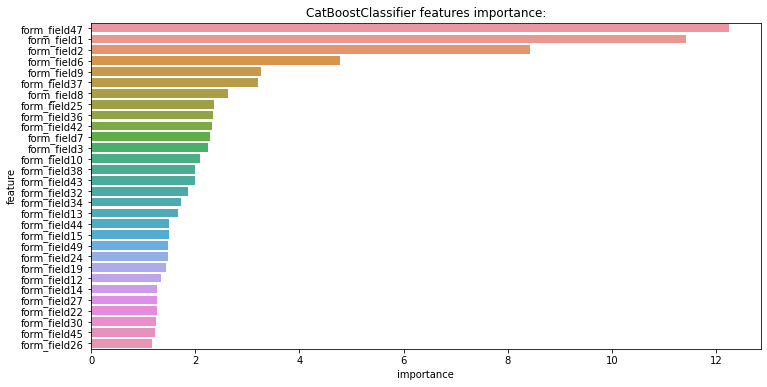

In [ ]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test_.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('CatBoostClassifier features importance:');

#### Filling Nan values with median

In [ ]:
np.mean(roc_score)

0.838164390501938

In [ ]:
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('kaggle_cat.csv', index=False)

## GridSearch 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
grid = {'n_estimators': [ 1000] }
#'depth': [4,6]}
       
        
        #'l2_leaf_reg': [3, 5]}
        #{'learning_rate': [ 0.02, 0.03],
cat = CatBoostClassifier(task_type='GPU', learning_rate=0.02,  verbose=0, early_stopping_rounds=100)

In [ ]:
rscv = RandomizedSearchCV(cat, grid )

### Randomized Search with Train_test_split

In [ ]:
model =rscv.fit(X_train, y_train)

In [ ]:
rscv.best_estimator_, model.best_params_


In [ ]:
y_pred = model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

In [ ]:
submission.head()

In [ ]:
submission.to_csv('prediction_results04.csv')         


In [ ]:
from google.colab import files
pred = model.predict_proba(test_)[:,1]
submission.Applicant_ID = test.Applicant_ID
submission['default_status']= pred
submission.to_csv('prediction_results05.csv', lindex=Fase)         
files.download('prediction_results05.csv')

In [ ]:
y_pred = rscv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

In [ ]:
rscv.best_estimator_, rscv.best_params_

In [ ]:
pred = rscv.predict_proba(test_)[:,1]
submission['default_status']= pred
submission.to_csv('sub17.csv', index=False)

## Using Parameters from Randomized SearchCV with KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
cat = CatBoostClassifier(task_type='GPU', learning_rate=0.02, n_estimators=1000)


In [ ]:
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = cat.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
np.mean(roc_score)

In [ ]:
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('sub18.csv', index=False)

In [ ]:
#from google.colab import files
res.to_csv('prediction_results.csv')         
#files.download('prediction_results.csv')

## Trying ensemble techniques

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
xgb = XGBClassifier()
lgb = LGBMClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()

gb = GradientBoostingClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

### USing XGBoost for prediction

In [ ]:
kf = KFold(n_splits=5)
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = xgb.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
np.mean(roc_score)

In [ ]:
from google.colab import files
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('xgb.csv', index=False)
files.download('xgb.csv')


### Prediction with LGBMClassifier

In [ ]:
kf = KFold(n_splits=5)
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = lgb.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
np.mean(roc_score)


In [ ]:
from google.colab import files
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('lgb.csv', index=False)
files.download('lgb.csv')

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

### Voting Classifier

In [ ]:
cat = CatBoostClassifier(task_type='GPU', verbose=0)

In [ ]:
# Defning the ensemble model using VotingClassifer
voting = VotingClassifier(estimators=[('xgb', xgb),('lgb', lgb),('cat',cat)],
voting= 'soft')

In [ ]:
kf = KFold(n_splits=5)
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = voting.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
np.mean(roc_score)

In [ ]:
from google.colab import files
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('voting.csv', index=False)
files.download('voting.csv')

### Prediction with StackingClassifier

In [ ]:
sc = StackingClassifier([('lgb',lgb), ('xgb',xgb), ('cat', cat)], final_estimator=lr)

In [ ]:
kf = KFold(n_splits=5)
#X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X,y):
    x_train, x_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = sc.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
np.mean(roc_score)

In [ ]:
from google.colab import files
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('stacking.csv', index=False)
files.download('stacking.csv')

In [ ]:
"""from google.colab import files
pred = model.predict_proba(test_)[:,1]
submission.Applicant_ID = test.Applicant_ID
submission['default_status']= pred
submission.to_csv('prediction_results05.csv', index=False)         
files.download('prediction_results05.csv')"""

### Kfold CV with 3 and 5 splits

3 splits showed improvement in roc score over 5 splits, but 5 splits performed better on LB

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
X_= pd.DataFrame(X)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X_,y):
    x_train, x_test = X_.iloc[train_index],X_.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = cat.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)

In [ ]:
#prediction = gscv.predict_proba(test_sc)[:,1]
np.mean(roc_score)


In [ ]:
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('sub16.csv', index=False)

### Binning

In [ ]:
num_cols = new_train.select_dtypes(exclude='object').columns

In [ ]:
#for num in num_cols:
 # new_train[num + '_bin'] = pd.cut(new_train[num],bins=4)# duplicates='drop' 
 # new_test[num + '_bin'] = pd.cut(new_test[num],bins=4 )#duplicates='drop' 

#new_train['form_field1_bin'] = pd.cut(new_train.form_field1, bins=4)
#sns.countplot(s)

In [ ]:
#sns.countplot(new_train.form_field18_bin)

### Feature Interaction

In [ ]:
new_train['form_field1*formfield2'] = new_train['form_field1'] * new_train['form_field2']
new_train['form_field1/formfield2'] = new_train['form_field1'] / new_train['form_field2']

new_train['form_field1*formfield3'] = new_train['form_field1'] * new_train.form_field3
new_train['form_field1*formfield4'] = new_train.form_field1 * new_train.form_field4
new_train['form_field1*formfield5'] = new_train.form_field1 * new_train.form_field5

#new_train['form_field30*formfield41'] = new_train['form_field30'] * new_train['form_field41']
##new_train['form_field31*formfield40'] = new_train['form_field31'] * new_train['form_field40']

new_train['form_field6+field7'] =  (new_train.form_field6 + new_train.form_field8)/2
new_train['form_field13/field14'] = (new_train.form_field13 / new_train.form_field14)*100
new_train['form_field32/field33'] = (new_train['form_field32']+ new_train['form_field33'])/2
new_train['form_field36/field38'] = new_train['form_field36'] / new_train['form_field38']
new_train['form_field36/field39'] = new_train['form_field36'] / new_train['form_field39']
new_train['form_field36/field18'] = new_train['form_field36'] / new_train['form_field18']
new_train['form_field36/field20'] = new_train['form_field36'] / new_train['form_field20']
new_train['form_field44*field50'] = new_train['form_field44'] * new_train['form_field50']




In [ ]:
new_test['form_field1*formfield2'] = new_test['form_field1'] * new_test['form_field2']
new_test['form_field1/formfield2'] = new_test['form_field1'] / new_test['form_field2']

new_test['form_field1*formfield3'] = new_test['form_field1'] * new_test.form_field3
new_test['form_field1*formfield4'] = new_test.form_field1 * new_test.form_field4
new_test['form_field1*formfield5'] = new_test.form_field1 * new_test.form_field5

#new_train['form_field30*formfield41'] = new_train['form_field30'] * new_train['form_field41']
##new_train['form_field31*formfield40'] = new_train['form_field31'] * new_train['form_field40']

new_test['form_field6+field7'] =  (new_test.form_field6 + new_test.form_field8)/2
new_test['form_field13/field14'] = (new_test.form_field13 / new_test.form_field14)*100
new_test['form_field32/field33'] = (new_test['form_field32']+ new_test['form_field33'])/2
new_test['form_field36/field38'] = new_test['form_field36'] / new_test['form_field38']
new_test['form_field36/field39'] = new_test['form_field36'] / new_test['form_field39']
new_test['form_field36/field18'] = new_test['form_field36'] / new_test['form_field18']
new_test['form_field36/field20'] = new_test['form_field36'] / new_test['form_field20']
new_test['form_field44*field50'] = new_test['form_field44'] * new_test['form_field50']




### Data Aggregation

In [ ]:
for col in num_cols:
    new_train[col + '_mean_on_field1'] = new_train[col].groupby(new_train['form_field1']).transform('mean')
    new_train[col + '_mean_on_field2'] = new_train[col].groupby(new_train['form_field2']).transform('mean')

    new_train[col + '_sum_on_field1'] = new_train[col].groupby(new_train['form_field1']).transform('sum')
    new_train[col + '_sum_on_field2'] = new_train[col].groupby(new_train['form_field2']).transform('sum')

    new_train[col + '_mean_on_field1'] = new_train[col].groupby(new_train['form_field1']).transform('max')
    new_train[col + '_mean_on_field2'] = new_train[col].groupby(new_train['form_field2']).transform('max')

    new_train[col + '_sum_on_field1'] = new_train[col].groupby(new_train['form_field1']).transform('min')
    new_train[col + '_sum_on_field2'] = new_train[col].groupby(new_train['form_field2']).transform('min')


    new_test[col + '_mean_on_field1'] = new_test[col].groupby(new_test['form_field1']).transform('mean')
    new_test[col + '_mean_on_field2'] = new_test[col].groupby(new_test['form_field2']).transform('mean')

    new_test[col + '_sum_on_field1'] = new_test[col].groupby(new_test['form_field1']).transform('sum')
    new_test[col + '_sum_on_field2'] = new_test[col].groupby(new_test['form_field2']).transform('sum')

    new_test[col + '_mean_on_field1'] = new_test[col].groupby(new_test['form_field1']).transform('max')
    new_test[col + '_mean_on_field2'] = new_test[col].groupby(new_test['form_field2']).transform('max')

    new_test[col + '_sum_on_field1'] = new_test[col].groupby(new_test['form_field1']).transform('min')
    new_test[col + '_sum_on_field2'] = new_test[col].groupby(new_test['form_field2']).transform('min')




    new_train[col + '_mean_on_field1_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field1']]).transform('mean')
    new_train[col + '_mean_on_field2_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field2']]).transform('mean')

    new_train[col + '_sum_on_field1_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field1']]).transform('sum')
    new_train[col + '_sum_on_field2_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field2']]).transform('sum')

    new_train[col + '_mean_on_field1_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field1']]).transform('max')
    new_train[col + '_mean_on_field2_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field2']]).transform('max')

    new_train[col + '_sum_on_field1_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field1']]).transform('min')
    new_train[col + '_sum_on_field2_'] = new_train[col].groupby([new_train['form_field47'],new_train['form_field2']]).transform('min')


    new_test[col + '_mean_on_field1_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field1']]).transform('mean')
    new_test[col + '_mean_on_field2_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field2']]).transform('mean')

    new_test[col + '_sum_on_field1_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field1']]).transform('sum')
    new_test[col + '_sum_on_field2_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field2']]).transform('sum')

    new_test[col + '_mean_on_field1_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field1']]).transform('max')
    new_test[col + '_mean_on_field2_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field2']]).transform('max')

    new_test[col + '_sum_on_field1_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field1']]).transform('min')
    new_test[col + '_sum_on_field2_'] = new_test[col].groupby([new_train['form_field47'],new_test['form_field2']]).transform('min')
    
    
    

In [ ]:
#new_train[col].groupby([new_train['form_field1'],new_train['form_field47']]).transform('mean')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
X = new_train.drop(['default_status','Applicant_ID'], axis=1)
y =new_train.default_status

In [ ]:
#y_ = pd.get_dummies(y)

In [ ]:
X.form_field47 = le.fit_transform(X.form_field47)
new_test.form_field47 = le.fit_transform(new_test.form_field47)


In [ ]:
X_ = (X)
test_ = (new_test.drop('Applicant_ID', axis=1))

In [ ]:
#cat_cols = X_.select_dtypes(include='category').columns
#cat_cols

In [ ]:
test_.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()

In [ ]:
#X_scaled = minmax.fit_transform(X_)
#test_sc = minmax.fit_transform(test_)

In [ ]:
pip install --quiet catboost

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier



In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
cat = CatBoostClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score

## Applied Kfold CV

In [ ]:
kf = KFold(n_splits=5)
cat = CatBoostClassifier(task_type='GPU')#, cat_features=cat_cols)#, learning_rate=0.02, n_estimators=2000, depth=7, early_stopping_rounds=50)


In [ ]:
X_scaled1 = pd.DataFrame(X_)

roc_score = []
test_pred = []

for train_index, test_index in kf.split(X_scaled1,y):
    x_train, x_test = X_scaled1.iloc[train_index],X_scaled1.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = cat.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_)[:,1]
    roc_score.append(score)
    test_pred.append(pred)
  #save result to list

In [ ]:
np.mean(roc_score)

In [ ]:
test

In [ ]:
submission['Applicant_ID'] = test['Applicant_ID']

In [ ]:
#prediction = gscv.predict_proba(test_sc)[:,1]
np.mean(roc_score)
submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('sub10.csv', index=False)

In [ ]:
cat.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test_.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('RandomForestClassifier features importance:');

In [ ]:
grid = {'learning_rate': [ 0.05],}
        #'n_estimators': [300, 500] }
       # 'depth': [4,6],}
        #'l2_leaf_reg': [3, 5]}

"""grid_search_result = cat.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)"""

In [ ]:
cat = CatBoostClassifier(task_type='GPU', depth=7, n_estimators=1500, early_stopping_rounds=50)


gscv = GridSearchCV(cat, param_grid=grid)

Tried GridSearch CV

In [ ]:
gscv.fit(X_train, y_train)

In [ ]:
gscv_pred = gscv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, gscv_pred)


In [ ]:
\\prediction = gscv.predict_proba(test_sc)[:,1]

submission['default_status']=prediction
submission.to_csv('submission4.csv', index=False)


In [ ]:
cat = CatBoostClassifier(task_type='GPU', learning_rate=0.03, depth=4, n_estimators=3000, early_stopping_rounds=50)

cat.fit(X_train, y_train, eval_set=(X_test, y_test))

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss

In [ ]:
pred = cat.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, pred)


In [ ]:
roc_auc_score(y_test, pred)


In [ ]:
roc_auc_score(y_test, pred)

In [ ]:
models = [cat, xgb, lgb, ada, rf, lr]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred)
    print(f'the auc score for {model} is {score}')

In [ ]:
prediction = cat.predict_proba(test_sc)[:,1]

In [ ]:
submission.head()

In [ ]:
prediction = cat.predict_proba(test_sc)[:,1]

submission['default_status']=prediction
submission.to_csv('submission3.csv', index=False)


In [ ]:
submission.to_csv('submission3.csv', index=False)

In [ ]:
len(cat.feature_importances_)
len(test_.columns)

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test_.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('RandomForestClassifier features importance:');

## Feature Engineering

In [ ]:
new_train.loc[new_train.form_field1>=3500,'form_field1']=1